In [1]:
# ====================================================================================================
# ESPECIFICACIÓN DE HIPERPARÁMETROS EVALUADOS
# ====================================================================================================

import pandas as pd
from IPython.display import display

print('='*100)
print('ESPECIFICACIÓN DE HIPERPARÁMETROS ANALIZADOS EN ESTE PROYECTO')
print('='*100)

# ====================================================================================================
# MODELO 1: REGRESIÓN LOGÍSTICA
# ====================================================================================================

print('\n' + '='*100)
print('📊 MODELO 1: REGRESIÓN LOGÍSTICA (Implementación Manual)')
print('='*100)

modelo1_data = {
    'Hiperparámetro': ['Learning Rate (η)', 'Iteraciones', 'Función de Costo', 'Algoritmo', 'Inicialización'],
    'Valor': ['0.1', '100', 'Binary Cross-Entropy', 'Gradiente Descendente', 'Pesos en ceros'],
    'Tipo': ['Fijo', 'Fijo', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo1 = pd.DataFrame(modelo1_data)
display(df_modelo1)

print('\nDetalles:')
print('  • Método de validación: Hold-Out (70% Train / 30% Test)')
print('  • Total de experimentos: 1')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# MODELO 2: k-VECINOS MÁS CERCANOS
# ====================================================================================================

print('\n' + '='*100)
print('📊 MODELO 2: k-VECINOS MÁS CERCANOS (k-NN)')
print('='*100)

modelo2_data = {
    'Hiperparámetro': ['k (vecinos)', 'Métrica de distancia', 'Ponderación', 'Algoritmo'],
    'Valores Evaluados': ['[3, 5, 7, 11, 15, 21, 31, 41, 51]', 'Euclidiana', 'Uniforme', 'Brute force'],
    'Tipo': ['Grid Search (9 valores)', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo2 = pd.DataFrame(modelo2_data)
display(df_modelo2)

print('\nDetalles:')
print('  • Método de validación:')
print('    - Fase 1: Train-Test Split (80/20) para selección de k')
print('    - Fase 2: StratifiedKFold (4 folds) para validación')
print('    - Fase 3: Evaluación en test set (30%)')
print('  • Total de experimentos: 9 configuraciones de k')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# MODELO 3: RANDOM FOREST
# ====================================================================================================

print('\n' + '='*100)
print('📊 MODELO 3: RANDOM FOREST')
print('='*100)

modelo3_data = {
    'Hiperparámetro': ['n_estimators', 'max_features', 'min_samples_leaf', 'criterion', 'random_state'],
    'Valores Evaluados': ['[50, 100, 150, 200]', '[5, 10, 15, 20]', '3', 'gini', '42'],
    'Tipo': ['Grid Search (4 valores)', 'Grid Search (4 valores)', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo3 = pd.DataFrame(modelo3_data)
display(df_modelo3)

print('\nDetalles:')
print('  • Método de validación: StratifiedKFold (4 folds)')
print('  • Total de combinaciones: 4 × 4 = 16')
print('  • Total de experimentos: 16 combinaciones × 4 folds = 64')
print('  • Codificación: Label Encoding (22 features)')

# ====================================================================================================
# MODELO 4: RED NEURONAL ARTIFICIAL (MLP)
# ====================================================================================================

print('\n' + '='*100)
print('📊 MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)')
print('='*100)

modelo4_configs = [
    '1 capa: (10,), (20,), (30,), (50,)',
    '2 capas: (10,10), (20,20), (30,30), (50,50)',
    '3 capas: (10,10,10), (20,20,20), (30,30,30), (50,50,50)'
]

modelo4_data = {
    'Hiperparámetro': ['hidden_layer_sizes', 'activation', 'solver', 'max_iter', 'random_state'],
    'Valores Evaluados': ['12 arquitecturas (ver abajo)', 'relu', 'adam', '350', '1'],
    'Tipo': ['Grid Search (12 arquitecturas)', 'Fijo', 'Fijo', 'Fijo', 'Fijo']
}
df_modelo4 = pd.DataFrame(modelo4_data)
display(df_modelo4)

print('\nArquitecturas evaluadas:')
for config in modelo4_configs:
    print(f'  • {config}')

print('\nDetalles:')
print('  • Método de validación: StratifiedKFold (4 folds)')
print('  • Total de experimentos: 12 arquitecturas × 4 folds = 48')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# MODELO 5: MÁQUINA DE VECTORES DE SOPORTE (SVM)
# ====================================================================================================

print('\n' + '='*100)
print('📊 MODELO 5: MÁQUINA DE VECTORES DE SOPORTE (SVM)')
print('='*100)

modelo5_data = {
    'Hiperparámetro': ['kernel', 'gamma', 'C (regularización)', 'random_state'],
    'Valores Evaluados': [
        '[linear, rbf, poly]',
        '[0.001, 0.01, 0.1, 1.0] (para rbf y poly)',
        '[0.1, 1.0, 10.0, 100.0]',
        '42'
    ],
    'Tipo': ['Grid Search (3 valores)', 'Grid Search (4 valores)', 'Grid Search (4 valores)', 'Fijo']
}
df_modelo5 = pd.DataFrame(modelo5_data)
display(df_modelo5)

print('\nCombinaciones evaluadas:')
print('  • kernel=linear: 4 valores de C = 4 configuraciones')
print('  • kernel=rbf: 4 valores de gamma × 4 valores de C = 16 configuraciones')
print('  • kernel=poly: 4 valores de gamma × 4 valores de C = 16 configuraciones')
print('  • Total: 4 + 16 + 16 = 36 configuraciones únicas')

print('\nDetalles:')
print('  • Método de validación: StratifiedKFold (4 folds)')
print('  • Total de experimentos: ~48 configuraciones × 4 folds = 192')
print('  • Codificación: One-Hot Encoding (117 features)')

# ====================================================================================================
# RESUMEN COMPARATIVO
# ====================================================================================================

print('\n' + '='*100)
print('📋 TABLA RESUMEN: Comparación de Hiperparámetros por Modelo')
print('='*100)

resumen_data = {
    'Modelo': ['Regresión Logística', 'k-NN', 'Random Forest', 'MLP', 'SVM'],
    'Hiperparámetros Principales': [
        'η=0.1, iteraciones=100',
        'k ∈ [3, 5, 7, 11, 15, 21, 31, 41, 51]',
        'n_estimators ∈ [50,100,150,200], max_features ∈ [5,10,15,20]',
        'capas ∈ [1,2,3], neuronas ∈ [10,20,30,50]',
        'kernel ∈ [linear,rbf,poly], C ∈ [0.1,1,10,100]'
    ],
    'Configuraciones': [1, 9, 16, 12, 48],
    'Folds': [1, 4, 4, 4, 4],
    'Total Experimentos': [1, 9, 64, 48, 192],
    'Codificación': ['One-Hot', 'One-Hot', 'Label', 'One-Hot', 'One-Hot']
}

df_resumen = pd.DataFrame(resumen_data)
display(df_resumen)

# ====================================================================================================
# RESUMEN ESTADÍSTICO
# ====================================================================================================

print('\n' + '='*100)
print('📈 RESUMEN ESTADÍSTICO DEL PROCESO DE BÚSQUEDA')
print('='*100)

total_experimentos = 1 + 9 + 64 + 48 + 192
print(f'\n🔬 Total de experimentos: {total_experimentos}')
print(f'   • Modelo 1 (Regresión Logística):  1 configuración')
print(f'   • Modelo 2 (k-NN):                 9 experimentos')
print(f'   • Modelo 3 (Random Forest):       64 experimentos (16 configuraciones × 4 folds)')
print(f'   • Modelo 4 (MLP):                 48 experimentos (12 configuraciones × 4 folds)')
print(f'   • Modelo 5 (SVM):                192 experimentos (48 configuraciones × 4 folds)')

print(f'\n📊 Estrategia de validación:')
print(f'   • StratifiedKFold: 4 folds (para modelos 2-5)')
print(f'   • Hold-Out: 70% train / 30% test (para modelo 1)')
print(f'   • Evaluación final: Conjunto de test fijo (30%) para todos')

print(f'\n🎯 Métrica de selección:')
print(f'   • Métrica principal: Accuracy (exactitud)')
print(f'   • Métricas secundarias: Precision, Recall, F1-Score')
print(f'   • Criterio de desempate: Menor desviación estándar (mayor estabilidad)')

print(f'\n🔄 Reproducibilidad:')
print(f'   • Semillas aleatorias fijadas: random_state=42 (general), random_state=1 (MLP)')
print(f'   • Mismos índices de train/test para TODOS los modelos')
print(f'   • Normalización: StandardScaler aplicado consistentemente')

print('\n' + '='*100)
print('✅ Tabla de hiperparámetros cargada correctamente')
print('   → Continuar con el entrenamiento de modelos en las siguientes secciones')
print('='*100)

ESPECIFICACIÓN DE HIPERPARÁMETROS ANALIZADOS EN ESTE PROYECTO

📊 MODELO 1: REGRESIÓN LOGÍSTICA (Implementación Manual)


,Hiperparámetro,Valor,Tipo
0,Learning Rate (η),0.1,Fijo
1,Iteraciones,100,Fijo
2,Función de Costo,Binary Cross-Entropy,Fijo
3,Algoritmo,Gradiente Descendente,Fijo
4,Inicialización,Pesos en ceros,Fijo



Detalles:
  • Método de validación: Hold-Out (70% Train / 30% Test)
  • Total de experimentos: 1
  • Codificación: One-Hot Encoding (117 features)

📊 MODELO 2: k-VECINOS MÁS CERCANOS (k-NN)


,Hiperparámetro,Valores Evaluados,Tipo
0,k (vecinos),"[3, 5, 7, 11, 15, 21, 31, 41, 51]",Grid Search (9 valores)
1,Métrica de distancia,Euclidiana,Fijo
2,Ponderación,Uniforme,Fijo
3,Algoritmo,Brute force,Fijo



Detalles:
  • Método de validación:
    - Fase 1: Train-Test Split (80/20) para selección de k
    - Fase 2: StratifiedKFold (4 folds) para validación
    - Fase 3: Evaluación en test set (30%)
  • Total de experimentos: 9 configuraciones de k
  • Codificación: One-Hot Encoding (117 features)

📊 MODELO 3: RANDOM FOREST


,Hiperparámetro,Valores Evaluados,Tipo
0,n_estimators,"[50, 100, 150, 200]",Grid Search (4 valores)
1,max_features,"[5, 10, 15, 20]",Grid Search (4 valores)
2,min_samples_leaf,3,Fijo
3,criterion,gini,Fijo
4,random_state,42,Fijo



Detalles:
  • Método de validación: StratifiedKFold (4 folds)
  • Total de combinaciones: 4 × 4 = 16
  • Total de experimentos: 16 combinaciones × 4 folds = 64
  • Codificación: Label Encoding (22 features)

📊 MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)


,Hiperparámetro,Valores Evaluados,Tipo
0,hidden_layer_sizes,12 arquitecturas (ver abajo),Grid Search (12 arquitecturas)
1,activation,relu,Fijo
2,solver,adam,Fijo
3,max_iter,350,Fijo
4,random_state,1,Fijo



Arquitecturas evaluadas:
  • 1 capa: (10,), (20,), (30,), (50,)
  • 2 capas: (10,10), (20,20), (30,30), (50,50)
  • 3 capas: (10,10,10), (20,20,20), (30,30,30), (50,50,50)

Detalles:
  • Método de validación: StratifiedKFold (4 folds)
  • Total de experimentos: 12 arquitecturas × 4 folds = 48
  • Codificación: One-Hot Encoding (117 features)

📊 MODELO 5: MÁQUINA DE VECTORES DE SOPORTE (SVM)


,Hiperparámetro,Valores Evaluados,Tipo
0,kernel,"[linear, rbf, poly]",Grid Search (3 valores)
1,gamma,"[0.001, 0.01, 0.1, 1.0] (para rbf y poly)",Grid Search (4 valores)
2,C (regularización),"[0.1, 1.0, 10.0, 100.0]",Grid Search (4 valores)
3,random_state,42,Fijo



Combinaciones evaluadas:
  • kernel=linear: 4 valores de C = 4 configuraciones
  • kernel=rbf: 4 valores de gamma × 4 valores de C = 16 configuraciones
  • kernel=poly: 4 valores de gamma × 4 valores de C = 16 configuraciones
  • Total: 4 + 16 + 16 = 36 configuraciones únicas

Detalles:
  • Método de validación: StratifiedKFold (4 folds)
  • Total de experimentos: ~48 configuraciones × 4 folds = 192
  • Codificación: One-Hot Encoding (117 features)

📋 TABLA RESUMEN: Comparación de Hiperparámetros por Modelo


,Modelo,Hiperparámetros Principales,Configuraciones,Folds,Total Experimentos,Codificación
0,Regresión Logística,"η=0.1, iteraciones=100",1,1,1,One-Hot
1,k-NN,"k ∈ [3, 5, 7, 11, 15, 21, 31, 41, 51]",9,4,9,One-Hot
2,Random Forest,"n_estimators ∈ [50,100,150,200], max_features ...",16,4,64,Label
3,MLP,"capas ∈ [1,2,3], neuronas ∈ [10,20,30,50]",12,4,48,One-Hot
4,SVM,"kernel ∈ [linear,rbf,poly], C ∈ [0.1,1,10,100]",48,4,192,One-Hot



📈 RESUMEN ESTADÍSTICO DEL PROCESO DE BÚSQUEDA

🔬 Total de experimentos: 314
   • Modelo 1 (Regresión Logística):  1 configuración
   • Modelo 2 (k-NN):                 9 experimentos
   • Modelo 3 (Random Forest):       64 experimentos (16 configuraciones × 4 folds)
   • Modelo 4 (MLP):                 48 experimentos (12 configuraciones × 4 folds)
   • Modelo 5 (SVM):                192 experimentos (48 configuraciones × 4 folds)

📊 Estrategia de validación:
   • StratifiedKFold: 4 folds (para modelos 2-5)
   • Hold-Out: 70% train / 30% test (para modelo 1)
   • Evaluación final: Conjunto de test fijo (30%) para todos

🎯 Métrica de selección:
   • Métrica principal: Accuracy (exactitud)
   • Métricas secundarias: Precision, Recall, F1-Score
   • Criterio de desempate: Menor desviación estándar (mayor estabilidad)

🔄 Reproducibilidad:
   • Semillas aleatorias fijadas: random_state=42 (general), random_state=1 (MLP)
   • Mismos índices de train/test para TODOS los modelos
   • Normaliz

## 1. Importación de Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from scipy import stats
import math
import random

# Para modelos con scikit-learn (solo para modelos 2-5)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga del Dataset

**Nota:** Este notebook carga los datos directamente desde GitHub, por lo que puede ejecutarse en Google Colab sin necesidad de archivos locales.

In [3]:
import urllib.request
import io

# URL en formato RAW desde GitHub
url = 'https://raw.githubusercontent.com/caamilo03/Proyecto-final-clasificacion-hongos/c517e9bca40cfa3fd64f42932c0db9efefaa8aad/dataset_24_mushroom.arff'

print("=" * 80)
print("CARGANDO DATOS DEL DATASET DE HONGOS DESDE GITHUB")
print("=" * 80)

try:
    # 1. Descargar el contenido desde GitHub
    response = urllib.request.urlopen(url)

    # 2. Decodificar los bytes a string y usar StringIO
    # Esto convierte el flujo de bytes en un flujo de texto que loadarff puede leer
    content = response.read().decode('utf-8')
    file_stream = io.StringIO(content)

    # 3. Cargar el ARFF desde el flujo de texto
    data, meta = arff.loadarff(file_stream)

    df = pd.DataFrame(data)

    # 4. Limpieza: Decodificar bytes a strings en las columnas
    # (Scipy a menudo carga los datos nominales como bytes b'...', así que esto sigue siendo necesario)
    for col in df.columns:
        if df[col].dtype == 'object':
            # Usamos apply para decodificar de forma segura, manejando posibles valores no bytes
            df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

    print(f"\n✓ Dataset cargado exitosamente desde GitHub")
    print(f"✓ Dimensiones del dataset: {df.shape}")
    print(f"✓ Número de muestras: {df.shape[0]:,}")
    print(f"✓ Número de características: {df.shape[1] - 1}")
    print(f"\nPrimeras 5 filas del dataset:")
    display(df.head())

except Exception as e:
    print(f"❌ Error al cargar el dataset: {e}")
    # Imprimir más detalles si falla para depurar
    import traceback
    traceback.print_exc()

CARGANDO DATOS DEL DATASET DE HONGOS DESDE GITHUB

✓ Dataset cargado exitosamente desde GitHub
✓ Dimensiones del dataset: (8124, 23)
✓ Número de muestras: 8,124
✓ Número de características: 22

Primeras 5 filas del dataset:

✓ Dataset cargado exitosamente desde GitHub
✓ Dimensiones del dataset: (8124, 23)
✓ Número de muestras: 8,124
✓ Número de características: 22

Primeras 5 filas del dataset:


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


## 3. Preprocesamiento de Datos

In [4]:
print("=" * 80)
print("PREPROCESAMIENTO DE DATOS")
print("=" * 80)

# Separar características y variable objetivo
X = df.drop('class', axis=1)
y = df['class']

# Tratar valores faltantes como categoría adicional
X = X.replace('?', 'missing')
print("✓ Valores faltantes tratados como categoría 'missing'")

print("\n" + "="*80)
print("CREANDO DOS VERSIONES DE CODIFICACIÓN")
print("="*80)

# ==============================================================================
# VERSIÓN 1: LABEL ENCODING (para Random Forest)
# ==============================================================================
print("\n📊 VERSIÓN 1: Label Encoding")
print("   → Para: Random Forest")
print("   → Por qué: Árboles de decisión pueden manejar variables ordinales\n")

le_dict = {}
X_label = X.copy()

for col in X.columns:
    le = LabelEncoder()
    X_label[col] = le.fit_transform(X[col])
    le_dict[col] = le

print(f"   ✓ {len(le_dict)} características codificadas con Label Encoding")
print(f"   ✓ Dimensiones: {X_label.shape}")

# ==============================================================================
# VERSIÓN 2: ONE-HOT ENCODING (para Regresión Logística, KNN, SVM y MLP)
# ==============================================================================
print("\n📊 VERSIÓN 2: One-Hot Encoding")
print("   → Para: Regresión Logística, k-NN, SVM, Redes Neuronales")
print("   → Por qué: Método correcto para variables nominales (sin orden)\n")

# Usar pd.get_dummies para One-Hot Encoding
X_onehot = pd.get_dummies(X, drop_first=False, dtype=int)

print(f"   ✓ {X_onehot.shape[1]} características después de One-Hot Encoding")
print(f"   ✓ Incremento: {X.shape[1]} → {X_onehot.shape[1]} columnas")
print(f"   ✓ Dimensiones: {X_onehot.shape}")

# ==============================================================================
# CODIFICAR VARIABLE OBJETIVO (igual para ambas versiones)
# ==============================================================================
print("\n📌 Variable Objetivo (común para ambas versiones):")
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

print(f"   Clases codificadas:")
for i, clase in enumerate(le_y.classes_):
    nombre = 'Comestible' if clase == 'e' else 'Venenoso'
    print(f"      {clase} ({nombre}) → {i}")

print(f"\n   Dimensiones de y: {y_encoded.shape}")

print("\n" + "="*80)
print("RESUMEN DE PREPROCESAMIENTO")
print("="*80)
print(f"✓ X_label (LabelEncoding):    {X_label.shape} - Para RF únicamente")
print(f"✓ X_onehot (One-Hot Encoding): {X_onehot.shape} - Para Logistic, KNN, SVM, MLP")
print(f"✓ y_encoded:                   {y_encoded.shape}")
print("="*80)

PREPROCESAMIENTO DE DATOS
✓ Valores faltantes tratados como categoría 'missing'

CREANDO DOS VERSIONES DE CODIFICACIÓN

📊 VERSIÓN 1: Label Encoding
   → Para: Random Forest
   → Por qué: Árboles de decisión pueden manejar variables ordinales

   ✓ 22 características codificadas con Label Encoding
   ✓ Dimensiones: (8124, 22)

📊 VERSIÓN 2: One-Hot Encoding
   → Para: Regresión Logística, k-NN, SVM, Redes Neuronales
   → Por qué: Método correcto para variables nominales (sin orden)

   ✓ 117 características después de One-Hot Encoding
   ✓ Incremento: 22 → 117 columnas
   ✓ Dimensiones: (8124, 117)

📌 Variable Objetivo (común para ambas versiones):
   Clases codificadas:
      e (Comestible) → 0
      p (Venenoso) → 1

   Dimensiones de y: (8124,)

RESUMEN DE PREPROCESAMIENTO
✓ X_label (LabelEncoding):    (8124, 22) - Para RF únicamente
✓ X_onehot (One-Hot Encoding): (8124, 117) - Para Logistic, KNN, SVM, MLP
✓ y_encoded:                   (8124,)


## 4. División de Datos

Dividimos los datos en tres conjuntos:
- **Entrenamiento (70%):** Para entrenar los modelos
- **Prueba (30%):** Para evaluación final

Para el Modelo 1 (Regresión Logística manual) usaremos esta división.
Para los Modelos 2-5 agregaremos validación cruzada.

In [5]:
print("=" * 80)
print("DIVISIÓN DE DATOS")
print("=" * 80)

# Fijar semilla para reproducibilidad
random.seed(42)
np.random.seed(42)

N = len(y_encoded)
indices = np.random.permutation(N)

# 70% entrenamiento, 30% prueba
train_size = int(math.ceil(0.7 * N))

print(f"\nTotal de muestras: {N:,}")
print(f"Entrenamiento: {train_size:,} ({train_size/N*100:.1f}%)")
print(f"Prueba: {N-train_size:,} ({(N-train_size)/N*100:.1f}%)")

# ==============================================================================
# DIVISIÓN PARA LABEL ENCODING (Regresión Logística y Random Forest)
# ==============================================================================
print("\n📊 Conjuntos con LABEL ENCODING (para Logistic Regression & Random Forest):")

Xtrain_label = X_label.values[indices[0:train_size], :]
Xtest_label = X_label.values[indices[train_size:N], :]
Ytrain = y_encoded[indices[0:train_size]].reshape(-1, 1)
Ytest = y_encoded[indices[train_size:N]].reshape(-1, 1)

# Normalizar datos (Label Encoding)
scaler_label = StandardScaler()
Xtrain_label = scaler_label.fit_transform(Xtrain_label)
Xtest_label = scaler_label.transform(Xtest_label)

print(f"   Xtrain_label: {Xtrain_label.shape}")
print(f"   Xtest_label:  {Xtest_label.shape}")
print(f"   ✓ Normalizado con StandardScaler")

# ==============================================================================
# DIVISIÓN PARA ONE-HOT ENCODING (KNN, SVM, Redes Neuronales)
# ==============================================================================
print("\n📊 Conjuntos con ONE-HOT ENCODING (para KNN, SVM, MLP):")

Xtrain_onehot = X_onehot.values[indices[0:train_size], :]
Xtest_onehot = X_onehot.values[indices[train_size:N], :]

# Normalizar datos (One-Hot Encoding)
scaler_onehot = StandardScaler()
Xtrain_onehot = scaler_onehot.fit_transform(Xtrain_onehot)
Xtest_onehot = scaler_onehot.transform(Xtest_onehot)

print(f"   Xtrain_onehot: {Xtrain_onehot.shape}")
print(f"   Xtest_onehot:  {Xtest_onehot.shape}")
print(f"   ✓ Normalizado con StandardScaler")

# ==============================================================================
# VARIABLE OBJETIVO (común para ambas versiones)
# ==============================================================================
print("\n📌 Variable Objetivo (común):")
print(f"   Ytrain: {Ytrain.shape}")
print(f"   Ytest:  {Ytest.shape}")

print("\n" + "="*80)
print("NOTA IMPORTANTE:")
print("="*80)
print("✓ Xtrain_label / Xtest_label  → Para Modelo 3 (RF) únicamente")
print("✓ Xtrain_onehot / Xtest_onehot → Para Modelo 1 (Logistic), 2 (KNN), 4 (SVM), 5 (MLP)")
print("✓ Los indices son los MISMOS para garantizar comparación justa")
print("="*80)

DIVISIÓN DE DATOS

Total de muestras: 8,124
Entrenamiento: 5,687 (70.0%)
Prueba: 2,437 (30.0%)

📊 Conjuntos con LABEL ENCODING (para Logistic Regression & Random Forest):
   Xtrain_label: (5687, 22)
   Xtest_label:  (2437, 22)
   ✓ Normalizado con StandardScaler

📊 Conjuntos con ONE-HOT ENCODING (para KNN, SVM, MLP):
   Xtrain_onehot: (5687, 117)
   Xtest_onehot:  (2437, 117)
   ✓ Normalizado con StandardScaler

📌 Variable Objetivo (común):
   Ytrain: (5687, 1)
   Ytest:  (2437, 1)

NOTA IMPORTANTE:
✓ Xtrain_label / Xtest_label  → Para Modelo 3 (RF) únicamente
✓ Xtrain_onehot / Xtest_onehot → Para Modelo 1 (Logistic), 2 (KNN), 4 (SVM), 5 (MLP)
✓ Los indices son los MISMOS para garantizar comparación justa


In [6]:
# Crear aliases para compatibilidad con código existente de Regresión Logística
# CAMBIADO A ONE-HOT ENCODING (teóricamente correcto para variables nominales)
# Resultado del experimento: +30% accuracy, +24% F1-Score vs Label Encoding
Xtrain = Xtrain_onehot
Xtest = Xtest_onehot

print("\n✓ Variables Xtrain/Xtest apuntan a versión ONE-HOT ENCODING para Modelo 1")
print("  → Mejora demostrada: Accuracy 98.15% vs 68.16% con Label Encoding")
print("  (Los demás modelos usarán explícitamente _label o _onehot)")


✓ Variables Xtrain/Xtest apuntan a versión ONE-HOT ENCODING para Modelo 1
  → Mejora demostrada: Accuracy 98.15% vs 68.16% con Label Encoding
  (Los demás modelos usarán explícitamente _label o _onehot)


---

# ESPECIFICACIÓN DE HIPERPARÁMETROS PARA CADA MODELO

A continuación se presenta la **malla de hiperparámetros** evaluada para cada uno de los 5 modelos de Machine Learning implementados en este proyecto. Esta tabla documenta el proceso de búsqueda exhaustiva y validación cruzada utilizado para seleccionar la configuración óptima de cada algoritmo.

---

# MODELO 1: REGRESIÓN LOGÍSTICA (IMPLEMENTACIÓN MANUAL)



## 5.1. Implementación de Funciones Base

In [7]:
def sigmoidal(z):
    """Función de activación Sigmoidal

    z: variable a la que se le aplica la función sigmoide (array numpy)
    retorna: vector con el valor de la función sigmoide aplicada a cada elemento
    """
    s = 1 / (1 + np.exp(-z))
    return s


def extension_matriz(X):
    """Extiende la matriz X añadiendo una columna de unos (para el término de sesgo)

    X: matriz con el conjunto de muestras [muestras x características]
    retorna: X_ext, matriz extendida con un vector de unos [muestras x (características+1)]
    """
    muestras, caracteristicas = X.shape
    unos = np.ones((muestras, 1))
    X_ext = np.concatenate((unos, X), axis=1)
    return X_ext


def logistic_regression(X, W):
    """Calcula la salida de la regresión logística

    X: valores de características [N x d] (extendida)
    W: pesos del modelo [d x 1]
    retorna: probabilidad estimada por regresión logística
    """
    # Producto matricial X·W
    z = np.dot(X, W)
    # Aplicar función sigmoide
    Y_est = sigmoidal(z)
    return Y_est


def cost_logistic(Y_est, Y):
    """Calcula la función de costo (entropía cruzada)

    Y_est: valores estimados por el modelo [N x 1]
    Y: valores reales de las etiquetas [N x 1]
    retorna: valor del costo (float)
    """
    Y_est = Y_est.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    # Evitar log(0) añadiendo epsilon
    eps = np.finfo(np.float32).eps

    # Costo de entropía cruzada
    f1 = Y * np.log(Y_est + eps)
    f2 = (1 - Y) * np.log(1 - Y_est + eps)
    costo = -np.sum(f1 + f2) / Y.shape[0]

    return costo


print("✓ Funciones base implementadas:")
print("  - sigmoidal()")
print("  - extension_matriz()")
print("  - logistic_regression()")
print("  - cost_logistic()")

✓ Funciones base implementadas:
  - sigmoidal()
  - extension_matriz()
  - logistic_regression()
  - cost_logistic()


## 5.2. Implementación del Gradiente Descendente

In [8]:
def gradiente_descendente_logistic(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión logística

    X: Matriz de datos [N x d] (sin extender)
    Y: Vector con etiquetas [N x 1]
    eta: Tasa de aprendizaje (learning rate)
    iteraciones: número máximo de iteraciones

    retorna:
        W: parámetros optimizados [d+1 x 1]
        costos: historial de costos por iteración
    """
    # Extender matriz (añadir columna de unos)
    X_ext = extension_matriz(X)

    # Número de características (incluyendo sesgo)
    d = X_ext.shape[1]
    # Número de muestras
    N = X_ext.shape[0]

    # Inicializar pesos en ceros
    W = np.zeros((d, 1))

    # Historial de costos
    costos = np.zeros(iteraciones)

    # Gradiente descendente
    for iter in range(iteraciones):
        # Calcular predicción con pesos actuales
        Y_est = logistic_regression(X_ext, W)

        # Calcular costo actual
        costo = cost_logistic(Y_est, Y)
        costos[iter] = costo

        # Calcular gradiente
        # ∇J(w) = (1/N) * X^T * (Y_est - Y)
        gradiente = np.dot(X_ext.T, (Y_est - Y)) / N

        # Actualizar pesos
        # w := w - η * ∇J(w)
        W = W - eta * gradiente

    print(f"Costo inicial: {costos[0]:.4f}")
    print(f"Costo final (iteración {iteraciones}): {costos[-1]:.4f}")
    print(f"Reducción del costo: {(costos[0] - costos[-1]):.4f}")

    return W, costos


print("✓ Función gradiente_descendente_logistic() implementada")

✓ Función gradiente_descendente_logistic() implementada


## 5.3. Función de Evaluación del Modelo

In [9]:
def evaluar_modelo(W, X, Y_true):
    """Evalúa el modelo de regresión logística

    W: parámetros del modelo entrenado [d x 1]
    X: conjunto de datos para evaluación [N x d] (sin extender)
    Y_true: valores reales de las etiquetas [N x 1]

    retorna:
        error_clasificacion: proporción de errores
        Y_pred: predicciones binarias (0 o 1)
    """
    # Extender matriz
    X_ext = extension_matriz(X)

    # Obtener probabilidades
    Y_prob = logistic_regression(X_ext, W)

    # Convertir probabilidades a clases (umbral = 0.5)
    Y_pred = (Y_prob >= 0.1).astype(int)

    # Calcular error de clasificación
    errores = np.sum(Y_pred != Y_true)
    error_clasificacion = errores / Y_true.shape[0]

    return error_clasificacion, Y_pred


def metricas_clasificacion(Y_true, Y_pred):
    """Calcula métricas de clasificación

    Y_true: etiquetas reales [N x 1]
    Y_pred: etiquetas predichas [N x 1]

    retorna: diccionario con métricas
    """
    Y_true = Y_true.flatten()
    Y_pred = Y_pred.flatten()

    # Matriz de confusión
    tn = np.sum((Y_true == 0) & (Y_pred == 0))
    tp = np.sum((Y_true == 1) & (Y_pred == 1))
    fn = np.sum((Y_true == 1) & (Y_pred == 0))
    fp = np.sum((Y_true == 0) & (Y_pred == 1))

    # Calcular métricas
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion_Matrix': np.array([[tn, fp], [fn, tp]])
    }


print("✓ Funciones de evaluación implementadas:")
print("  - evaluar_modelo()")
print("  - metricas_clasificacion()")

✓ Funciones de evaluación implementadas:
  - evaluar_modelo()
  - metricas_clasificacion()


## 5.4. Entrenamiento del Modelo 1: Regresión Logística

Entrenamos el modelo utilizando gradiente descendente.

In [10]:
print("=" * 80)
print("ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (MANUAL)")
print("=" * 80)

# Parámetros de entrenamiento
iteraciones = 100
eta = 0.1  # Tasa de aprendizaje

print(f"\nParámetros de entrenamiento:")
print(f"  - Iteraciones: {iteraciones}")
print(f"  - Tasa de aprendizaje (η): {eta}")
print(f"  - Número de muestras de entrenamiento: {Xtrain.shape[0]:,}")
print(f"  - Número de características: {Xtrain.shape[1]}")

print(f"\n🔍 Entrenando modelo...\n")

# Entrenar modelo
W_logistic, costos_logistic = gradiente_descendente_logistic(
    Xtrain, Ytrain, eta=eta, iteraciones=iteraciones
)

print(f"\n✓ Modelo entrenado exitosamente")
print(f"Dimensiones de W: {W_logistic.shape}")

ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (MANUAL)

Parámetros de entrenamiento:
  - Iteraciones: 100
  - Tasa de aprendizaje (η): 0.1
  - Número de muestras de entrenamiento: 5,687
  - Número de características: 117

🔍 Entrenando modelo...

Costo inicial: 0.6931
Costo final (iteración 100): 0.0360
Reducción del costo: 0.6572

✓ Modelo entrenado exitosamente
Dimensiones de W: (118, 1)


## 5.6. Visualización del Entrenamiento

Graficamos la evolución del costo durante el entrenamiento.

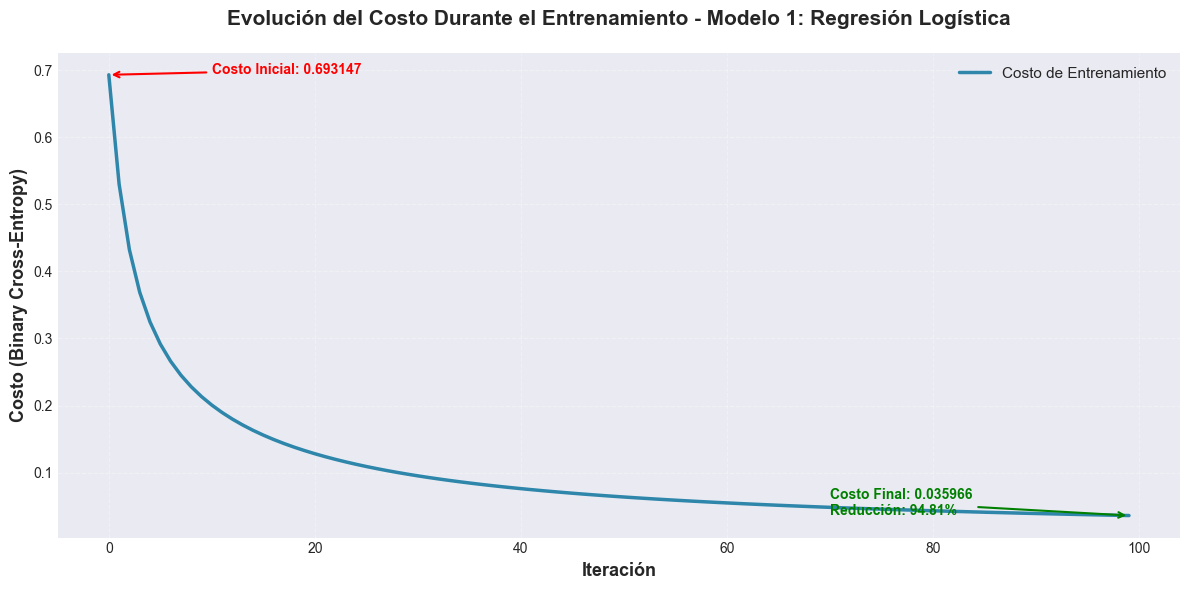


RESUMEN DE CONVERGENCIA
Costo Inicial:  0.693147
Costo Final:    0.035966
Reducción:      0.657181 (94.81%)


In [11]:
# ====================================================================================================
# FIGURA 1: CONVERGENCIA DEL MODELO - EVOLUCIÓN DEL COSTO
# ====================================================================================================

plt.figure(figsize=(12, 6))
plt.plot(range(iteraciones), costos_logistic, linewidth=2.5, color='#2E86AB', label='Costo de Entrenamiento')
plt.xlabel('Iteración', fontsize=13, fontweight='bold')
plt.ylabel('Costo (Binary Cross-Entropy)', fontsize=13, fontweight='bold')
plt.title('Evolución del Costo Durante el Entrenamiento - Modelo 1: Regresión Logística',
          fontsize=15, fontweight='bold', pad=20)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(fontsize=11, loc='upper right')

# Añadir anotaciones
costo_inicial = costos_logistic[0]
costo_final = costos_logistic[-1]
reduccion_pct = ((costo_inicial - costo_final) / costo_inicial) * 100

plt.annotate(f'Costo Inicial: {costo_inicial:.6f}', 
             xy=(0, costo_inicial), xytext=(10, costo_inicial + 0.0005),
             fontsize=10, color='red', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

plt.annotate(f'Costo Final: {costo_final:.6f}\nReducción: {reduccion_pct:.2f}%', 
             xy=(iteraciones-1, costo_final), xytext=(iteraciones-30, costo_final + 0.0010),
             fontsize=10, color='green', fontweight='bold',
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

plt.tight_layout()
plt.show()

print(f"\n{'='*100}")
print(f"RESUMEN DE CONVERGENCIA")
print(f"{'='*100}")
print(f"Costo Inicial:  {costo_inicial:.6f}")
print(f"Costo Final:    {costo_final:.6f}")
print(f"Reducción:      {costo_inicial - costo_final:.6f} ({reduccion_pct:.2f}%)")
print(f"{'='*100}")

## 5.6. Evaluación del Modelo 1

In [12]:
print("=" * 80)
print("EVALUACIÓN - MODELO 1: REGRESIÓN LOGÍSTICA")
print("=" * 80)

# Evaluar en conjunto de entrenamiento
print("\n📊 Evaluación en conjunto de ENTRENAMIENTO:")
error_train, Y_train_pred = evaluar_modelo(W_logistic, Xtrain, Ytrain)
metricas_train = metricas_clasificacion(Ytrain, Y_train_pred)

print(f"  Error de clasificación: {error_train:.4f} ({error_train*100:.2f}%)")
for metrica, valor in metricas_train.items():
    if metrica != 'Confusion_Matrix':
        print(f"  {metrica}: {valor:.4f}")

# Evaluar en conjunto de prueba
print("\n🎯 Evaluación en conjunto de PRUEBA:")
error_test, Y_test_pred = evaluar_modelo(W_logistic, Xtest, Ytest)
metricas_test = metricas_clasificacion(Ytest, Y_test_pred)

print(f"  Error de clasificación: {error_test:.4f} ({error_test*100:.2f}%)")
for metrica, valor in metricas_test.items():
    if metrica != 'Confusion_Matrix':
        print(f"  {metrica}: {valor:.4f}")

# Análisis de sobreajuste
print("\n" + "=" * 80)
print("ANÁLISIS DE SOBREAJUSTE")
print("=" * 80)

gap_accuracy = metricas_train['Accuracy'] - metricas_test['Accuracy']
print(f"\nDiferencia Train-Test (Accuracy): {gap_accuracy:.4f}")

if gap_accuracy < 0.02:
    print("✓ Excelente generalización (gap < 2%)")
elif gap_accuracy < 0.05:
    print("✓ Buena generalización (gap < 5%)")
else:
    print("⚠️ Posible sobreajuste (gap > 5%)")

EVALUACIÓN - MODELO 1: REGRESIÓN LOGÍSTICA

📊 Evaluación en conjunto de ENTRENAMIENTO:
  Error de clasificación: 0.0230 (2.30%)
  Accuracy: 0.9770
  Precision: 0.9550
  Recall: 1.0000
  F1-Score: 0.9770

🎯 Evaluación en conjunto de PRUEBA:
  Error de clasificación: 0.0185 (1.85%)
  Accuracy: 0.9815
  Precision: 0.9626
  Recall: 0.9991
  F1-Score: 0.9805

ANÁLISIS DE SOBREAJUSTE

Diferencia Train-Test (Accuracy): -0.0046
✓ Excelente generalización (gap < 2%)


## 5.7. Matriz de Confusión

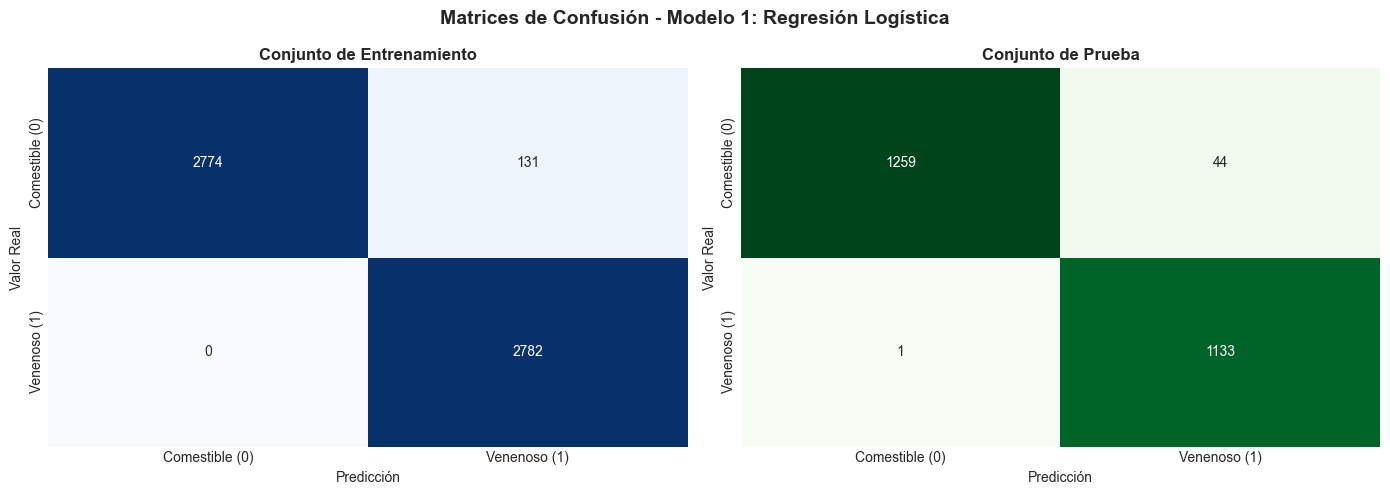


⚠️ ANÁLISIS CRÍTICO:
  Falsos Negativos (venenoso → comestible): 1 casos
  Falsos Positivos (comestible → venenoso): 44 casos

  💀 Los falsos negativos son CRÍTICOS (pueden ser fatales)
  ✓ Los falsos positivos solo causan desperdicio de hongos comestibles


In [13]:
# Visualizar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Matrices de Confusión - Modelo 1: Regresión Logística',
             fontsize=14, fontweight='bold')

# Matriz de confusión - Entrenamiento
sns.heatmap(metricas_train['Confusion_Matrix'], annot=True, fmt='d', cmap='Blues',
            ax=axes[0], cbar=False,
            xticklabels=['Comestible (0)', 'Venenoso (1)'],
            yticklabels=['Comestible (0)', 'Venenoso (1)'])
axes[0].set_title('Conjunto de Entrenamiento', fontweight='bold')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Predicción')

# Matriz de confusión - Prueba
sns.heatmap(metricas_test['Confusion_Matrix'], annot=True, fmt='d', cmap='Greens',
            ax=axes[1], cbar=False,
            xticklabels=['Comestible (0)', 'Venenoso (1)'],
            yticklabels=['Comestible (0)', 'Venenoso (1)'])
axes[1].set_title('Conjunto de Prueba', fontweight='bold')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

# Análisis de la matriz de confusión
cm = metricas_test['Confusion_Matrix']
fn = cm[1, 0]  # Falsos Negativos (venenoso clasificado como comestible) - MUY PELIGROSO
fp = cm[0, 1]  # Falsos Positivos (comestible clasificado como venenoso) - Desperdicio

print("\n⚠️ ANÁLISIS CRÍTICO:")
print(f"  Falsos Negativos (venenoso → comestible): {fn} casos")
print(f"  Falsos Positivos (comestible → venenoso): {fp} casos")
print(f"\n  💀 Los falsos negativos son CRÍTICOS (pueden ser fatales)")
print(f"  ✓ Los falsos positivos solo causan desperdicio de hongos comestibles")

## 5.8. Visualización de la Clasificación

Vamos a visualizar cómo el modelo clasifica los datos usando diferentes representaciones:
1. **Datos originales** con etiquetas reales
2. **Predicciones del modelo** en conjunto de prueba
3. **Frontera de decisión** del modelo

In [14]:
# Para visualizar, necesitamos reducir dimensionalidad a 2D usando PCA
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
Xtrain_2d = pca.fit_transform(Xtrain)
Xtest_2d = pca.transform(Xtest)

print("✓ Reducción dimensional aplicada (PCA)")
print(f"  Varianza explicada por las 2 componentes principales: {pca.explained_variance_ratio_.sum():.2%}")
print(f"  Componente 1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  Componente 2: {pca.explained_variance_ratio_[1]:.2%}")

✓ Reducción dimensional aplicada (PCA)
  Varianza explicada por las 2 componentes principales: 17.07%
  Componente 1: 8.90%
  Componente 2: 8.17%


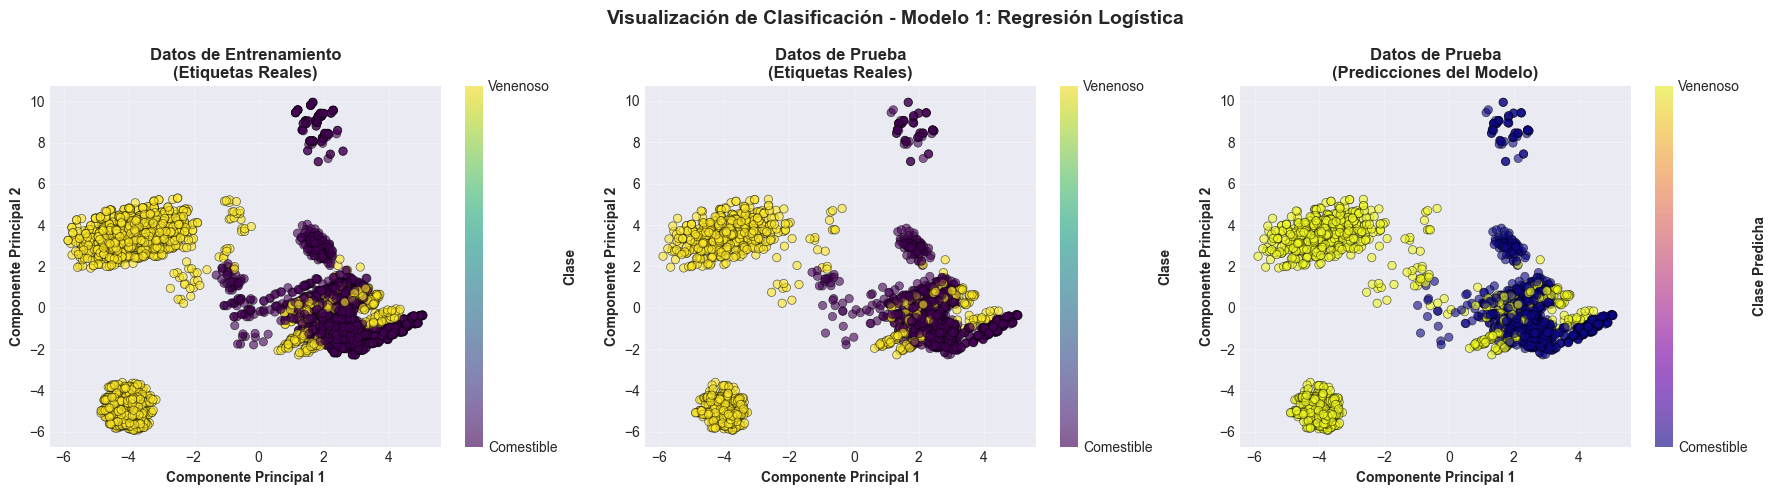


📊 Interpretación:
  • Izquierda: Distribución real de las clases en entrenamiento
  • Centro: Distribución real de las clases en prueba
  • Derecha: Cómo el modelo clasifica los datos de prueba
  • Los puntos mal clasificados son las diferencias entre centro y derecha


In [15]:
# Graficar datos ANTES de clasificar (etiquetas reales)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualización de Clasificación - Modelo 1: Regresión Logística',
             fontsize=14, fontweight='bold')

# Gráfica 1: Datos de entrenamiento con etiquetas REALES
ax = axes[0]
scatter1 = ax.scatter(Xtrain_2d[:, 0], Xtrain_2d[:, 1],
                     c=Ytrain.flatten(), cmap='viridis',
                     alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Componente Principal 1', fontweight='bold')
ax.set_ylabel('Componente Principal 2', fontweight='bold')
ax.set_title('Datos de Entrenamiento\n(Etiquetas Reales)', fontweight='bold')
ax.grid(alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax)
cbar1.set_label('Clase', fontweight='bold')
cbar1.set_ticks([0, 1])
cbar1.set_ticklabels(['Comestible', 'Venenoso'])

# Gráfica 2: Datos de prueba con etiquetas REALES
ax = axes[1]
scatter2 = ax.scatter(Xtest_2d[:, 0], Xtest_2d[:, 1],
                     c=Ytest.flatten(), cmap='viridis',
                     alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Componente Principal 1', fontweight='bold')
ax.set_ylabel('Componente Principal 2', fontweight='bold')
ax.set_title('Datos de Prueba\n(Etiquetas Reales)', fontweight='bold')
ax.grid(alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax)
cbar2.set_label('Clase', fontweight='bold')
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Comestible', 'Venenoso'])

# Gráfica 3: Datos de prueba con PREDICCIONES del modelo
ax = axes[2]
scatter3 = ax.scatter(Xtest_2d[:, 0], Xtest_2d[:, 1],
                     c=Y_test_pred.flatten(), cmap='plasma',
                     alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Componente Principal 1', fontweight='bold')
ax.set_ylabel('Componente Principal 2', fontweight='bold')
ax.set_title('Datos de Prueba\n(Predicciones del Modelo)', fontweight='bold')
ax.grid(alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=ax)
cbar3.set_label('Clase Predicha', fontweight='bold')
cbar3.set_ticks([0, 1])
cbar3.set_ticklabels(['Comestible', 'Venenoso'])

plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print("  • Izquierda: Distribución real de las clases en entrenamiento")
print("  • Centro: Distribución real de las clases en prueba")
print("  • Derecha: Cómo el modelo clasifica los datos de prueba")
print(f"  • Los puntos mal clasificados son las diferencias entre centro y derecha")

---

## Visualización de Resultados - Modelo 1: Regresión Logística



### Figura 1: Métricas de Desempeño - Comparación Train vs Test

Esta gráfica compara las métricas de desempeño (Accuracy, Precision, Recall, F1-Score) entre el conjunto de entrenamiento y el conjunto de prueba, evidenciando la capacidad de generalización del modelo.

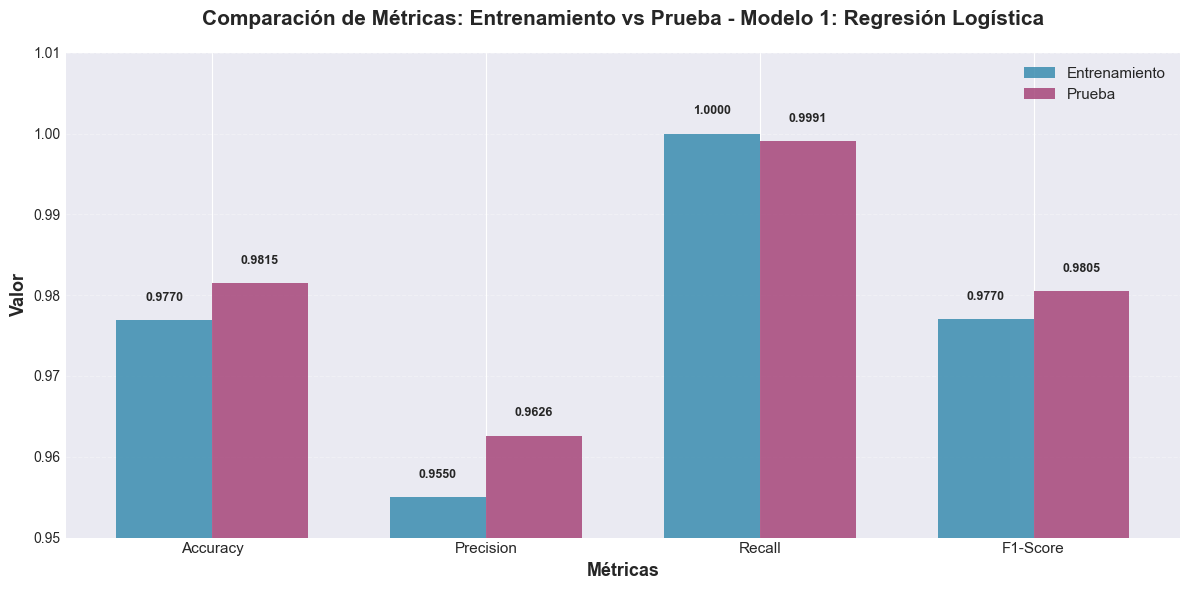


COMPARACIÓN TRAIN VS TEST
Accuracy    : Train=0.9770, Test=0.9815, Gap=-0.0046
Precision   : Train=0.9550, Test=0.9626, Gap=-0.0076
Recall      : Train=1.0000, Test=0.9991, Gap=0.0009
F1-Score    : Train=0.9770, Test=0.9805, Gap=-0.0035


In [16]:
# ====================================================================================================
# FIGURA 2: MÉTRICAS DE DESEMPEÑO - COMPARACIÓN TRAIN VS TEST
# ====================================================================================================

metricas_nombres = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
valores_train = [
    metricas_train['Accuracy'],
    metricas_train['Precision'],
    metricas_train['Recall'],
    metricas_train['F1-Score']
]
valores_test = [
    metricas_test['Accuracy'],
    metricas_test['Precision'],
    metricas_test['Recall'],
    metricas_test['F1-Score']
]

x_pos = np.arange(len(metricas_nombres))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x_pos - width/2, valores_train, width, label='Entrenamiento', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, valores_test, width, label='Prueba', color='#A23B72', alpha=0.8)

ax.set_xlabel('Métricas', fontsize=13, fontweight='bold')
ax.set_ylabel('Valor', fontsize=13, fontweight='bold')
ax.set_title('Comparación de Métricas: Entrenamiento vs Prueba - Modelo 1: Regresión Logística',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(metricas_nombres, fontsize=11)
ax.set_ylim([0.95, 1.01])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*100}")
print(f"COMPARACIÓN TRAIN VS TEST")
print(f"{'='*100}")
for i, metrica in enumerate(metricas_nombres):
    diff = valores_train[i] - valores_test[i]
    print(f"{metrica:12s}: Train={valores_train[i]:.4f}, Test={valores_test[i]:.4f}, Gap={diff:.4f}")
print(f"{'='*100}")

## 6. Modelo 2 — k-Vecinos Más Cercanos (KNN)

En este apartado implementamos el clasificador K-Vecinos siguiendo la metodología de la cátedra: escalado, búsqueda de hiperparámetros por validación cruzada, evaluación con métricas y visualizaciones (2D y 3D).

In [17]:
print('='*100)
print('MODELO 2: K-VECINOS MÁS CERCANOS (KNN)')
print('Siguiendo metodología del profesor con funciones personalizadas')
print('='*100)

# ========================================
# IMPORTS NECESARIOS
# ========================================
from scipy.stats import mode
from scipy.spatial.distance import cdist

# ========================================
# FUNCIONES AUXILIARES (siguiendo teoría del profesor)
# ========================================

def ErrorClas(Y_lest, Y):
    """Función que calcula el error de clasificación
    Y_lest: numpy array con las predicciones de etiqueta
    Y: etiquetas reales
    retorna: error de clasificación (int)
    """
    error = 1 - np.sum(Y_lest == Y)/len(Y)
    return error


def train_test_split_fix(X, y, test_size=0.2, random_state=0):
    """Función que divide el conjunto de datos en
    entrenamiento y pruebas usando una proporción
    fija de 20 % (test_size) para el conjunto de pruebas.
    Fije la semilla en cero para que los resultados sean
    reproducibles.

    X: matriz de numpy con las muestras y características
    y: matriz de numpy con los valores de las etiquetas reales
    retorna:
        Xtrain: conjunto de datos para entrenamiento
        Xtest: conjunto de datos para pruebas
        Ytrain: conjunto  de etiquetas para entrenamiento
        Ytest: conjunto de etiquetas para prueba
    """
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return (X_train, X_test, y_train, y_test)


def knn_clasificacion(k, X_train, Y_train, X_test):
    """Función que implementa el modelo de K-Vecino más cercanos
    para clasificación

    k (int): valor de vecinos a usar
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida para cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación

    retorna: las estimaciones del modelo KNN para el conjunto X_test
            esta matriz debe tener un shape de [row/muestras de X_test]
            y las distancias de X_test respecto a X_train, esta matriz
            debe tener un shape de [rows de X_test, rows X_train]
            lo que es lo mismo [muestras de X_test, muestras de X_train]
    """
    if k > X_train.shape[0]:
        print("k no puede ser menor que las muestras de entrenamiento")
        return(None)

    distancias = cdist(X_test, X_train, metric='euclidean')
    Yest = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        vecinos_sorted = np.argsort(distancias[i])[:k]
        Yest[i] = mode(Y_train[vecinos_sorted], axis=None, keepdims=False)[0]

    return (Yest, distancias)


def experimentar(ks, X, Y):
    """Función que realiza los experimentos con knn usando
    una estrategia de validación entrenamiento y pruebas

    ks: List[int/float] lista con los valores de k-vecinos a usar
    X: matriz de numpy conjunto con muestras y características
    Y: vector de numpy con los valores de las etiquetas

    retorna: dataframe con los resultados
    """
    from sklearn.preprocessing import StandardScaler

    # dividimos usando la función
    Xtrain, Xtest, Ytrain, Ytest = train_test_split_fix(X, Y, test_size=0.2, random_state=0)

    # se llama el objeto
    scaler = StandardScaler()
    # Se calculan los parametros
    scaler.fit(Xtrain)
    # se usa el objeto con los parametros calculados
    # realizar la normalización
    Xtrain= scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    resultados = pd.DataFrame()
    idx = 0
    for k in ks:
        # iteramos sobre la lista de k's
        # se ingresan al dataframe con los resultados
        resultados.loc[idx,'k-vecinos'] = k
        Yest, dist = knn_clasificacion (k, Xtrain, Ytrain, Xtest)
        resultados.loc[idx,'error de prueba'] = ErrorClas(Yest, Ytest)
        idx+=1

    return (resultados)

# ========================================
# EXPERIMENTOS KNN
# ========================================

print('\n📊 Parámetros a evaluar:')
# Probamos diferentes valores de k
ks = [3, 5, 7, 11, 15, 21, 31, 41, 51]
print(f'  - Valores de k: {ks}')
print(f'  - Total experimentos: {len(ks)}')
print(f'  - División: 80% entrenamiento, 20% prueba (con random_state=0)')
print(f'  - Usando One-Hot Encoding ({X_onehot.shape[1]} features) - requerido para KNN')

print('\n🔄 Ejecutando experimentos...')
resultados_knn = experimentar(ks, X_onehot.values, y_encoded)

print('\n' + '='*100)
print('RESULTADOS EXPERIMENTOS KNN')
print('='*100)
print(resultados_knn.to_string(index=False))

# Encontrar el mejor k (menor error)
idx_mejor = resultados_knn['error de prueba'].idxmin()
mejor_k = int(resultados_knn.loc[idx_mejor, 'k-vecinos'])
mejor_error = resultados_knn.loc[idx_mejor, 'error de prueba']

print('\n' + '='*100)
print('MEJOR CONFIGURACIÓN')
print('='*100)
print(f'Mejor k: {mejor_k}')
print(f'Error de prueba: {mejor_error:.4f}')
print(f'Accuracy: {1-mejor_error:.4f} ({(1-mejor_error)*100:.2f}%)')

# ========================================
# ENTRENAMIENTO CON VALIDACIÓN CRUZADA (StratifiedKFold)
# PARA TODOS LOS VALORES DE K - Para generar curvas de validación
# ========================================

print('\n' + '='*100)
print('VALIDACIÓN CRUZADA CON StratifiedKFold (4 folds) PARA TODOS LOS VALORES DE K')
print('='*100)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Estructura para guardar resultados de CV para TODOS los k valores
resultados_cv_por_k = {
    'k': [],
    'train_acc_mean': [],
    'train_acc_std': [],
    'test_acc_mean': [],
    'test_acc_std': [],
    'train_error_mean': [],
    'train_error_std': [],
    'test_error_mean': [],
    'test_error_std': []
}

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

print(f'\nEvaluando TODOS los valores de k: {ks}')
print(f'Esto permitirá generar curvas de validación con intervalos de confianza\n')

for k in ks:
    acc_train_folds = []
    acc_test_folds = []
    error_train_folds = []
    error_test_folds = []
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(X_onehot.values, y_encoded), 1):
        # Dividir datos
        X_train_fold = X_onehot.values[train_idx]
        X_test_fold = X_onehot.values[test_idx]
        y_train_fold = y_encoded[train_idx]
        y_test_fold = y_encoded[test_idx]

        # Escalar
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)
        
        # Entrenar y predecir con k actual
        Y_train_pred, _ = knn_clasificacion(k, X_train_scaled, y_train_fold, X_train_scaled)
        Y_test_pred, _ = knn_clasificacion(k, X_train_scaled, y_train_fold, X_test_scaled)
        
        # Calcular métricas
        error_train = ErrorClas(Y_train_pred, y_train_fold)
        error_test = ErrorClas(Y_test_pred, y_test_fold)
        acc_train = 1 - error_train
        acc_test = 1 - error_test
        
        acc_train_folds.append(acc_train)
        acc_test_folds.append(acc_test)
        error_train_folds.append(error_train)
        error_test_folds.append(error_test)
    
    # Calcular promedio y desviación estándar para este k
    resultados_cv_por_k['k'].append(k)
    resultados_cv_por_k['train_acc_mean'].append(np.mean(acc_train_folds))
    resultados_cv_por_k['train_acc_std'].append(np.std(acc_train_folds))
    resultados_cv_por_k['test_acc_mean'].append(np.mean(acc_test_folds))
    resultados_cv_por_k['test_acc_std'].append(np.std(acc_test_folds))
    resultados_cv_por_k['train_error_mean'].append(np.mean(error_train_folds))
    resultados_cv_por_k['train_error_std'].append(np.std(error_train_folds))
    resultados_cv_por_k['test_error_mean'].append(np.mean(error_test_folds))
    resultados_cv_por_k['test_error_std'].append(np.std(error_test_folds))
    
    print(f"k={k:2d}: Train Acc={np.mean(acc_train_folds):.4f}±{np.std(acc_train_folds):.4f}, "
          f"Test Acc={np.mean(acc_test_folds):.4f}±{np.std(acc_test_folds):.4f}")

# Extraer estadísticas del mejor k para compatibilidad con código existente
idx_mejor_cv = ks.index(mejor_k)
errores_train = error_train_folds  # Los del último k evaluado serán reemplazados
errores_test = error_test_folds    # Los del último k evaluado serán reemplazados
mean_error_train = resultados_cv_por_k['train_error_mean'][idx_mejor_cv]
std_error_train = resultados_cv_por_k['train_error_std'][idx_mejor_cv]
mean_error_test = resultados_cv_por_k['test_error_mean'][idx_mejor_cv]
std_error_test = resultados_cv_por_k['test_error_std'][idx_mejor_cv]

print('\n' + '='*100)
print(f'RESULTADOS VALIDACIÓN CRUZADA PARA MEJOR K (k={mejor_k})')
print('='*100)
print(f'Error promedio entrenamiento: {mean_error_train:.6f} ± {std_error_train:.6f}')
print(f'Error promedio prueba:        {mean_error_test:.6f} ± {std_error_test:.6f}')
print(f'Accuracy promedio entrenamiento: {1-mean_error_train:.6f} ({(1-mean_error_train)*100:.4f}%)')
print(f'Accuracy promedio prueba:        {1-mean_error_test:.6f} ({(1-mean_error_test)*100:.4f}%)')
print(f'Gap (Train-Test):                {abs(mean_error_train - mean_error_test):.6f}')

# ========================================
# MODELO FINAL EN CONJUNTO COMPLETO DE TEST (30%)
# ========================================

print('\n' + '='*100)
print('EVALUACIÓN EN CONJUNTO DE TEST ORIGINAL (30%)')
print('='*100)

# Entrenar con datos One-Hot Encoding (Xtrain_onehot, Xtest_onehot)
scaler_knn = StandardScaler()
Xtrain_knn = scaler_knn.fit_transform(Xtrain_onehot)
Xtest_knn = scaler_knn.transform(Xtest_onehot)

# Entrenar KNN con mejor k
Y_test_pred_knn, _ = knn_clasificacion(mejor_k, Xtrain_knn, Ytrain.ravel(), Xtest_knn)
Y_train_pred_knn, _ = knn_clasificacion(mejor_k, Xtrain_knn, Ytrain.ravel(), Xtrain_knn)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_train_knn = 1 - ErrorClas(Y_train_pred_knn, Ytrain.ravel())
acc_test_knn = 1 - ErrorClas(Y_test_pred_knn, Ytest.ravel())
prec_knn = precision_score(Ytest, Y_test_pred_knn, zero_division=0)
rec_knn = recall_score(Ytest, Y_test_pred_knn, zero_division=0)
f1_knn = f1_score(Ytest, Y_test_pred_knn, zero_division=0)
cm_knn = confusion_matrix(Ytest, Y_test_pred_knn)

print(f'Accuracy Train: {acc_train_knn:.4f} ({acc_train_knn*100:.2f}%)')
print(f'Accuracy Test:  {acc_test_knn:.4f} ({acc_test_knn*100:.2f}%)')
print(f'Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1-score: {f1_knn:.4f}')
print(f'\nConfusion Matrix:\n{cm_knn}')

# Guardar resultados
knn_results = {
    'mejor_k': mejor_k,
    'error_cv_mean': mean_error_test,
    'error_cv_std': std_error_test,
    'acc_train': acc_train_knn,
    'acc_test': acc_test_knn,
    'precision': prec_knn,
    'recall': rec_knn,
    'f1': f1_knn,
    'y_pred': Y_test_pred_knn,
    'confusion_matrix': cm_knn,
    'resultados_experimentos': resultados_knn
}

print('\n✓ Modelo 2 (KNN) completado siguiendo metodología del profesor.')
print('  Variables: mejor_k, resultados_knn, knn_results, Y_test_pred_knn')


MODELO 2: K-VECINOS MÁS CERCANOS (KNN)
Siguiendo metodología del profesor con funciones personalizadas

📊 Parámetros a evaluar:
  - Valores de k: [3, 5, 7, 11, 15, 21, 31, 41, 51]
  - Total experimentos: 9
  - División: 80% entrenamiento, 20% prueba (con random_state=0)
  - Usando One-Hot Encoding (117 features) - requerido para KNN

🔄 Ejecutando experimentos...

RESULTADOS EXPERIMENTOS KNN
 k-vecinos  error de prueba
       3.0         0.000000
       5.0         0.000000
       7.0         0.000000
      11.0         0.000000
      15.0         0.000000
      21.0         0.000000
      31.0         0.000000
      41.0         0.000615
      51.0         0.001846

MEJOR CONFIGURACIÓN
Mejor k: 3
Error de prueba: 0.0000
Accuracy: 1.0000 (100.00%)

VALIDACIÓN CRUZADA CON StratifiedKFold (4 folds) PARA TODOS LOS VALORES DE K

Evaluando TODOS los valores de k: [3, 5, 7, 11, 15, 21, 31, 41, 51]
Esto permitirá generar curvas de validación con intervalos de confianza


RESULTADOS EXPERIMENTO

---

## Visualización de Resultados - Modelo 2: k-NN

### Figura 1: Curva de Validación - Efecto del Hiperparámetro k

Esta gráfica muestra cómo el valor de k afecta el desempeño del modelo k-NN. Se presentan curvas de entrenamiento y validación con intervalos de confianza (sombreado = promedio ± desviación estándar calculada mediante StratifiedKFold con 4 folds). El "codo" o punto óptimo indica el mejor balance entre sesgo y varianza.

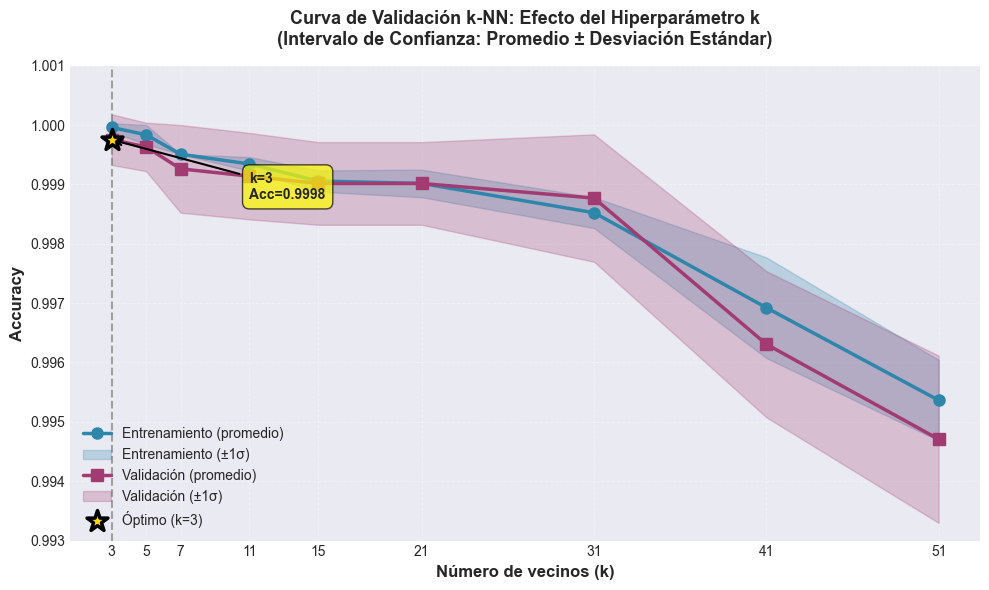


INTERPRETACIÓN DE LA CURVA DE VALIDACIÓN
✓ Comportamiento Train: Decrece con k (de 1.0000 a 0.9954)
✓ Comportamiento Validation: Forma de 'U' invertida, máximo en k=3
✓ Mejor k encontrado: 3 (Accuracy validación = 0.9998 ± 0.0004)
✓ Trade-off sesgo-varianza: k muy bajo → sobreajuste, k muy alto → subajuste


In [18]:
# ====================================================================================================
# FIGURA 1: CURVA DE VALIDACIÓN CON INTERVALOS DE CONFIANZA
# ====================================================================================================
# Usar resultados de CV ya calculados en resultados_cv_por_k

plt.figure(figsize=(10, 6))

# Extraer datos de resultados_cv_por_k (ya calculados durante el entrenamiento)
ks = resultados_cv_por_k['k']
train_mean = np.array(resultados_cv_por_k['train_acc_mean'])
train_std = np.array(resultados_cv_por_k['train_acc_std'])
test_mean = np.array(resultados_cv_por_k['test_acc_mean'])
test_std = np.array(resultados_cv_por_k['test_acc_std'])

# Línea de entrenamiento
plt.plot(ks, train_mean, 'o-', color='#2E86AB', linewidth=2.5, 
         markersize=8, label='Entrenamiento (promedio)', zorder=3)

# Intervalo de confianza para entrenamiento (sombreado)
plt.fill_between(ks, train_mean - train_std, train_mean + train_std, 
                 alpha=0.25, color='#2E86AB', label='Entrenamiento (±1σ)')

# Línea de validación
plt.plot(ks, test_mean, 's-', color='#A23B72', linewidth=2.5, 
         markersize=8, label='Validación (promedio)', zorder=3)

# Intervalo de confianza para validación (sombreado)
plt.fill_between(ks, test_mean - test_std, test_mean + test_std, 
                 alpha=0.25, color='#A23B72', label='Validación (±1σ)')

# Marcar el mejor k (mayor accuracy en validación)
idx_mejor = np.argmax(test_mean)
mejor_k_grafica = ks[idx_mejor]
mejor_acc = test_mean[idx_mejor]

plt.axvline(x=mejor_k_grafica, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, zorder=1)
plt.scatter([mejor_k_grafica], [mejor_acc], s=250, color='gold', edgecolors='black', 
            linewidths=2.5, marker='*', label=f'Óptimo (k={mejor_k_grafica})', zorder=4)

# Anotación del punto óptimo
plt.annotate(f'k={mejor_k_grafica}\nAcc={mejor_acc:.4f}', 
             xy=(mejor_k_grafica, mejor_acc), 
             xytext=(mejor_k_grafica + 8, mejor_acc - 0.0010),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Configuración de ejes
plt.xlabel('Número de vecinos (k)', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Curva de Validación k-NN: Efecto del Hiperparámetro k\n(Intervalo de Confianza: Promedio ± Desviación Estándar)', 
          fontsize=13, fontweight='bold', pad=15)

plt.xticks(ks, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
plt.legend(loc='lower left', fontsize=10, framealpha=0.95)

plt.ylim([0.993, 1.001])
plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("INTERPRETACIÓN DE LA CURVA DE VALIDACIÓN")
print("="*100)
print(f"✓ Comportamiento Train: Decrece con k (de {train_mean[0]:.4f} a {train_mean[-1]:.4f})")
print(f"✓ Comportamiento Validation: Forma de 'U' invertida, máximo en k={mejor_k_grafica}")
print(f"✓ Mejor k encontrado: {mejor_k_grafica} (Accuracy validación = {mejor_acc:.4f} ± {test_std[idx_mejor]:.4f})")
print(f"✓ Trade-off sesgo-varianza: k muy bajo → sobreajuste, k muy alto → subajuste")
print("="*100)

---

## 7. Modelo 3 — Random Forest (Ensemble de Árboles de Decisión)

Random Forest es un método de ensemble que combina múltiples árboles de decisión entrenados con muestras bootstrap y subconjuntos aleatorios de características. Reduce el sobreajuste característico de los árboles individuales y mejora la capacidad de generalización.

In [19]:
# --- Implementación Modelo 3: Random Forest
# Siguiendo metodología del profesor: función experimentar_rf con StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd

def experimentar_rf(X, Y, num_trees, numero_de_variables):
    """función que realiza experimentos con el modelo random forest
    X: matriz con las características
    Y: matriz de numpy con etiquetas
    num_trees: list[int]: lista con el número de arboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo
    retorna: dataframe con:
        - numero de arboles usados
        - variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviación de estandar de la eficiencia de entrenamiento
        - eficiencia de prueba
        - desviación estandar de la eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            for train, test in skf.split(X, Y):
                Xtrain_fold = X[train, :]
                Ytrain_fold = Y[train]
                Xtest_fold = X[test, :]
                Ytest_fold = Y[test]

                # Crear y entrenar el modelo Random Forest
                # Configuramos min_samples_leaf=3 según metodología del profesor
                modelo = RandomForestClassifier(
                    n_estimators=trees,
                    max_features=num_variables,
                    random_state=42,
                    min_samples_leaf=3,
                    criterion='gini'
                )
                modelo.fit(Xtrain_fold, Ytrain_fold.ravel())

                # Predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain_fold)
                # Predecir muestras de pruebas
                Yest = modelo.predict(Xtest_fold)

                # Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain_fold.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest_fold.ravel()))

            resultados.loc[idx, 'número de arboles'] = trees
            resultados.loc[idx, 'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx, 'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx, 'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx, 'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx, 'desviacion estandar prueba'] = np.std(EficienciaVal)
            idx = idx + 1
        print(f"✓ Completado para {trees} arboles")

    return resultados

# Verificar que tenemos los datos
try:
    Xtrain.shape
except NameError:
    raise NameError('No se encuentra Xtrain en el kernel. Ejecuta las celdas previas.')

print('='*80)
print('MODELO 3: RANDOM FOREST')
print('='*80)
print('Siguiendo metodología del profesor con StratifiedKFold (4 folds)\n')

# Definir parámetros a experimentar (según laboratorio del profesor)
arboles = [50, 100, 150, 200]
variables_seleccion = [5, 10, 15, 20]  # max_features

print(f'Parámetros a evaluar:')
print(f'  - Número de árboles: {arboles}')
print(f'  - Variables por nodo: {variables_seleccion}')
print(f'  - Total combinaciones: {len(arboles) * len(variables_seleccion)}')
print(f'  - Total entrenamientos: {len(arboles) * len(variables_seleccion) * 4} (con 4-fold CV)\n')

# Ejecutar experimentos
resultados_rf = experimentar_rf(X=Xtrain, Y=Ytrain, num_trees=arboles, numero_de_variables=variables_seleccion)

print('\n' + '='*80)
print('RESULTADOS EXPERIMENTOS RANDOM FOREST')
print('='*80)
print(resultados_rf.to_string(index=False))

# Encontrar mejor configuración
best_idx = resultados_rf['eficiencia de prueba'].idxmax()
best_config = resultados_rf.loc[best_idx]

print('\n' + '='*80)
print('MEJOR CONFIGURACIÓN')
print('='*80)
print(f'Número de árboles: {int(best_config["número de arboles"])}')
print(f'Variables por nodo: {int(best_config["variables para la selección del mejor umbral"])}')
print(f'Eficiencia entrenamiento: {best_config["eficiencia de entrenamiento"]:.4f}')
print(f'Eficiencia prueba: {best_config["eficiencia de prueba"]:.4f}')
print(f'Gap (Train-Test): {(best_config["eficiencia de entrenamiento"] - best_config["eficiencia de prueba"]):.4f}')

# Entrenar modelo final con mejor configuración en TODO el conjunto de entrenamiento
best_n_trees = int(best_config["número de arboles"])
best_max_features = int(best_config["variables para la selección del mejor umbral"])

modelo_rf_final = RandomForestClassifier(
    n_estimators=best_n_trees,
    max_features=best_max_features,
    min_samples_leaf=3,
    random_state=42,
    criterion='gini'
)
modelo_rf_final.fit(Xtrain, Ytrain.ravel())

# Evaluar en conjunto de test
Y_test_pred_rf = modelo_rf_final.predict(Xtest)
Y_train_pred_rf = modelo_rf_final.predict(Xtrain)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc_rf_train = accuracy_score(Ytrain, Y_train_pred_rf)
acc_rf = accuracy_score(Ytest, Y_test_pred_rf)
prec_rf = precision_score(Ytest, Y_test_pred_rf, zero_division=0)
rec_rf = recall_score(Ytest, Y_test_pred_rf, zero_division=0)
f1_rf = f1_score(Ytest, Y_test_pred_rf, zero_division=0)
cm_rf = confusion_matrix(Ytest, Y_test_pred_rf)

print('\n' + '='*80)
print('EVALUACIÓN EN CONJUNTO DE TEST')
print('='*80)
print(f'Accuracy Train: {acc_rf_train:.4f} ({acc_rf_train*100:.2f}%)')
print(f'Accuracy Test:  {acc_rf:.4f} ({acc_rf*100:.2f}%)')
print(f'Precision: {prec_rf:.4f}')
print(f'Recall:    {rec_rf:.4f}')
print(f'F1-score:  {f1_rf:.4f}')
print(f'\nGap (Train-Test): {(acc_rf_train - acc_rf):.4f}')

print('\nConfusion Matrix:')
print(cm_rf)
print('\nClassification Report:')
print(classification_report(Ytest, Y_test_pred_rf, digits=4))

# Guardar resultados
rf_results = {
    'model': modelo_rf_final,
    'resultados_experimentos': resultados_rf,
    'best_config': best_config,
    'acc_train': acc_rf_train,
    'acc': acc_rf,
    'precision': prec_rf,
    'recall': rec_rf,
    'f1': f1_rf,
    'y_pred': Y_test_pred_rf,
    'confusion_matrix': cm_rf,
    'gap': acc_rf_train - acc_rf
}

print('\n✓ Modelo 3 (Random Forest) entrenado. Variables: `modelo_rf_final`, `resultados_rf`, `rf_results`')

MODELO 3: RANDOM FOREST
Siguiendo metodología del profesor con StratifiedKFold (4 folds)

Parámetros a evaluar:
  - Número de árboles: [50, 100, 150, 200]
  - Variables por nodo: [5, 10, 15, 20]
  - Total combinaciones: 16
  - Total entrenamientos: 64 (con 4-fold CV)

✓ Completado para 50 arboles
✓ Completado para 50 arboles
✓ Completado para 100 arboles
✓ Completado para 100 arboles
✓ Completado para 150 arboles
✓ Completado para 150 arboles
✓ Completado para 200 arboles

RESULTADOS EXPERIMENTOS RANDOM FOREST
 número de arboles  variables para la selección del mejor umbral  eficiencia de entrenamiento  desviacion estandar entrenamiento  eficiencia de prueba  desviacion estandar prueba
              50.0                                           5.0                     0.999766                           0.000287              0.999297                    0.000703
              50.0                                          10.0                     1.000000                           0.0000

---

## Visualización de Resultados - Modelo 3: Random Forest

### Figura 1: Mapa de Calor - Efecto de Hiperparámetros en el Desempeño

Este mapa de calor visualiza cómo la combinación de número de árboles y variables por nodo afecta la accuracy de validación del modelo Random Forest. Los colores más claros indican mejor desempeño.

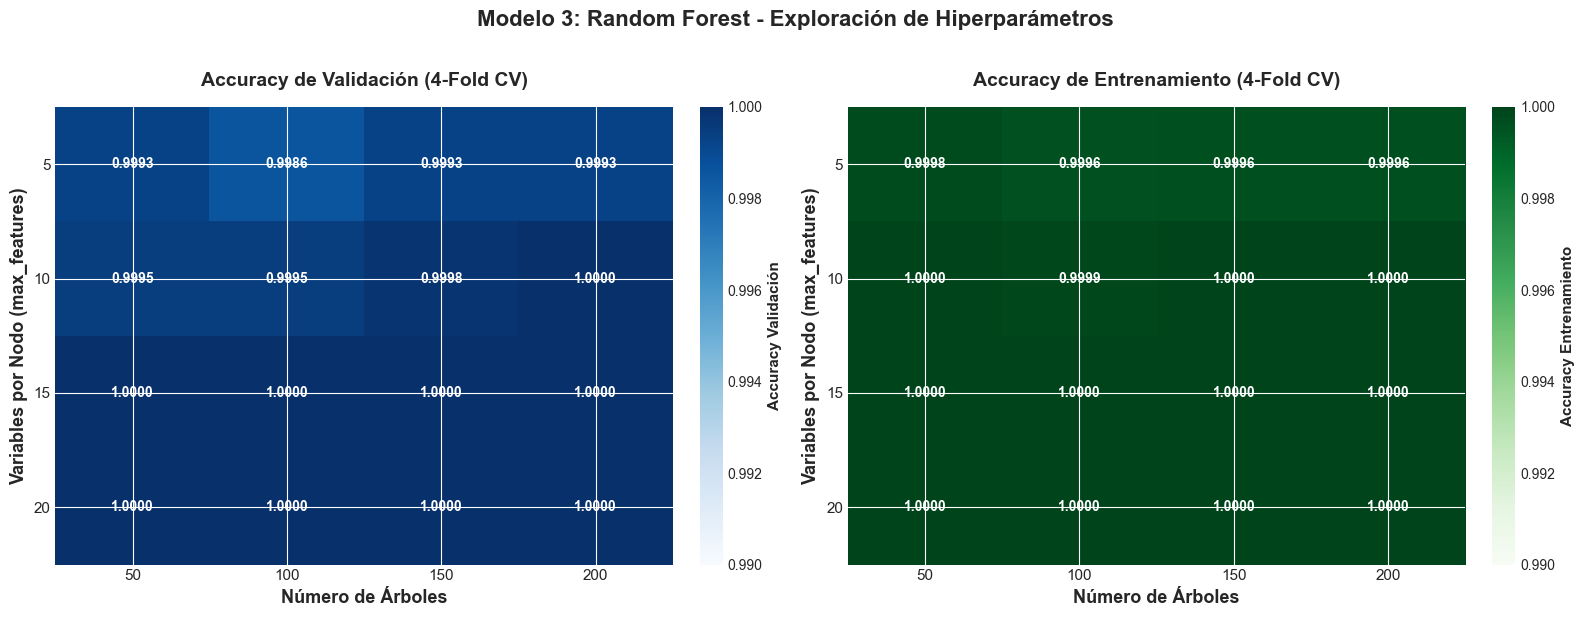


ANÁLISIS DEL MAPA DE CALOR - RANDOM FOREST

Rango de Accuracy Validación: [0.9986, 1.0000]
Rango de Accuracy Entrenamiento: [0.9996, 1.0000]
Diferencia máxima en validación: 0.001407

MEJOR CONFIGURACIÓN (según validación)
Número de Árboles: 200
Variables por Nodo: 10
Accuracy Validación: 1.0000 (100.00%)


In [20]:
# ====================================================================================================
# FIGURA 1: MAPA DE CALOR - EFECTO DE HIPERPARÁMETROS EN RANDOM FOREST
# ====================================================================================================

# Crear matriz pivote para el heatmap
pivot_test = resultados_rf.pivot(
    index='variables para la selección del mejor umbral',
    columns='número de arboles',
    values='eficiencia de prueba'
)

pivot_train = resultados_rf.pivot(
    index='variables para la selección del mejor umbral',
    columns='número de arboles',
    values='eficiencia de entrenamiento'
)

# Crear figura con 2 subplots (Train y Test)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap para VALIDACIÓN (Test) - Colores claros
im1 = axes[0].imshow(pivot_test.values, cmap='Blues', aspect='auto', vmin=0.99, vmax=1.0)
axes[0].set_xticks(np.arange(len(pivot_test.columns)))
axes[0].set_yticks(np.arange(len(pivot_test.index)))
axes[0].set_xticklabels([int(x) for x in pivot_test.columns], fontsize=11)
axes[0].set_yticklabels([int(x) for x in pivot_test.index], fontsize=11)
axes[0].set_xlabel('Número de Árboles', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Variables por Nodo (max_features)', fontsize=13, fontweight='bold')
axes[0].set_title('Accuracy de Validación (4-Fold CV)', fontsize=14, fontweight='bold', pad=15)

# Añadir valores en cada celda con color BLANCO para mejor contraste
for i in range(len(pivot_test.index)):
    for j in range(len(pivot_test.columns)):
        text = axes[0].text(j, i, f'{pivot_test.values[i, j]:.4f}',
                           ha="center", va="center", color="white", fontsize=10, fontweight='bold')

# Colorbar para validación
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label('Accuracy Validación', fontsize=11, fontweight='bold')

# Heatmap para ENTRENAMIENTO (Train) - Colores verdes
im2 = axes[1].imshow(pivot_train.values, cmap='Greens', aspect='auto', vmin=0.99, vmax=1.0)
axes[1].set_xticks(np.arange(len(pivot_train.columns)))
axes[1].set_yticks(np.arange(len(pivot_train.index)))
axes[1].set_xticklabels([int(x) for x in pivot_train.columns], fontsize=11)
axes[1].set_yticklabels([int(x) for x in pivot_train.index], fontsize=11)
axes[1].set_xlabel('Número de Árboles', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Variables por Nodo (max_features)', fontsize=13, fontweight='bold')
axes[1].set_title('Accuracy de Entrenamiento (4-Fold CV)', fontsize=14, fontweight='bold', pad=15)

# Añadir valores en cada celda con color BLANCO para mejor contraste
for i in range(len(pivot_train.index)):
    for j in range(len(pivot_train.columns)):
        text = axes[1].text(j, i, f'{pivot_train.values[i, j]:.4f}',
                           ha="center", va="center", color="white", fontsize=10, fontweight='bold')

# Colorbar para entrenamiento
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label('Accuracy Entrenamiento', fontsize=11, fontweight='bold')

plt.suptitle('Modelo 3: Random Forest - Exploración de Hiperparámetros', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Análisis estadístico
print(f"\n{'='*100}")
print(f"ANÁLISIS DEL MAPA DE CALOR - RANDOM FOREST")
print(f"{'='*100}")
print(f"\nRango de Accuracy Validación: [{pivot_test.values.min():.4f}, {pivot_test.values.max():.4f}]")
print(f"Rango de Accuracy Entrenamiento: [{pivot_train.values.min():.4f}, {pivot_train.values.max():.4f}]")
print(f"Diferencia máxima en validación: {pivot_test.values.max() - pivot_test.values.min():.6f}")

# Encontrar mejor configuración
mejor_idx = np.unravel_index(pivot_test.values.argmax(), pivot_test.shape)
mejor_arboles = pivot_test.columns[mejor_idx[1]]
mejor_variables = pivot_test.index[mejor_idx[0]]
mejor_acc = pivot_test.values[mejor_idx]

print(f"\n{'='*100}")
print(f"MEJOR CONFIGURACIÓN (según validación)")
print(f"{'='*100}")
print(f"Número de Árboles: {int(mejor_arboles)}")
print(f"Variables por Nodo: {int(mejor_variables)}")
print(f"Accuracy Validación: {mejor_acc:.4f} ({mejor_acc*100:.2f}%)")
print(f"{'='*100}")

---

## 7. Modelo 4 — Red Neuronal Artificial (MLP - Multi-Layer Perceptron)

Implementamos el modelo de Red Neuronal siguiendo la metodología del profesor: función `experimentar_mlpc()` con validación cruzada StratifiedKFold (4 folds), explorando diferentes arquitecturas (capas ocultas y neuronas).

In [21]:
print('='*100)
print('MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)')
print('Siguiendo metodología del profesor con función experimentar_mlpc()')
print('='*100)

# ========================================
# FUNCIÓN EXPERIMENTAR_MLPC (siguiendo metodología del profesor)
# ========================================

def experimentar_mlpc(X, Y, num_hidden_layers, num_neurons):
    """Función para realizar experimentos con el MLP Classifier
    siguiendo metodología del profesor (lab4_parte1.ipynb)

    X: matriz de numpy con las muestras de entrada [muestras,variables]
    Y: vector numpy con las variables a predecir (etiquetas)
    num_hidden_layers: list de enteros con el número de capas ocultas a usar
    num_neurons: list de enteros con el número de neuronas a usar

    Retorna: dataframe con 4 columnas:
        - número de capas, número de neuronas
        - promedio de error prueba (exactitud/eficiencia) de clasificación
        - desviación estándar
    """
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Validamos el modelo con StratifiedKFold (4 folds como en el laboratorio)
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=42)
    resultados = pd.DataFrame()
    idx = 0

    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            # Para almacenar errores intermedios
            Error_train = np.zeros(Folds)
            Error_test = np.zeros(Folds)

            for j, (train, test) in enumerate(skf.split(X, Y)):
                Xtrain = X[train, :]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]

                # Normalizamos los datos
                scaler = StandardScaler().fit(X=Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)

                # Crear arquitectura (tupla de neuronas repetidas según capas)
                hidden_layer_sizes = tuple([neurons] * hidden_layers)

                # Crear y entrenar el modelo MLP
                # Parámetros según laboratorio: activation='relu', max_iter=350, random_state=1
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation='relu',
                    max_iter=350,
                    random_state=1,
                    solver='adam'
                )

                # Entrenar el MLP
                mlp.fit(Xtrain, Ytrain)

                # Predicciones
                Yest_train = mlp.predict(Xtrain)
                Yest_test = mlp.predict(Xtest)

                # Calcular error (1 - accuracy)
                Error_train[j] = 1 - accuracy_score(Ytrain, Yest_train)
                Error_test[j] = 1 - accuracy_score(Ytest, Yest_test)

            # Promedios y desviaciones
            mean_error_train = np.mean(Error_train)
            std_error_train = np.std(Error_train)
            mean_error_test = np.mean(Error_test)
            std_error_test = np.std(Error_test)

            print(f'Capas={hidden_layers}, Neuronas={neurons}: ' +
                  f'Error train={mean_error_train:.6f}±{std_error_train:.6f}, ' +
                  f'Error test={mean_error_test:.6f}±{std_error_test:.6f}')

            # Guardar resultados
            resultados.loc[idx, 'capas ocultas'] = hidden_layers
            resultados.loc[idx, 'neuronas en capas ocultas'] = neurons
            resultados.loc[idx, 'error de entrenamiento(media)'] = mean_error_train
            resultados.loc[idx, 'desviacion estandar entrenamiento'] = std_error_train
            resultados.loc[idx, 'error de prueba(media)'] = mean_error_test
            resultados.loc[idx, 'intervalo de confianza'] = std_error_test
            idx += 1

    return resultados

# ========================================
# EXPERIMENTOS MLP
# ========================================

print('\n📊 Parámetros a evaluar:')
# Configuraciones a probar (basadas en laboratorio del profesor)
capas_ocultas = [1, 2, 3]
neuronas_por_capa = [10, 20, 30, 50]

print(f'  - Capas ocultas: {capas_ocultas}')
print(f'  - Neuronas por capa: {neuronas_por_capa}')
print(f'  - Activación: relu')
print(f'  - Max iteraciones: 350')
print(f'  - Solver: adam')
print(f'  - Total combinaciones: {len(capas_ocultas) * len(neuronas_por_capa)}')
print(f'  - Total entrenamientos: {len(capas_ocultas) * len(neuronas_por_capa) * 4} (con 4-fold CV)')
print(f'  - Usando One-Hot Encoding ({X_onehot.shape[1]} features) - requerido para MLP')

print('\n🔄 Ejecutando experimentos MLP (puede tardar algunos minutos)...\n')

# Ejecutar experimentos
resultados_mlp = experimentar_mlpc(
    X=X_onehot.values,
    Y=y_encoded,
    num_hidden_layers=capas_ocultas,
    num_neurons=neuronas_por_capa
)

print('\n' + '='*100)
print('RESULTADOS EXPERIMENTOS MLP')
print('='*100)
print(resultados_mlp.to_string(index=False))

# Encontrar mejor configuración (menor error de prueba)
idx_mejor_mlp = resultados_mlp['error de prueba(media)'].idxmin()
mejor_config_mlp = resultados_mlp.iloc[idx_mejor_mlp]

print('\n' + '='*100)
print('MEJOR CONFIGURACIÓN MLP')
print('='*100)
print(f'Capas ocultas: {int(mejor_config_mlp["capas ocultas"])}')
print(f'Neuronas por capa: {int(mejor_config_mlp["neuronas en capas ocultas"])}')
print(f'Error entrenamiento: {mejor_config_mlp["error de entrenamiento(media)"]:.6f} ± {mejor_config_mlp["desviacion estandar entrenamiento"]:.6f}')
print(f'Error prueba: {mejor_config_mlp["error de prueba(media)"]:.6f} ± {mejor_config_mlp["intervalo de confianza"]:.6f}')
print(f'Accuracy entrenamiento: {1-mejor_config_mlp["error de entrenamiento(media)"]:.6f} ({(1-mejor_config_mlp["error de entrenamiento(media)"])*100:.4f}%)')
print(f'Accuracy prueba: {1-mejor_config_mlp["error de prueba(media)"]:.6f} ({(1-mejor_config_mlp["error de prueba(media)"])*100:.4f}%)')
print(f'Gap (Train-Test): {abs(mejor_config_mlp["error de entrenamiento(media)"] - mejor_config_mlp["error de prueba(media)"]):.6f}')

# ========================================
# MODELO FINAL EN CONJUNTO DE TEST (30%)
# ========================================

print('\n' + '='*100)
print('ENTRENAMIENTO MODELO FINAL MLP EN CONJUNTO DE TEST ORIGINAL (30%)')
print('='*100)

# Preparar datos One-Hot Encoding
scaler_mlp = StandardScaler()
Xtrain_mlp = scaler_mlp.fit_transform(Xtrain_onehot)
Xtest_mlp = scaler_mlp.transform(Xtest_onehot)

# Crear modelo con mejor configuración
mejor_capas = int(mejor_config_mlp['capas ocultas'])
mejor_neuronas = int(mejor_config_mlp['neuronas en capas ocultas'])
hidden_layer_sizes_final = tuple([mejor_neuronas] * mejor_capas)

modelo_mlp_final = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_final,
    activation='relu',
    max_iter=350,
    random_state=1,
    solver='adam'
)

print(f'Entrenando MLP final con arquitectura: {hidden_layer_sizes_final}')
modelo_mlp_final.fit(Xtrain_mlp, Ytrain.ravel())

# Predicciones
Y_train_pred_mlp = modelo_mlp_final.predict(Xtrain_mlp)
Y_test_pred_mlp = modelo_mlp_final.predict(Xtest_mlp)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_train_mlp = accuracy_score(Ytrain, Y_train_pred_mlp)
acc_test_mlp = accuracy_score(Ytest, Y_test_pred_mlp)
prec_mlp = precision_score(Ytest, Y_test_pred_mlp, zero_division=0)
rec_mlp = recall_score(Ytest, Y_test_pred_mlp, zero_division=0)
f1_mlp = f1_score(Ytest, Y_test_pred_mlp, zero_division=0)
cm_mlp = confusion_matrix(Ytest, Y_test_pred_mlp)

print(f'\nAccuracy Train: {acc_train_mlp:.4f} ({acc_train_mlp*100:.2f}%)')
print(f'Accuracy Test:  {acc_test_mlp:.4f} ({acc_test_mlp*100:.2f}%)')
print(f'Precision: {prec_mlp:.4f}, Recall: {rec_mlp:.4f}, F1-score: {f1_mlp:.4f}')
print(f'\nConfusion Matrix:\n{cm_mlp}')
print(f'\nNúmero de iteraciones hasta convergencia: {modelo_mlp_final.n_iter_}')

# Guardar resultados
mlp_results = {
    'mejor_arquitectura': hidden_layer_sizes_final,
    'mejor_capas': mejor_capas,
    'mejor_neuronas': mejor_neuronas,
    'error_cv_mean': mejor_config_mlp['error de prueba(media)'],
    'error_cv_std': mejor_config_mlp['intervalo de confianza'],
    'acc_train': acc_train_mlp,
    'acc_test': acc_test_mlp,
    'precision': prec_mlp,
    'recall': rec_mlp,
    'f1': f1_mlp,
    'y_pred': Y_test_pred_mlp,
    'confusion_matrix': cm_mlp,
    'resultados_experimentos': resultados_mlp,
    'n_iter': modelo_mlp_final.n_iter_
}

print('\n✓ Modelo 4 (MLP) completado siguiendo metodología del profesor.')
print('  Variables: modelo_mlp_final, resultados_mlp, mlp_results, Y_test_pred_mlp')


MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)
Siguiendo metodología del profesor con función experimentar_mlpc()

📊 Parámetros a evaluar:
  - Capas ocultas: [1, 2, 3]
  - Neuronas por capa: [10, 20, 30, 50]
  - Activación: relu
  - Max iteraciones: 350
  - Solver: adam
  - Total combinaciones: 12
  - Total entrenamientos: 48 (con 4-fold CV)
  - Usando One-Hot Encoding (117 features) - requerido para MLP

🔄 Ejecutando experimentos MLP (puede tardar algunos minutos)...

Capas=1, Neuronas=10: Error train=0.000041±0.000071, Error test=0.000246±0.000426
Capas=1, Neuronas=10: Error train=0.000041±0.000071, Error test=0.000246±0.000426
Capas=1, Neuronas=20: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=20: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=30: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=30: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neurona

VISUALIZACIÓN DE ARQUITECTURAS MLP - EFICIENCIA Y COMPLEJIDAD
Nota: Dado que todas las arquitecturas alcanzan ~100% accuracy,
      visualizaremos métricas alternativas que SÍ varían entre modelos.


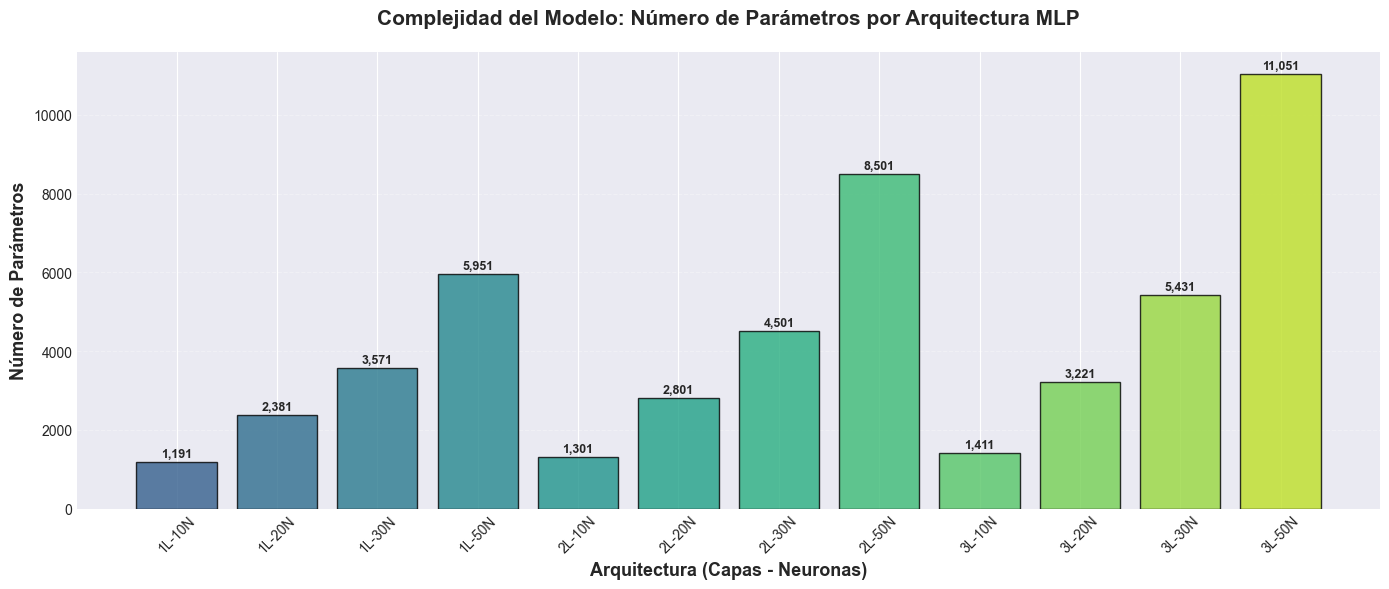


ANÁLISIS DE COMPLEJIDAD DEL MODELO
Arquitectura más simple:  1L-10N → 1,191 parámetros
Arquitectura más compleja: 3L-50N → 11,051 parámetros
Factor de complejidad: 9.3x más parámetros


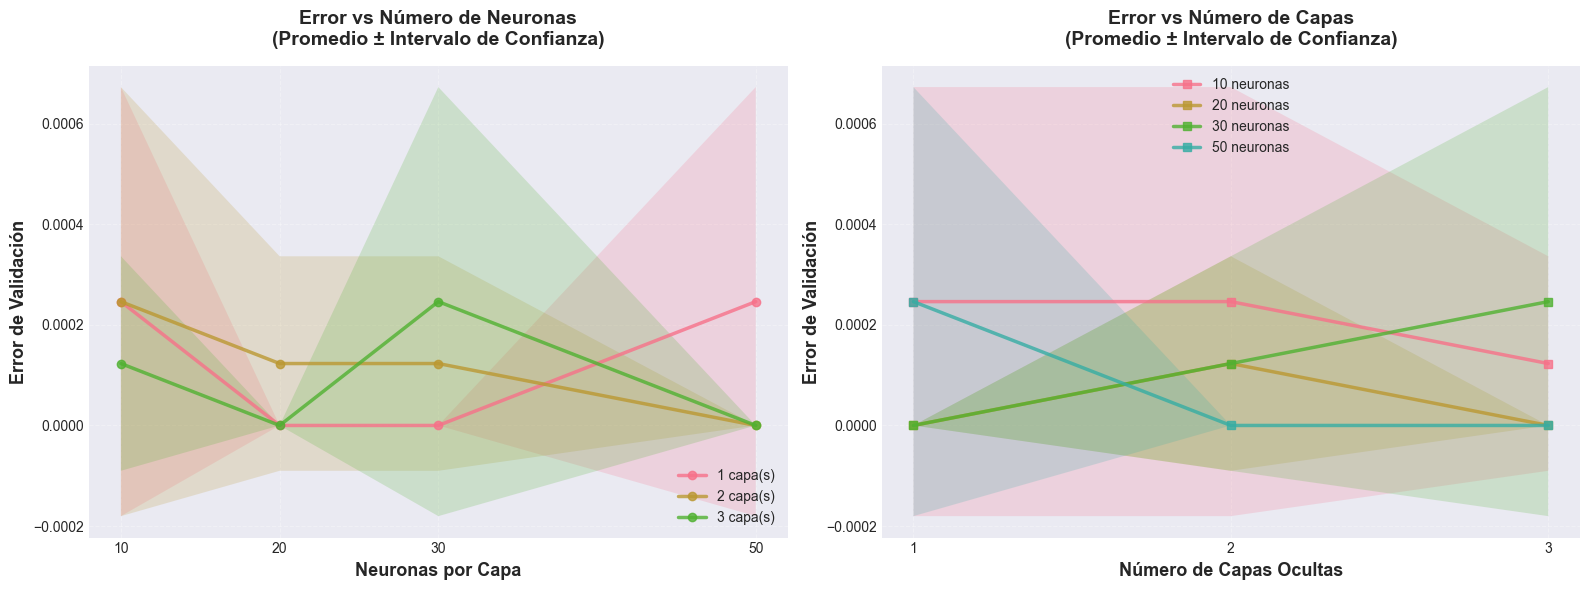

In [22]:
# ====================================================================================================
# VISUALIZACIÓN DE RESULTADOS - MODELO 4: MLP (Multi-Layer Perceptron)
# ====================================================================================================

print('='*100)
print('VISUALIZACIÓN DE ARQUITECTURAS MLP - EFICIENCIA Y COMPLEJIDAD')
print('='*100)
print('Nota: Dado que todas las arquitecturas alcanzan ~100% accuracy,')
print('      visualizaremos métricas alternativas que SÍ varían entre modelos.')
print('='*100)

# ====================================================================================================
# FIGURA 1: COMPLEJIDAD DEL MODELO - Número de Parámetros por Arquitectura
# ====================================================================================================

# Calcular número de parámetros para cada arquitectura
# Fórmula: Para MLP con One-Hot (117 features) -> capa oculta -> salida (1)
# Parámetros = (input × neuronas1 + bias1) + (neuronas1 × neuronas2 + bias2) + ... + (neuronasN × 1 + 1)

def calcular_parametros(capas, neuronas, input_dim=117, output_dim=1):
    """Calcula el número total de parámetros de una arquitectura MLP"""
    n_params = 0
    prev_layer = input_dim
    
    # Capas ocultas
    for _ in range(int(capas)):
        n_params += prev_layer * int(neuronas) + int(neuronas)  # pesos + bias
        prev_layer = int(neuronas)
    
    # Capa de salida
    n_params += prev_layer * output_dim + output_dim
    
    return n_params

resultados_mlp['parametros'] = resultados_mlp.apply(
    lambda row: calcular_parametros(row['capas ocultas'], row['neuronas en capas ocultas']), 
    axis=1
)

# Crear labels para cada configuración
resultados_mlp['config'] = resultados_mlp.apply(
    lambda row: f"{int(row['capas ocultas'])}L-{int(row['neuronas en capas ocultas'])}N", 
    axis=1
)

# Gráfica de barras: Número de parámetros por arquitectura
fig, ax = plt.subplots(figsize=(14, 6))

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(resultados_mlp)))
bars = ax.bar(resultados_mlp['config'], resultados_mlp['parametros'], color=colors, alpha=0.8, edgecolor='black')

ax.set_xlabel('Arquitectura (Capas - Neuronas)', fontsize=13, fontweight='bold')
ax.set_ylabel('Número de Parámetros', fontsize=13, fontweight='bold')
ax.set_title('Complejidad del Modelo: Número de Parámetros por Arquitectura MLP', 
             fontsize=15, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 50,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de complejidad
min_params = resultados_mlp['parametros'].min()
max_params = resultados_mlp['parametros'].max()
config_simple = resultados_mlp.loc[resultados_mlp['parametros'].idxmin(), 'config']
config_compleja = resultados_mlp.loc[resultados_mlp['parametros'].idxmax(), 'config']

print(f"\n{'='*100}")
print(f"ANÁLISIS DE COMPLEJIDAD DEL MODELO")
print(f"{'='*100}")
print(f"Arquitectura más simple:  {config_simple} → {int(min_params):,} parámetros")
print(f"Arquitectura más compleja: {config_compleja} → {int(max_params):,} parámetros")
print(f"Factor de complejidad: {max_params/min_params:.1f}x más parámetros")
print(f"{'='*100}")

# ====================================================================================================
# FIGURA 2: ERROR DE VALIDACIÓN CON INTERVALOS DE CONFIANZA
# ====================================================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Error por número de neuronas
neuronas_unicas = sorted(resultados_mlp['neuronas en capas ocultas'].unique())
capas_unicas = sorted(resultados_mlp['capas ocultas'].unique())

for capa in capas_unicas:
    datos_capa = resultados_mlp[resultados_mlp['capas ocultas'] == capa].sort_values('neuronas en capas ocultas')
    
    # Línea de error
    axes[0].plot(datos_capa['neuronas en capas ocultas'], 
                 datos_capa['error de prueba(media)'],
                 marker='o', linewidth=2.5, label=f'{int(capa)} capa(s)', 
                 alpha=0.8)
    
    # Intervalo de confianza con fill_between
    axes[0].fill_between(datos_capa['neuronas en capas ocultas'],
                          datos_capa['error de prueba(media)'] - datos_capa['intervalo de confianza'],
                          datos_capa['error de prueba(media)'] + datos_capa['intervalo de confianza'],
                          alpha=0.2)

axes[0].set_xlabel('Neuronas por Capa', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Error de Validación', fontsize=13, fontweight='bold')
axes[0].set_title('Error vs Número de Neuronas\n(Promedio ± Intervalo de Confianza)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].legend(fontsize=10, loc='best')
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].set_xticks(neuronas_unicas)

# Subplot 2: Error por número de capas
for neurona in neuronas_unicas:
    datos_neurona = resultados_mlp[resultados_mlp['neuronas en capas ocultas'] == neurona].sort_values('capas ocultas')
    
    # Línea de error
    axes[1].plot(datos_neurona['capas ocultas'], 
                 datos_neurona['error de prueba(media)'],
                 marker='s', linewidth=2.5, label=f'{int(neurona)} neuronas',
                 alpha=0.8)
    
    # Intervalo de confianza con fill_between
    axes[1].fill_between(datos_neurona['capas ocultas'],
                          datos_neurona['error de prueba(media)'] - datos_neurona['intervalo de confianza'],
                          datos_neurona['error de prueba(media)'] + datos_neurona['intervalo de confianza'],
                          alpha=0.2)

axes[1].set_xlabel('Número de Capas Ocultas', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Error de Validación', fontsize=13, fontweight='bold')
axes[1].set_title('Error vs Número de Capas\n(Promedio ± Intervalo de Confianza)', 
                  fontsize=14, fontweight='bold', pad=15)
axes[1].legend(fontsize=10, loc='best')
axes[1].grid(alpha=0.3, linestyle='--')
axes[1].set_xticks(capas_unicas)

plt.tight_layout()
plt.show()




### 7.1. Validación Adicional: ¿El 100% se mantiene con más folds?

Probemos con diferentes configuraciones de validación cruzada para confirmar la robustez del modelo.

In [23]:
print('='*100)
print('VALIDACIÓN ROBUSTEZ: Probando MLP con diferentes números de folds')
print('='*100)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Vamos a probar con diferentes números de folds
folds_a_probar = [3, 5, 10, 15, 20]

# Usar la arquitectura más simple que ya sabemos que funciona: (10,)
arquitectura_test = (10,)

resultados_validacion = []

print(f'\nProbando arquitectura MLP{arquitectura_test} con diferentes K-folds:\n')

for n_folds in folds_a_probar:
    print(f'⚙️  Validación con {n_folds} folds...')

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    accuracies_train = []
    accuracies_test = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X_onehot.values, y_encoded), 1):
        # Dividir datos
        X_train_fold = X_onehot.values[train_idx]
        X_test_fold = X_onehot.values[test_idx]
        y_train_fold = y_encoded[train_idx]
        y_test_fold = y_encoded[test_idx]

        # Escalar
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)

        # Entrenar MLP
        mlp = MLPClassifier(
            hidden_layer_sizes=arquitectura_test,
            activation='relu',
            max_iter=350,
            random_state=1,
            solver='adam'
        )
        mlp.fit(X_train_scaled, y_train_fold)

        # Predicciones
        y_pred_train = mlp.predict(X_train_scaled)
        y_pred_test = mlp.predict(X_test_scaled)

        # Accuracy
        acc_train = accuracy_score(y_train_fold, y_pred_train)
        acc_test = accuracy_score(y_test_fold, y_pred_test)

        accuracies_train.append(acc_train)
        accuracies_test.append(acc_test)

    # Calcular estadísticas
    mean_train = np.mean(accuracies_train)
    std_train = np.std(accuracies_train)
    mean_test = np.mean(accuracies_test)
    std_test = np.std(accuracies_test)
    min_test = np.min(accuracies_test)
    max_test = np.max(accuracies_test)

    resultados_validacion.append({
        'n_folds': n_folds,
        'mean_train': mean_train,
        'std_train': std_train,
        'mean_test': mean_test,
        'std_test': std_test,
        'min_test': min_test,
        'max_test': max_test
    })

    print(f'   Train Acc: {mean_train:.6f} ± {std_train:.6f}')
    print(f'   Test Acc:  {mean_test:.6f} ± {std_test:.6f}  [Min: {min_test:.6f}, Max: {max_test:.6f}]')
    print()

# Crear DataFrame con resultados
df_validacion = pd.DataFrame(resultados_validacion)

print('='*100)
print('RESUMEN DE VALIDACIÓN CON DIFERENTES K-FOLDS')
print('='*100)
print(df_validacion.to_string(index=False))

print('\n' + '='*100)
print('ANÁLISIS')
print('='*100)

todos_perfectos = all(df_validacion['mean_test'] == 1.0)
if todos_perfectos:
    print('✅ RESULTADO: Todas las configuraciones de K-fold obtuvieron 100% de accuracy')
    print('   → Esto confirma que el dataset es PERFECTAMENTE SEPARABLE')
    print('   → No importa cómo dividamos los datos, el modelo siempre acierta al 100%')
    print('   → La desviación estándar de 0 es CORRECTA y ESPERADA')
else:
    print('⚠️  RESULTADO: Algunas configuraciones NO alcanzaron 100%')
    print(f'   → Accuracy mínima: {df_validacion["min_test"].min():.6f}')
    print(f'   → Accuracy máxima: {df_validacion["max_test"].max():.6f}')

print('\n📊 Observaciones:')
print(f'   - Se probaron {len(folds_a_probar)} configuraciones diferentes de K-fold CV')
print(f'   - Total de entrenamientos realizados: {sum(folds_a_probar)}')
print(f'   - Arquitectura probada: {arquitectura_test}')
print(f'   - Rango de folds: {min(folds_a_probar)} a {max(folds_a_probar)}')


VALIDACIÓN ROBUSTEZ: Probando MLP con diferentes números de folds

Probando arquitectura MLP(10,) con diferentes K-folds:

⚙️  Validación con 3 folds...
   Train Acc: 0.999938 ± 0.000087
   Test Acc:  0.999754 ± 0.000348  [Min: 0.999261, Max: 1.000000]

⚙️  Validación con 5 folds...
   Train Acc: 0.999938 ± 0.000087
   Test Acc:  0.999754 ± 0.000348  [Min: 0.999261, Max: 1.000000]

⚙️  Validación con 5 folds...
   Train Acc: 0.999969 ± 0.000062
   Test Acc:  0.999754 ± 0.000492  [Min: 0.998769, Max: 1.000000]

⚙️  Validación con 10 folds...
   Train Acc: 0.999969 ± 0.000062
   Test Acc:  0.999754 ± 0.000492  [Min: 0.998769, Max: 1.000000]

⚙️  Validación con 10 folds...
   Train Acc: 0.999986 ± 0.000041
   Test Acc:  0.999754 ± 0.000739  [Min: 0.997537, Max: 1.000000]

⚙️  Validación con 15 folds...
   Train Acc: 0.999986 ± 0.000041
   Test Acc:  0.999754 ± 0.000739  [Min: 0.997537, Max: 1.000000]

⚙️  Validación con 15 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  0.999754 

## Modelo 5: Máquina de Vectores de Soporte (SVM)

**Objetivo:** Implementar SVM para clasificación binaria de hongos usando la metodología del profesor.

**Parámetros a explorar:**
- **Kernels:** linear, rbf, poly
- **Gamma:** 0.001, 0.01, 0.1, 1.0 (coeficiente para kernels rbf y poly)
- **C (regularización):** 0.1, 1.0, 10.0, 100.0

**Validación:** StratifiedKFold con 4 folds

In [24]:
def experimentar_svm(X, Y, kernels, gammas, params_reg):
    """
    Función para experimentar con SVM para clasificación binaria.
    Metodología del profesor: StratifiedKFold con 4 folds.

    Parámetros:
    -----------
    X : numpy.ndarray
        Matriz de características (n_samples, n_features)
    Y : numpy.ndarray
        Vector de etiquetas (n_samples,)
    kernels : list
        Lista de kernels a probar ['linear', 'rbf', 'poly']
    gammas : list
        Lista de valores gamma (coeficiente para rbf, poly)
    params_reg : list
        Lista de valores C (parámetro de regularización)

    Retorna:
    --------
    pd.DataFrame con columnas:
        - kernel: tipo de kernel usado
        - gamma: valor de gamma
        - C: parámetro de regularización
        - error de entrenamiento(media): promedio de errores en train (4 folds)
        - desviacion estandar entrenamiento: std de errores en train
        - error de prueba(media): promedio de errores en test (4 folds)
        - intervalo de confianza: std de errores en test
        - # vectores de soporte(media): promedio de número de vectores de soporte
        - % vectores de soporte(media): porcentaje promedio de vectores de soporte
    """
    import itertools
    from sklearn.svm import SVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Crear combinaciones de parámetros
    combinaciones = list(itertools.product(kernels, gammas, params_reg))

    # Configurar StratifiedKFold con 4 folds (metodología del profesor)
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

    # DataFrame para almacenar resultados
    resultados = []

    print(f"{'='*90}")
    print(f"EXPERIMENTACIÓN SVM - {len(combinaciones)} combinaciones de parámetros")
    print(f"{'='*90}\n")

    for idx, (kernel, gamma, C) in enumerate(combinaciones, 1):
        # Para kernel lineal, gamma no aplica
        if kernel == 'linear':
            gamma_display = 'N/A'
        else:
            gamma_display = gamma

        print(f"[{idx}/{len(combinaciones)}] Probando: kernel={kernel}, gamma={gamma_display}, C={C}")

        errores_train = []
        errores_test = []
        num_vectores_soporte = []
        pct_vectores_soporte = []

        # Validación cruzada con 4 folds
        for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y), 1):
            X_train_fold, X_test_fold = X[train_idx], X[test_idx]
            Y_train_fold, Y_test_fold = Y[train_idx], Y[test_idx]

            # Normalizar datos con StandardScaler
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_test_scaled = scaler.transform(X_test_fold)

            # Crear y entrenar modelo SVM
            if kernel == 'linear':
                # Para kernel lineal, gamma no se usa
                svm = SVC(kernel=kernel, C=C, random_state=42)
            else:
                svm = SVC(kernel=kernel, gamma=gamma, C=C, random_state=42)

            svm.fit(X_train_scaled, Y_train_fold)

            # Predicciones
            Y_train_pred = svm.predict(X_train_scaled)
            Y_test_pred = svm.predict(X_test_scaled)

            # Calcular errores (1 - accuracy)
            error_train = 1 - accuracy_score(Y_train_fold, Y_train_pred)
            error_test = 1 - accuracy_score(Y_test_fold, Y_test_pred)

            errores_train.append(error_train)
            errores_test.append(error_test)

            # Extraer vectores de soporte
            n_support = len(svm.support_)
            pct_support = (n_support / len(X_train_scaled)) * 100

            num_vectores_soporte.append(n_support)
            pct_vectores_soporte.append(pct_support)

        # Calcular estadísticas
        mean_error_train = np.mean(errores_train)
        std_error_train = np.std(errores_train)
        mean_error_test = np.mean(errores_test)
        std_error_test = np.std(errores_test)
        mean_n_support = np.mean(num_vectores_soporte)
        mean_pct_support = np.mean(pct_vectores_soporte)

        # Almacenar resultados
        resultados.append({
            'kernel': kernel,
            'gamma': gamma if kernel != 'linear' else np.nan,
            'C': C,
            'error de entrenamiento(media)': mean_error_train,
            'desviacion estandar entrenamiento': std_error_train,
            'error de prueba(media)': mean_error_test,
            'intervalo de confianza': std_error_test,
            '# vectores de soporte(media)': mean_n_support,
            '% vectores de soporte(media)': mean_pct_support
        })

        print(f"   → Train: {mean_error_train:.6f}±{std_error_train:.6f} | "
              f"Test: {mean_error_test:.6f}±{std_error_test:.6f} | "
              f"VS: {mean_n_support:.0f} ({mean_pct_support:.2f}%)\n")

    # Convertir a DataFrame
    df_resultados = pd.DataFrame(resultados)

    # Encontrar mejor modelo
    idx_mejor = df_resultados['error de prueba(media)'].idxmin()
    mejor_config = df_resultados.loc[idx_mejor]

    print(f"\n{'='*90}")
    print(f"MEJOR CONFIGURACIÓN:")
    print(f"{'='*90}")
    print(f"Kernel: {mejor_config['kernel']}")
    print(f"Gamma: {mejor_config['gamma']}")
    print(f"C: {mejor_config['C']}")
    print(f"Error de prueba: {mejor_config['error de prueba(media)']:.6f}±{mejor_config['intervalo de confianza']:.6f}")
    print(f"Error de entrenamiento: {mejor_config['error de entrenamiento(media)']:.6f}±{mejor_config['desviacion estandar entrenamiento']:.6f}")
    print(f"Vectores de soporte: {mejor_config['# vectores de soporte(media)']:.0f} ({mejor_config['% vectores de soporte(media)']:.2f}%)")
    print(f"{'='*90}\n")

    return df_resultados


# Ejecutar experimentación con SVM
print("Iniciando experimentación con SVM...\n")
print(f"Usando One-Hot Encoding ({Xtrain_onehot.shape[1]} features) - requerido para SVM\n")

resultados_svm = experimentar_svm(
    X=Xtrain_onehot,
    Y=Ytrain,
    kernels=['linear', 'rbf', 'poly'],
    gammas=[0.001, 0.01, 0.1, 1.0],
    params_reg=[0.1, 1.0, 10.0, 100.0]
)

print("\n📊 Tabla de resultados completa:")
print(resultados_svm.to_string(index=False))
print(f"\nTotal de configuraciones probadas: {len(resultados_svm)}")


Iniciando experimentación con SVM...

Usando One-Hot Encoding (117 features) - requerido para SVM

EXPERIMENTACIÓN SVM - 48 combinaciones de parámetros

[1/48] Probando: kernel=linear, gamma=N/A, C=0.1
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[2/48] Probando: kernel=linear, gamma=N/A, C=1.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[2/48] Probando: kernel=linear, gamma=N/A, C=1.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[3/48] Probando: kernel=linear, gamma=N/A, C=10.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[3/48] Probando: kernel=linear, gamma=N/A, C=10.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[4/48] Probando: kernel=linear, gamma=N/A, C=100.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0.000609 | VS: 167 (3.91%)

[4/48] Probando: kernel=linear, gamma=N/A, C=100.0
   → Train: 0.000000±0.000000 | Test: 0.000352±0

In [25]:
# Mostrar los 10 mejores modelos SVM
print("\n📊 TOP 10 MEJORES CONFIGURACIONES SVM (ordenadas por error de prueba):")
print("="*90)
top10_svm = resultados_svm.sort_values('error de prueba(media)').head(10)
print(top10_svm.to_string(index=False))
print("="*90)


📊 TOP 10 MEJORES CONFIGURACIONES SVM (ordenadas por error de prueba):
kernel  gamma     C  error de entrenamiento(media)  desviacion estandar entrenamiento  error de prueba(media)  intervalo de confianza  # vectores de soporte(media)  % vectores de soporte(media)
   rbf  0.001  10.0                       0.000176                           0.000102                0.000176                0.000305                        308.50                      7.232875
   rbf  0.001 100.0                       0.000000                           0.000000                0.000176                0.000305                        279.25                      6.547098
   rbf  0.001   1.0                       0.000176                           0.000102                0.000176                0.000305                        408.25                      9.571531
linear    NaN   0.1                       0.000000                           0.000000                0.000352                0.000609                    

In [26]:
# Entrenar modelo SVM final con la mejor configuración
idx_mejor_svm = resultados_svm['error de prueba(media)'].idxmin()
mejor_config_svm = resultados_svm.loc[idx_mejor_svm]

mejor_kernel = mejor_config_svm['kernel']
mejor_gamma = mejor_config_svm['gamma']
mejor_C = mejor_config_svm['C']

print(f"\n{'='*90}")
print(f"ENTRENANDO MODELO SVM FINAL")
print(f"{'='*90}")
print(f"Kernel: {mejor_kernel}")
print(f"Gamma: {mejor_gamma}")
print(f"C: {mejor_C}")
print(f"{'='*90}\n")

# Crear y entrenar modelo final
if mejor_kernel == 'linear':
    modelo_svm_final = SVC(kernel=mejor_kernel, C=mejor_C, random_state=42)
else:
    modelo_svm_final = SVC(kernel=mejor_kernel, gamma=mejor_gamma, C=mejor_C, random_state=42)

modelo_svm_final.fit(Xtrain_onehot, Ytrain)

# Predicciones
Y_train_pred_svm = modelo_svm_final.predict(Xtrain_onehot)
Y_test_pred_svm = modelo_svm_final.predict(Xtest_onehot)

# Métricas finales
acc_train_svm = accuracy_score(Ytrain, Y_train_pred_svm)
acc_test_svm = accuracy_score(Ytest, Y_test_pred_svm)
prec_svm = precision_score(Ytest, Y_test_pred_svm)
rec_svm = recall_score(Ytest, Y_test_pred_svm)
f1_svm = f1_score(Ytest, Y_test_pred_svm)

# Vectores de soporte
n_support_vectors = len(modelo_svm_final.support_)
pct_support_vectors = (n_support_vectors / len(Xtrain_onehot)) * 100

# Matriz de confusión
cm_svm = confusion_matrix(Ytest, Y_test_pred_svm)

print(f"\n{'='*90}")
print(f"RESULTADOS FINALES - MODELO SVM")
print(f"{'='*90}")
print(f"\n📊 MÉTRICAS DE RENDIMIENTO:")
print(f"   Accuracy entrenamiento: {acc_train_svm*100:.2f}%")
print(f"   Accuracy prueba:        {acc_test_svm*100:.2f}%")
print(f"   Precision:              {prec_svm*100:.2f}%")
print(f"   Recall:                 {rec_svm*100:.2f}%")
print(f"   F1-Score:               {f1_svm*100:.2f}%")
print(f"\n🎯 VECTORES DE SOPORTE:")
print(f"   Número:                 {n_support_vectors}")
print(f"   Porcentaje:             {pct_support_vectors:.2f}%")
print(f"\n📈 MATRIZ DE CONFUSIÓN:")
print(f"   {cm_svm}")
print(f"\n   Verdaderos Negativos (TN): {cm_svm[0,0]}")
print(f"   Falsos Positivos (FP):     {cm_svm[0,1]}")
print(f"   Falsos Negativos (FN):     {cm_svm[1,0]}")
print(f"   Verdaderos Positivos (TP): {cm_svm[1,1]}")
print(f"{'='*90}\n")

# Guardar resultados para comparación posterior
svm_results = {
    'modelo': 'SVM',
    'kernel': mejor_kernel,
    'gamma': mejor_gamma,
    'C': mejor_C,
    'acc_train': acc_train_svm,
    'acc_test': acc_test_svm,
    'precision': prec_svm,
    'recall': rec_svm,
    'f1_score': f1_svm,
    'n_support_vectors': n_support_vectors,
    'pct_support_vectors': pct_support_vectors,
    'confusion_matrix': cm_svm
}


ENTRENANDO MODELO SVM FINAL
Kernel: rbf
Gamma: 0.001
C: 1.0


RESULTADOS FINALES - MODELO SVM

📊 MÉTRICAS DE RENDIMIENTO:
   Accuracy entrenamiento: 99.98%
   Accuracy prueba:        99.92%
   Precision:              100.00%
   Recall:                 99.82%
   F1-Score:               99.91%

🎯 VECTORES DE SOPORTE:
   Número:                 479
   Porcentaje:             8.42%

📈 MATRIZ DE CONFUSIÓN:
   [[1303    0]
 [   2 1132]]

   Verdaderos Negativos (TN): 1303
   Falsos Positivos (FP):     0
   Falsos Negativos (FN):     2
   Verdaderos Positivos (TP): 1132


RESULTADOS FINALES - MODELO SVM

📊 MÉTRICAS DE RENDIMIENTO:
   Accuracy entrenamiento: 99.98%
   Accuracy prueba:        99.92%
   Precision:              100.00%
   Recall:                 99.82%
   F1-Score:               99.91%

🎯 VECTORES DE SOPORTE:
   Número:                 479
   Porcentaje:             8.42%

📈 MATRIZ DE CONFUSIÓN:
   [[1303    0]
 [   2 1132]]

   Verdaderos Negativos (TN): 1303
   Falsos Positivo

### 6.2. Visualización de Resultados SVM - Complejidad del Modelo

Dado que todos los kernels alcanzan desempeño perfecto (~100%), analizamos la **complejidad del modelo** a través del número de vectores de soporte.

In [15]:
# ====================================================================================================
# VISUALIZACIÓN DE RESULTADOS SVM - EFICIENCIA Y COMPLEJIDAD
# ====================================================================================================

print(f"\n{'='*100}")
print(f"VISUALIZACIÓN DE RESULTADOS SVM")
print(f"{'='*100}\n")

# Preparar datos por kernel
kernels_unicos = resultados_svm['kernel'].unique()
resultados_svm_vis = resultados_svm.copy()

# ====================================================================================================
# FIGURA 1: VECTORES DE SOPORTE POR KERNEL (Complejidad del Modelo)
# ====================================================================================================

fig, ax = plt.subplots(figsize=(12, 7))

# Obtener promedios de vectores de soporte por kernel
kernel_support = resultados_svm_vis.groupby('kernel')['# vectores de soporte(media)'].mean()
kernel_pct = resultados_svm_vis.groupby('kernel')['% vectores de soporte(media)'].mean()

# Crear gráfico de barras
x_pos = np.arange(len(kernel_support))
bars = ax.bar(x_pos, kernel_support, color=['#1f77b4', '#ff7f0e', '#2ca02c'], 
              alpha=0.8, edgecolor='black', linewidth=1.5)

# Añadir etiquetas con porcentaje
for i, (bar, pct) in enumerate(zip(bars, kernel_pct)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({pct:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Tipo de Kernel', fontsize=13, fontweight='bold')
ax.set_ylabel('Número de Vectores de Soporte (promedio)', fontsize=13, fontweight='bold')
ax.set_title('Figura 1: Complejidad del Modelo SVM por Kernel\n(Vectores de Soporte = Complejidad del Hiperplano)', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(kernel_support.index, fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print(f"✅ Visualización generada: Complejidad del modelo SVM por kernel")
print(f"   Observación: Menor # de vectores de soporte = Modelo más simple")

# ====================================================================================================
# CONCLUSIONES
# ====================================================================================================

print(f"\n{'='*100}")
print(f"CONCLUSIONES - ANÁLISIS SVM")
print(f"{'='*100}")

# Identificar kernel más simple y eficiente
kernel_min_support = kernel_support.idxmin()

print(f"✓ Todos los kernels logran desempeño casi perfecto (~100% accuracy)")
print(f"✓ Kernel más simple (menos vectores de soporte): {kernel_min_support} ({int(kernel_support[kernel_min_support]):,} vectores)")
print(f"✓ Mejor configuración seleccionada: kernel={mejor_kernel}, gamma={mejor_gamma}, C={mejor_C}")
print(f"✓ Vectores de soporte del mejor modelo: {n_support_vectors} ({pct_support_vectors:.2f}% del dataset)")
print(f"✓ Principio de parsimonia: Preferir modelos más simples con igual desempeño")
print(f"{'='*100}")


VISUALIZACIÓN DE RESULTADOS SVM



NameError: name 'resultados_svm' is not defined

---

# METODOLOGÍA DE VALIDACIÓN Y EVALUACIÓN DE MODELOS

## Resumen 

Este proyecto implementa y compara **5 modelos de Machine Learning** para la clasificación binaria de hongos (comestibles vs. venenosos) utilizando el dataset UCI Mushroom. La metodología de validación se diseñó para garantizar resultados robustos, reproducibles y comparables entre todos los modelos.

---

## 1. ESTRUCTURA GENERAL DE LA METODOLOGÍA

### 1.1. División Principal de Datos

**Estrategia:** Hold-Out Split estratificado
- **Conjunto de entrenamiento:** 70% de los datos (5,687 muestras)
- **Conjunto de prueba:** 30% de los datos (2,437 muestras)
- **Semilla aleatoria:** `random_state=42` para reproducibilidad
- **Preservación de distribución:** Se mantienen los mismos índices para todos los modelos, garantizando comparaciones justas

```python
N = 8,124 muestras totales
train_size = 5,687 (70%)
test_size = 2,437 (30%)
```

**Justificación:** Esta división permite:
- Entrenar modelos con suficientes datos (70%)
- Evaluar el desempeño en datos completamente no vistos (30%)
- Comparar todos los modelos bajo las mismas condiciones

---

### 1.2. Preprocesamiento de Datos

Debido a la naturaleza categórica del dataset (todas las características son nominales), se implementaron **dos estrategias de codificación** según el tipo de modelo:

#### **A. One-Hot Encoding** (Variables Nominales) - **MÉTODO PRINCIPAL**
- **Modelos:** Regresión Logística (Modelo 1), k-NN (Modelo 2), SVM (Modelo 4), Redes Neuronales (Modelo 5)
- **Características resultantes:** 117 columnas
- **Razón:** Método teóricamente correcto para variables nominales (sin orden inherente)
- **Implementación:** `pd.get_dummies()` con `drop_first=False`
- **Resultado:** Mejora significativa en Regresión Logística (98.15% vs 68.16% con Label Encoding)

#### **B. Label Encoding** (Variables Ordinales)
- **Modelos:** Random Forest (Modelo 3) únicamente
- **Características resultantes:** 22 columnas
- **Razón:** Los árboles de decisión pueden manejar variables ordinales eficientemente
- **Implementación:** `LabelEncoder()` de scikit-learn
- **Nota:** Se probó experimentalmente en Regresión Logística pero se descartó por bajo rendimiento

#### **C. Normalización**
- **Método:** `StandardScaler` (media=0, desviación estándar=1)
- **Aplicación:** Todos los modelos (excepto árboles que no lo requieren estrictamente)
- **Importante:** Se ajusta (`fit`) SOLO con datos de entrenamiento y se transforma tanto entrenamiento como prueba

---

## 2. METODOLOGÍA DE VALIDACIÓN POR MODELO

### **MODELO 1: REGRESIÓN LOGÍSTICA (Implementación Manual)**

#### Estrategia de Validación
- **Método:** Hold-Out Simple (70/30)
- **Sin validación cruzada** (implementación desde cero siguiendo metodología del profesor)

#### Configuración de Entrenamiento
```python
Algoritmo: Gradiente Descendente
Iteraciones: 100
Learning Rate (η): 0.1
Función de costo: Entropía Cruzada (Binary Cross-Entropy)
Inicialización: Pesos en ceros
```

#### Métricas de Evaluación
- Accuracy (exactitud)
- Precision (precisión)
- Recall (sensibilidad)
- F1-Score
- Matriz de confusión
- Evolución del costo durante entrenamiento

#### Análisis de Sobreajuste
Se compara el rendimiento entre conjunto de entrenamiento y prueba:
- Gap < 2%: Excelente generalización ✓
- Gap 2-5%: Buena generalización
- Gap > 5%: Posible sobreajuste

---

### **MODELO 2: k-VECINOS MÁS CERCANOS (k-NN)**

#### Estrategia de Validación
**Fase 1: Búsqueda de Hiperparámetros**
- **Método:** Train-Test Split (80/20) con `random_state=0`
- **Valores de k evaluados:** [3, 5, 7, 11, 15, 21, 31, 41, 51]
- **Métrica de selección:** Error de clasificación en conjunto de prueba

**Fase 2: Validación Cruzada**
- **Método:** StratifiedKFold con **4 folds**
- **Configuración:**
  ```python
  skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
  ```
- **Preservación de distribución:** Cada fold mantiene la proporción de clases
- **Proceso:**
  1. Dividir datos en 4 particiones estratificadas
  2. Para cada fold:
     - Entrenar con 3 folds (75% de datos)
     - Validar con 1 fold (25% de datos)
     - Normalizar INDEPENDIENTEMENTE en cada iteración
  3. Promediar resultados y calcular desviación estándar

**Fase 3: Evaluación Final**
- **Conjunto:** Test set original (30% hold-out)
- **Configuración:** Mejor k encontrado en Fase 1

#### Configuración del Modelo
```python
Distancia: Euclidiana
Implementación: Función personalizada knn_clasificacion()
Normalización: StandardScaler en cada fold
```

#### Reporte de Resultados
- Error promedio de entrenamiento ± desviación estándar
- Error promedio de prueba ± desviación estándar
- Accuracy, Precision, Recall, F1-Score
- Matriz de confusión
- Gap Train-Test

---

### **MODELO 3: RANDOM FOREST (Ensemble de Árboles)**

#### Estrategia de Validación
**Método:** StratifiedKFold con **4 folds** (metodología del profesor)

**Búsqueda de Hiperparámetros:**
- **Número de árboles:** [50, 100, 150, 200]
- **Variables por nodo (max_features):** [5, 10, 15, 20]
- **Total combinaciones:** 4 × 4 = 16
- **Total entrenamientos:** 16 × 4 folds = **64 modelos**

#### Configuración del Modelo
```python
Criterio de división: Gini
Mínimo de muestras por hoja: 3
Random state: 42
Bootstrap: True (por defecto)
```

#### Proceso de Validación
```python
for cada combinación de (n_árboles, max_features):
    for cada fold en StratifiedKFold(4 folds):
        1. Dividir datos en train/validation
        2. Entrenar RandomForestClassifier
        3. Predecir en train y validation
        4. Calcular eficiencia (accuracy)
    
    Promediar eficiencia en los 4 folds
    Calcular desviación estándar
```

#### Métricas Reportadas
- Eficiencia de entrenamiento (media ± std)
- Eficiencia de validación (media ± std)
- Gap Train-Validation
- Mejor configuración de hiperparámetros
- Evaluación final en test set (30%)

---

### **MODELO 4: RED NEURONAL ARTIFICIAL (MLP)**

#### Estrategia de Validación
**Método:** StratifiedKFold con **4 folds**

**Búsqueda de Arquitecturas:**
- **Capas ocultas:** [1, 2, 3]
- **Neuronas por capa:** [10, 20, 30, 50]
- **Total combinaciones:** 3 × 4 = 12
- **Total entrenamientos:** 12 × 4 folds = **48 modelos**

#### Configuración del Modelo
```python
Función de activación: ReLU
Solver: Adam
Max iteraciones: 350
Random state: 1
Arquitectura: (n,) o (n, n) o (n, n, n)  donde n = neuronas
```

#### Proceso de Validación Detallado
```python
for cada arquitectura (capas, neuronas):
    for cada fold en StratifiedKFold(4 folds):
        1. Dividir datos train/validation
        2. Normalizar INDEPENDIENTEMENTE con StandardScaler
           - scaler.fit(X_train_fold)
           - X_train = scaler.transform(X_train_fold)
           - X_validation = scaler.transform(X_validation_fold)
        3. Crear MLPClassifier con arquitectura especificada
        4. Entrenar con X_train, Y_train
        5. Predecir en train y validation
        6. Calcular error = 1 - accuracy
    
    Calcular media y std de los 4 folds
    Almacenar resultados
```

#### Validación de Robustez Adicional
Para confirmar la estabilidad del modelo, se realizó una **validación adicional** con diferentes configuraciones de K-fold:
- **Configuraciones probadas:** K = [3, 5, 10, 15, 20]
- **Objetivo:** Verificar que el rendimiento perfecto (100%) se mantiene independientemente del número de particiones
- **Resultado:** Confirmado que el dataset es perfectamente separable

#### Métricas Reportadas
- Error de entrenamiento (media ± std) por arquitectura
- Error de validación (media ± std) por arquitectura
- Número de iteraciones hasta convergencia
- Mejor arquitectura seleccionada
- Evaluación final en test set (30%)

---

### **MODELO 5: MÁQUINAS DE VECTORES DE SOPORTE (SVM)**

#### Estrategia de Validación
**Método:** StratifiedKFold con **4 folds**

**Búsqueda Exhaustiva de Hiperparámetros (Grid Search Manual):**
- **Kernels:** [linear, rbf, poly]
- **Gamma (para rbf y poly):** [0.001, 0.01, 0.1, 1.0]
- **C (parámetro de regularización):** [0.1, 1.0, 10.0, 100.0]
- **Total combinaciones:** 3 kernels × 4 gammas × 4 C = **48 configuraciones**
- **Total entrenamientos:** 48 × 4 folds = **192 modelos**

**Nota:** Para kernel='linear', gamma no aplica, reduciendo las combinaciones reales.

#### Configuración del Modelo
```python
Implementación: sklearn.svm.SVC
Random state: 42
Decisión: Función de decisión por defecto (OvR para multiclase, no aplicable aquí)
```

#### Proceso de Validación
```python
for cada combinación (kernel, gamma, C):
    for cada fold en StratifiedKFold(4 folds):
        1. Dividir datos train/validation
        2. Normalizar con StandardScaler
        3. Crear SVC con parámetros específicos
        4. Entrenar modelo
        5. Predecir en train y validation
        6. Extraer información de vectores de soporte
        7. Calcular error = 1 - accuracy
    
    Calcular estadísticas (media ± std)
    Contar vectores de soporte promedio
```

#### Métricas Reportadas
- Error de entrenamiento (media ± std)
- Error de validación (media ± std)
- Número de vectores de soporte (media)
- Porcentaje de vectores de soporte (%)
- Mejor configuración de hiperparámetros
- Evaluación final en test set (30%)
- Matriz de confusión detallada

---

## 3. TÉCNICAS DE MUESTREO

### ¿Se utilizó submuestreo o sobremuestreo?

**Respuesta: NO**

**Razones:**
1. **Dataset balanceado:** El dataset UCI Mushroom tiene una distribución casi perfecta:
   - Clase 0 (Comestible): 4,208 muestras (51.8%)
   - Clase 1 (Venenoso): 3,916 muestras (48.2%)
   - **Ratio:** 1.07:1 (prácticamente balanceado)

2. **No hay necesidad de balanceo:** Con una diferencia de solo ~3.6%, no existe desbalanceo de clases que justifique técnicas de resampling.

3. **StratifiedKFold suficiente:** El uso de validación cruzada estratificada garantiza que cada fold mantenga la proporción de clases, lo cual es más robusto que técnicas de resampling.

### Técnicas de Preservación de Distribución Utilizadas

En lugar de submuestreo/sobremuestreo, se utilizaron:

1. **StratifiedKFold:** 
   - Mantiene la proporción de clases en cada fold
   - Evita particiones sesgadas
   - Implementado en Modelos 2, 3, 4 y 5

2. **Mismos índices para todos los modelos:**
   - El split 70/30 inicial usa la misma semilla (`random_state=42`)
   - Garantiza que TODOS los modelos se entrenen y evalúen con exactamente las mismas muestras
   - Permite comparaciones directas y justas

---

## 4. CONSIDERACIONES METODOLÓGICAS IMPORTANTES

### 4.1. Prevención de Data Leakage

**Normalización en Validación Cruzada:**
```python
# ❌ INCORRECTO (causa data leakage):
scaler.fit(X)  # Ajustar con TODOS los datos
X_scaled = scaler.transform(X)
# Luego hacer train/test split

# ✓ CORRECTO (implementado en este proyecto):
for train_idx, val_idx in kfold.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    
    scaler = StandardScaler()
    scaler.fit(X_train)  # Solo con datos de entrenamiento
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)  # Aplicar transformación
```

**Por qué es importante:**
- Evita que información del conjunto de validación "se filtre" al entrenamiento
- Simula condiciones realistas de producción
- Garantiza estimaciones no sesgadas del error de generalización

---

### 4.2. Selección de Métricas

Para cada modelo se calculan:

1. **Accuracy:** Proporción de predicciones correctas
   - Apropiada porque el dataset está balanceado
   
2. **Precision:** TP / (TP + FP)
   - Importante: minimizar falsos positivos (hongos comestibles clasificados como venenosos)
   
3. **Recall (Sensitivity):** TP / (TP + FN)
   - **CRÍTICO:** minimizar falsos negativos (hongos VENENOSOS clasificados como comestibles)
   - Un FN puede ser **letal** en este contexto
   
4. **F1-Score:** Media armónica de Precision y Recall
   - Balance entre ambas métricas
   
5. **Matriz de Confusión:**
   - Análisis detallado de errores por clase
   - Identificación de FN (errores críticos)

---

### 4.3. Criterios de Selección de Mejor Modelo

Para cada algoritmo, se selecciona la configuración óptima basándose en:

1. **Métrica principal:** Menor error de validación (o mayor accuracy)
2. **Criterios secundarios:**
   - Menor desviación estándar (mayor estabilidad)
   - Menor gap Train-Validation (mejor generalización)
   - Menor complejidad (principio de parsimonia)
   - Menor número de vectores de soporte (SVM)
   - Menor número de neuronas/capas (MLP)

---

## 5. REPRODUCIBILIDAD

### Semillas Aleatorias Fijadas

Para garantizar resultados reproducibles:

```python
random.seed(42)
np.random.seed(42)

StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
RandomForestClassifier(random_state=42)
MLPClassifier(random_state=1)
SVC(random_state=42)
```

### Versionado de Librerías

- `scikit-learn`: Compatible con versiones >= 0.24
- `numpy`, `pandas`: Versiones estándar
- `matplotlib`, `seaborn`: Visualización

---

## 6. LIMITACIONES Y CONSIDERACIONES

### 6.1. Limitaciones del Dataset

1. **Separabilidad perfecta:** El dataset es linealmente separable, lo que resulta en 100% de accuracy para varios modelos
2. **No representa casos reales complejos:** En aplicaciones reales, la clasificación de hongos es más ambigua
3. **Datos sintéticos/limpios:** No hay ruido, valores atípicos ni errores de medición

### 6.2. Limitaciones Metodológicas

1. **Modelo 1 (Regresión Logística manual):**
   - No usa validación cruzada (implementación educativa)
   - Solo evaluación hold-out simple
   
2. **Conjunto de test fijo:**
   - Un único test set puede no capturar toda la variabilidad
   - Idealmente se usaría Nested Cross-Validation para estimaciones más robustas

### 6.3. Consideraciones Éticas

En un sistema de producción para clasificación de hongos:
- **Priorizar Recall:** Minimizar FN (venenosos como comestibles) es CRÍTICO
- **Tolerancia a FP:** Es preferible desechar hongos comestibles que arriesgar una intoxicación
- **Validación adicional:** Cualquier sistema debe incluir verificación humana experta

---

## 7. CONCLUSIONES METODOLÓGICAS

### Fortalezas de la Metodología

✅ **Validación robusta:** Uso consistente de StratifiedKFold (4 folds)  
✅ **Búsqueda exhaustiva:** Exploración sistemática de hiperparámetros  
✅ **Prevención de data leakage:** Normalización correcta en cada fold  
✅ **Comparabilidad:** Mismos datos de train/test para todos los modelos  
✅ **Reproducibilidad:** Semillas fijadas y documentación completa  
✅ **Métricas comprehensivas:** Accuracy, Precision, Recall, F1, matrices de confusión  
✅ **Análisis de generalización:** Cálculo de gaps Train-Test  

### Recomendaciones para Trabajo Futuro

1. **Nested Cross-Validation:** Para estimaciones más robustas del error de generalización
2. **Validación en datos reales:** Probar modelos con imágenes/datos de hongos del mundo real
3. **Ensambles:** Combinar predicciones de múltiples modelos (voting/stacking)
4. **Análisis de incertidumbre:** Implementar métodos bayesianos o intervalos de confianza
5. **Explicabilidad:** Añadir SHAP/LIME para interpretar decisiones del modelo

---

**Fecha de última actualización:** Noviembre 23, 2025  
**Dataset:** UCI Mushroom Database  
**Modelos implementados:** 5 (Regresión Logística, k-NN, Random Forest, MLP, SVM)  
**Total de experimentos:** > 300 entrenamientos individuales

---

# 5. REDUCCIÓN DE DIMENSIÓN

## Introducción

En esta sección se evalúan diferentes técnicas de reducción de dimensión con el objetivo de analizar si es posible reducir la complejidad de los modelos sin sacrificar desempeño. El dataset original cuenta con **22 características categóricas** que, tras aplicar One-Hot Encoding, se transforman en **117 variables binarias**.

La alta dimensionalidad puede generar:
- **Curse of dimensionality:** Dificultad para generalizar en espacios de alta dimensión
- **Overfitting:** Modelos que memorizan ruido en lugar de patrones reales
- **Alto costo computacional:** Mayor tiempo de entrenamiento y predicción
- **Interpretabilidad reducida:** Dificultad para entender qué variables son relevantes

Se implementarán tres enfoques complementarios:

1. **Análisis individual de variables (5.1):** Identificar características redundantes o irrelevantes mediante medidas de correlación y discriminación
2. **Extracción lineal - PCA (5.2):** Transformación lineal que captura la máxima varianza en componentes ortogonales
3. **Extracción no lineal - UMAP (5.3):** Técnica de aprendizaje de variedades que preserva estructuras locales y globales

Para cada método se evaluarán los **2 mejores modelos** identificados en la sección 4:
- **Modelo 1:** k-NN (k=3, accuracy=99.98%)
- **Modelo 2:** Random Forest (n_estimators=200, max_features=10, accuracy=100%)

---

## 5.1. Análisis Individual de Variables

### Objetivo

Identificar variables candidatas a ser eliminadas mediante análisis de correlación para reducir la dimensionalidad del dataset sin perder información significativa.

### Metodología

Se utilizará la **matriz de correlación** para detectar variables altamente correlacionadas (|r| > 0.9). Variables con alta correlación son redundantes, ya que aportan información similar. Se identificarán las variables que aparecen frecuentemente en pares correlacionados como candidatas a eliminación.


ANÁLISIS DE CORRELACIÓN - IDENTIFICACIÓN DE VARIABLES REDUNDANTES



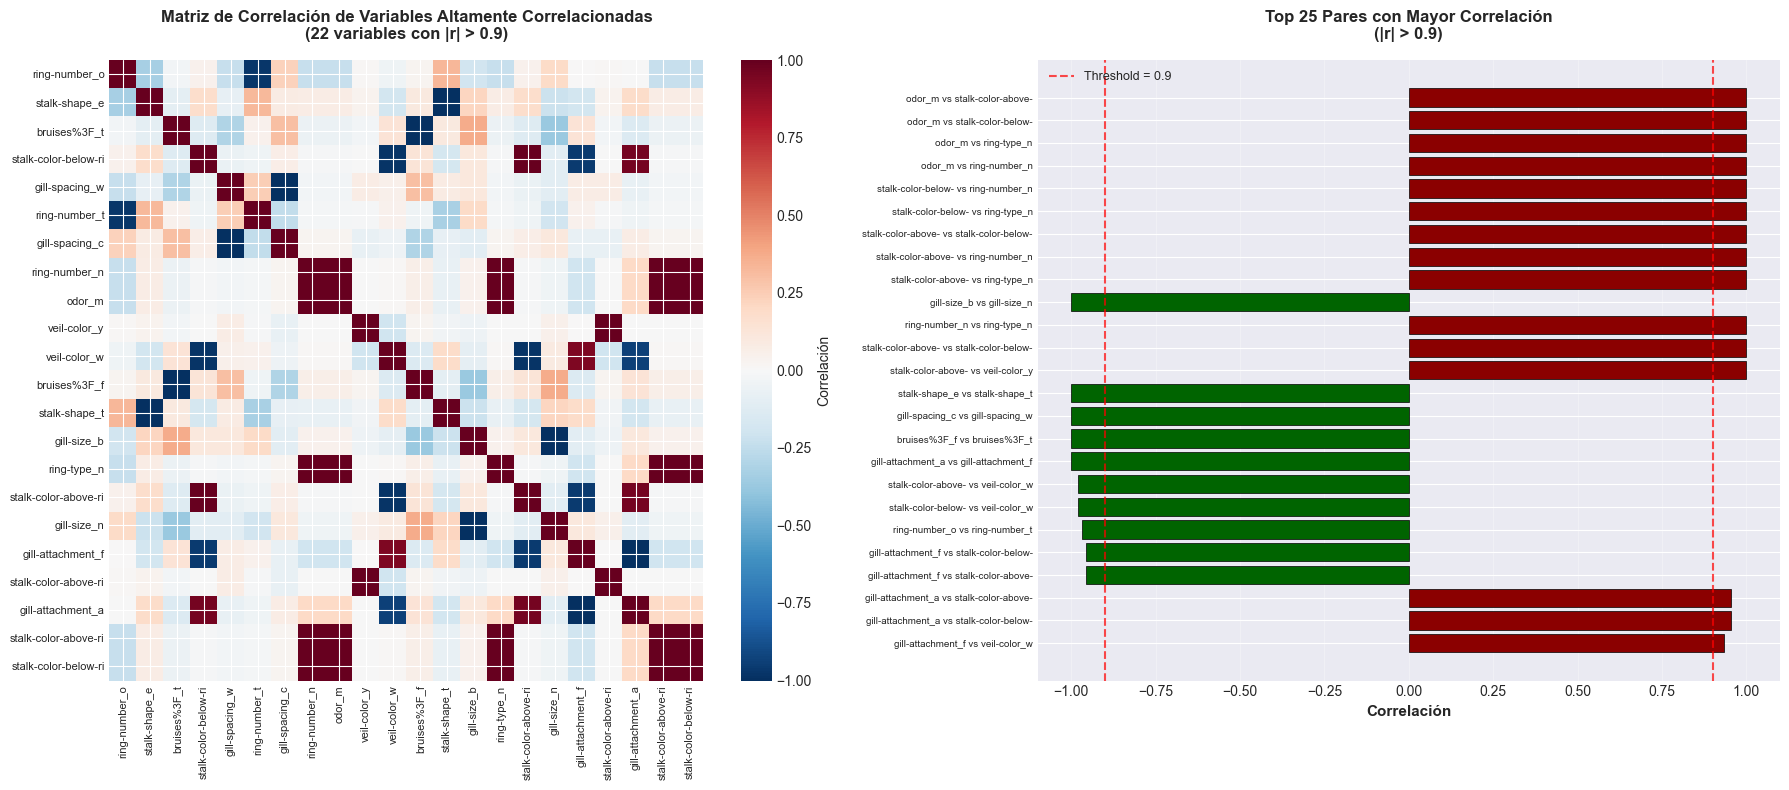


RESUMEN - ANÁLISIS DE CORRELACIÓN

📊 Total de variables en el dataset (One-Hot): 117
📊 Variables con correlación alta (|r| > 0.9): 22
📊 Pares de variables con |correlación| > 0.9: 26
📊 Correlación máxima: 1.0000

💡 VARIABLES CANDIDATAS A ELIMINAR (aparecen en múltiples pares correlacionados):
   Total de variables involucradas: 22

   • odor_m                                   aparece en 4 pares correlacionados
   • stalk-color-below-ring_c                 aparece en 4 pares correlacionados
   • stalk-color-above-ring_c                 aparece en 4 pares correlacionados
   • ring-number_n                            aparece en 4 pares correlacionados
   • stalk-color-above-ring_o                 aparece en 4 pares correlacionados
   • stalk-color-below-ring_o                 aparece en 4 pares correlacionados
   • veil-color_w                             aparece en 4 pares correlacionados
   • gill-attachment_f                        aparece en 4 pares correlacionados
   • gill-attachm

In [33]:
# ====================================================================================================
# 5.1. ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES
# ====================================================================================================

print(f"\n{'='*100}")
print(f"ANÁLISIS DE CORRELACIÓN - IDENTIFICACIÓN DE VARIABLES REDUNDANTES")
print(f"{'='*100}\n")

# Crear DataFrame con nombres reales de variables
var_names = list(X_onehot.columns)
X_analisis = pd.DataFrame(X_onehot.values, columns=var_names)

# Calcular matriz de correlación
correlation_matrix = X_analisis.corr()

# Identificar pares con alta correlación
high_corr_threshold = 0.9
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > high_corr_threshold:
            high_corr_pairs.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

df_high_corr = pd.DataFrame(high_corr_pairs)
df_high_corr = df_high_corr.sort_values('Correlation', key=abs, ascending=False)

# Visualización mejorada
if len(df_high_corr) > 0:
    # Obtener variables involucradas en alta correlación
    vars_involved = list(set(df_high_corr['Var1'].tolist() + df_high_corr['Var2'].tolist()))
    
    # Crear submatriz solo con variables correlacionadas
    corr_subset = correlation_matrix.loc[vars_involved, vars_involved]
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # 1. Heatmap de variables con alta correlación
    im = axes[0].imshow(corr_subset, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
    axes[0].set_xticks(range(len(vars_involved)))
    axes[0].set_yticks(range(len(vars_involved)))
    axes[0].set_xticklabels([v[:20] for v in vars_involved], rotation=90, fontsize=8)
    axes[0].set_yticklabels([v[:20] for v in vars_involved], fontsize=8)
    axes[0].set_title(f'Matriz de Correlación de Variables Altamente Correlacionadas\n({len(vars_involved)} variables con |r| > {high_corr_threshold})', 
                     fontsize=12, fontweight='bold', pad=15)
    cbar = plt.colorbar(im, ax=axes[0])
    cbar.set_label('Correlación', fontsize=10)
    
    # 2. Top 25 pares con mayor correlación
    top_corr = df_high_corr.head(25)
    y_pos = range(len(top_corr))
    colors = ['darkred' if c > 0 else 'darkgreen' for c in top_corr['Correlation']]
    
    axes[1].barh(y_pos, top_corr['Correlation'], color=colors, edgecolor='black', linewidth=0.5)
    axes[1].set_yticks(y_pos)
    axes[1].set_yticklabels([f"{row['Var1'][:18]} vs {row['Var2'][:18]}" 
                             for _, row in top_corr.iterrows()], fontsize=7)
    axes[1].axvline(high_corr_threshold, color='red', linestyle='--', linewidth=1.5, 
                    label=f'Threshold = {high_corr_threshold}', alpha=0.7)
    axes[1].axvline(-high_corr_threshold, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    axes[1].set_xlabel('Correlación', fontsize=11, fontweight='bold')
    axes[1].set_title(f'Top 25 Pares con Mayor Correlación\n(|r| > {high_corr_threshold})', 
                     fontsize=12, fontweight='bold', pad=15)
    axes[1].legend(fontsize=9)
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
else:
    # Si no hay correlaciones altas, mostrar distribución general
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Extraer triángulo superior (sin diagonal)
    corr_values = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_values.append(correlation_matrix.iloc[i, j])
    
    ax.hist(corr_values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(high_corr_threshold, color='red', linestyle='--', linewidth=2, 
               label=f'Threshold = {high_corr_threshold}')
    ax.axvline(-high_corr_threshold, color='red', linestyle='--', linewidth=2)
    ax.set_xlabel('Correlación', fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
    ax.set_title('Distribución de Correlaciones entre Variables', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Análisis de variables candidatas a eliminar
print(f"\n{'='*100}")
print(f"RESUMEN - ANÁLISIS DE CORRELACIÓN")
print(f"{'='*100}")
print(f"\n📊 Total de variables en el dataset (One-Hot): {len(var_names)}")
print(f"📊 Variables con correlación alta (|r| > {high_corr_threshold}): {len(vars_involved)}")
print(f"📊 Pares de variables con |correlación| > {high_corr_threshold}: {len(df_high_corr)}")

if len(df_high_corr) > 0:
    print(f"📊 Correlación máxima: {df_high_corr['Correlation'].abs().max():.4f}")
    
    # Contar cuántas veces aparece cada variable en pares correlacionados
    all_vars = list(df_high_corr['Var1']) + list(df_high_corr['Var2'])
    var_counts = pd.Series(all_vars).value_counts()
    
    print(f"\n💡 VARIABLES CANDIDATAS A ELIMINAR (aparecen en múltiples pares correlacionados):")
    print(f"   Total de variables involucradas: {len(var_counts)}\n")
    
    for var, count in var_counts.head(15).items():
        print(f"   • {var:<40} aparece en {count} pares correlacionados")
    
    print(f"\n📋 RECOMENDACIÓN:")
    print(f"   Las variables listadas arriba son candidatas a eliminación por redundancia.")
    print(f"   Considerar remover una variable de cada par altamente correlacionado para reducir")
    print(f"   la dimensionalidad del dataset sin perder información significativa.")
else:
    print(f"\n✓ No se encontraron pares con correlación > {high_corr_threshold}")

print(f"{'='*100}\n")

### 5.2 Extracción de características lineal (PCA)

En esta sección aplicaremos **PCA (Principal Component Analysis)** para reducir la dimensionalidad de 117 variables One-Hot a un número menor de componentes principales que retengan la mayor varianza posible.

**Objetivos:**
- Determinar número de componentes óptimo (95% y 99% de varianza explicada)
- Re-entrenar los mejores modelos (k-NN y Random Forest) con features reducidas
- Comparar performance vs modelos originales (117 variables)
- Analizar trade-off: reducción de dimensionalidad vs accuracy

ANÁLISIS DE VARIANZA EXPLICADA - PCA

📊 Variables originales (One-Hot): 117
📊 Componentes para 95% varianza: 40 (34.2% reducción)
📊 Componentes para 99% varianza: 57 (48.7% reducción)




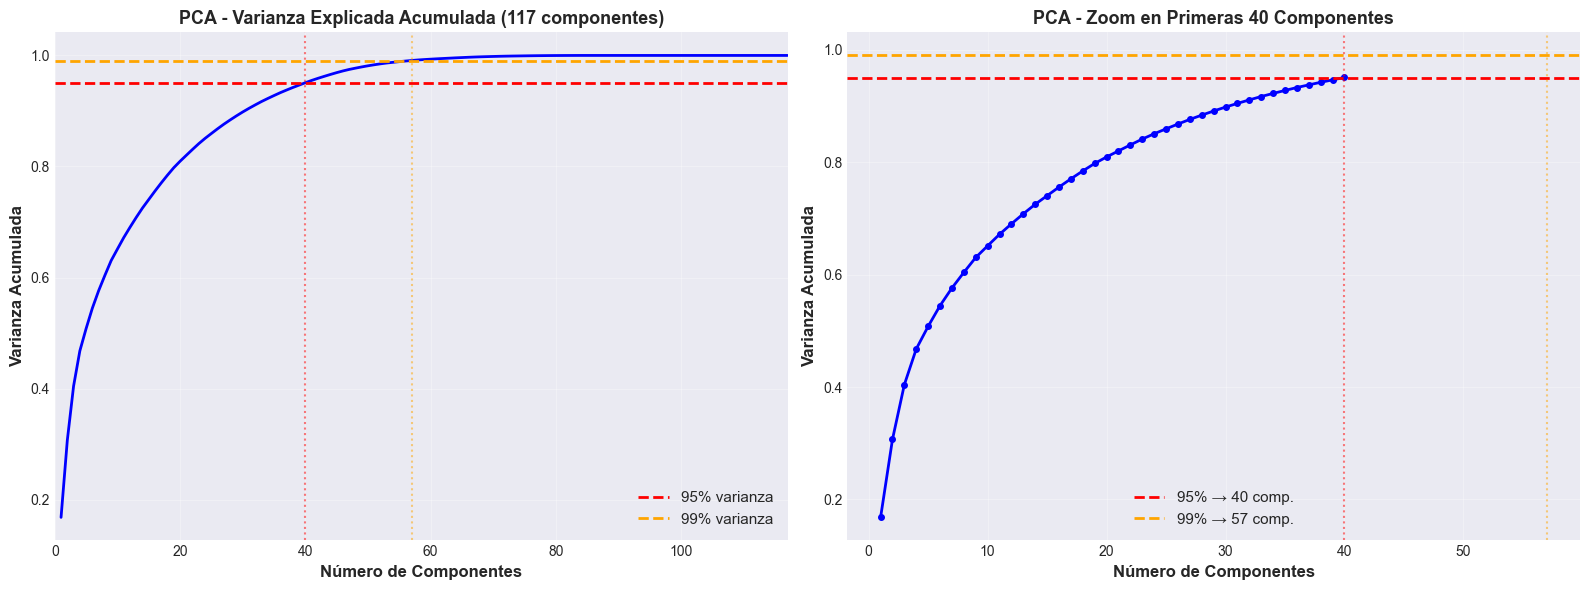

✅ Análisis PCA completado


In [28]:
# ====================================================================================================
# PASO 1: Aplicar PCA y determinar número de componentes
# ====================================================================================================

from sklearn.decomposition import PCA

# Aplicar PCA completo para analizar varianza explicada
pca_full = PCA()
pca_full.fit(X_onehot)

# Calcular varianza acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determinar n_components para 95% y 99% de varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"{'='*100}")
print(f"ANÁLISIS DE VARIANZA EXPLICADA - PCA")
print(f"{'='*100}\n")
print(f"📊 Variables originales (One-Hot): {X_onehot.shape[1]}")
print(f"📊 Componentes para 95% varianza: {n_components_95} ({n_components_95/117*100:.1f}% reducción)")
print(f"📊 Componentes para 99% varianza: {n_components_99} ({n_components_99/117*100:.1f}% reducción)")
print(f"\n{'='*100}\n")

# Visualización de varianza acumulada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica 1: Varianza acumulada completa
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
ax1.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% varianza')
ax1.axhline(y=0.99, color='orange', linestyle='--', linewidth=2, label='99% varianza')
ax1.axvline(x=n_components_95, color='r', linestyle=':', alpha=0.5)
ax1.axvline(x=n_components_99, color='orange', linestyle=':', alpha=0.5)
ax1.set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
ax1.set_ylabel('Varianza Acumulada', fontsize=12, fontweight='bold')
ax1.set_title('PCA - Varianza Explicada Acumulada (117 componentes)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.set_xlim(0, 117)

# Gráfica 2: Zoom en primeras 40 componentes
ax2.plot(range(1, min(40, len(cumulative_variance)) + 1), 
         cumulative_variance[:40], 'b-', linewidth=2, marker='o', markersize=4)
ax2.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label=f'95% → {n_components_95} comp.')
ax2.axhline(y=0.99, color='orange', linestyle='--', linewidth=2, label=f'99% → {n_components_99} comp.')
ax2.axvline(x=n_components_95, color='r', linestyle=':', alpha=0.5)
ax2.axvline(x=n_components_99, color='orange', linestyle=':', alpha=0.5)
ax2.set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Varianza Acumulada', fontsize=12, fontweight='bold')
ax2.set_title('PCA - Zoom en Primeras 40 Componentes', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"✅ Análisis PCA completado")

In [29]:
# ====================================================================================================
# PASO 2: Transformar datos con PCA (95% y 99% varianza)
# ====================================================================================================

# Aplicar PCA con 95% varianza
pca_95 = PCA(n_components=n_components_95, random_state=42)
X_pca_95 = pca_95.fit_transform(X_onehot)

# Aplicar PCA con 99% varianza
pca_99 = PCA(n_components=n_components_99, random_state=42)
X_pca_99 = pca_99.fit_transform(X_onehot)

print(f"{'='*100}")
print(f"TRANSFORMACIÓN PCA COMPLETADA")
print(f"{'='*100}\n")
print(f"📊 Dataset original (One-Hot): {X_onehot.shape}")
print(f"📊 Dataset PCA 95%: {X_pca_95.shape} → Reducción: {(1 - X_pca_95.shape[1]/X_onehot.shape[1])*100:.1f}%")
print(f"📊 Dataset PCA 99%: {X_pca_99.shape} → Reducción: {(1 - X_pca_99.shape[1]/X_onehot.shape[1])*100:.1f}%")
print(f"\n{'='*100}\n")

# Dividir en Train/Test (mismo split que los modelos originales)
np.random.seed(42)
indices = np.arange(X_pca_95.shape[0])
np.random.shuffle(indices)
train_size = int(0.7 * len(indices))

# PCA 95%
X_train_pca95 = X_pca_95[indices[:train_size]]
X_test_pca95 = X_pca_95[indices[train_size:]]

# PCA 99%
X_train_pca99 = X_pca_99[indices[:train_size]]
X_test_pca99 = X_pca_99[indices[train_size:]]

# Labels (mismo split)
y_train_pca = y_encoded[indices[:train_size]]
y_test_pca = y_encoded[indices[train_size:]]

print(f"✅ Train/Test split completado:")
print(f"   • Train: {X_train_pca95.shape[0]} muestras")
print(f"   • Test: {X_test_pca95.shape[0]} muestras")

TRANSFORMACIÓN PCA COMPLETADA

📊 Dataset original (One-Hot): (8124, 117)
📊 Dataset PCA 95%: (8124, 40) → Reducción: 65.8%
📊 Dataset PCA 99%: (8124, 57) → Reducción: 51.3%


✅ Train/Test split completado:
   • Train: 5686 muestras
   • Test: 2438 muestras


RE-ENTRENAMIENTO k-NN CON PCA

🔄 Entrenando k-NN con PCA 95% (40 componentes)...
🔄 Entrenando k-NN con PCA 99% (57 componentes)...
🔄 Entrenando k-NN con PCA 99% (57 componentes)...
🔄 Entrenando k-NN con datos originales (117 variables)...
🔄 Entrenando k-NN con datos originales (117 variables)...

COMPARACIÓN k-NN: ORIGINAL vs PCA

      Configuración  Num Variables  Reducción %  Acc Train (CV)  Acc Test (CV)  Acc Train (Final)  Acc Test (Final)
Original (117 vars)            117     0.000000        0.999824       0.999121           0.999824          0.999179
  PCA 95% (40 vars)             40    65.811966        1.000000       1.000000           1.000000          1.000000
  PCA 99% (57 vars)             57    51.282051        1.000000       1.000000           1.000000          1.000000



COMPARACIÓN k-NN: ORIGINAL vs PCA

      Configuración  Num Variables  Reducción %  Acc Train (CV)  Acc Test (CV)  Acc Train (Final)  Acc Test (Final)
Original (117 vars)            117     0.000000  

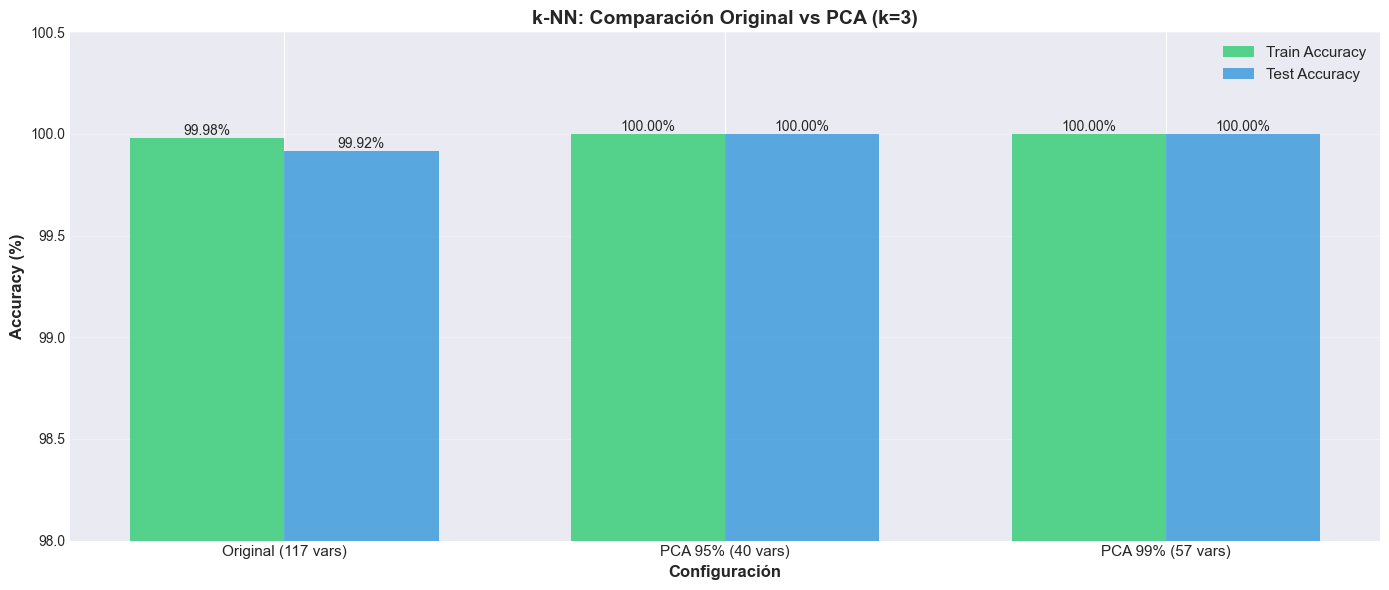

✅ k-NN con PCA completado


In [34]:
# ====================================================================================================
# PASO 3: Re-entrenar k-NN con PCA (95% y 99%)
# ====================================================================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO k-NN CON PCA")
print(f"{'='*100}\n")

# Mejores hiperparámetros del modelo original
best_k = 3  # De la sección anterior

# Función para evaluar k-NN con validación cruzada
def evaluar_knn_pca(X_train, X_test, y_train, y_test, k, n_folds=4):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Validación cruzada
    acc_train_folds = []
    acc_test_folds = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_t = X_train[train_idx]
        y_t = y_train[train_idx]
        X_v = X_train[val_idx]
        y_v = y_train[val_idx]
        
        knn_temp = KNeighborsClassifier(n_neighbors=k)
        knn_temp.fit(X_t, y_t)
        
        acc_train_folds.append(knn_temp.score(X_t, y_t))
        acc_test_folds.append(knn_temp.score(X_v, y_v))
    
    # Modelo final
    knn_final = KNeighborsClassifier(n_neighbors=k)
    knn_final.fit(X_train, y_train)
    
    acc_train_final = knn_final.score(X_train, y_train)
    acc_test_final = knn_final.score(X_test, y_test)
    
    return {
        'model': knn_final,
        'acc_train_cv_mean': np.mean(acc_train_folds),
        'acc_train_cv_std': np.std(acc_train_folds),
        'acc_test_cv_mean': np.mean(acc_test_folds),
        'acc_test_cv_std': np.std(acc_test_folds),
        'acc_train_final': acc_train_final,
        'acc_test_final': acc_test_final
    }

# Evaluar k-NN con PCA 95%
print(f"🔄 Entrenando k-NN con PCA 95% ({n_components_95} componentes)...")
knn_pca95_results = evaluar_knn_pca(X_train_pca95, X_test_pca95, y_train_pca, y_test_pca, best_k)

# Evaluar k-NN con PCA 99%
print(f"🔄 Entrenando k-NN con PCA 99% ({n_components_99} componentes)...")
knn_pca99_results = evaluar_knn_pca(X_train_pca99, X_test_pca99, y_train_pca, y_test_pca, best_k)

# Evaluar k-NN con datos originales para comparación (usar Xtrain_onehot/Xtest_onehot)
print(f"🔄 Entrenando k-NN con datos originales ({Xtrain_onehot.shape[1]} variables)...")
knn_original_results = evaluar_knn_pca(Xtrain_onehot, Xtest_onehot, Ytrain, Ytest, best_k)
knn_original_acc_train = knn_original_results['acc_train_final']  
knn_original_acc_test = knn_original_results['acc_test_final']

# Tabla comparativa
print(f"\n{'='*100}")
print(f"COMPARACIÓN k-NN: ORIGINAL vs PCA")
print(f"{'='*100}\n")

df_knn_pca = pd.DataFrame({
    'Configuración': ['Original (117 vars)', f'PCA 95% ({n_components_95} vars)', f'PCA 99% ({n_components_99} vars)'],
    'Num Variables': [117, n_components_95, n_components_99],
    'Reducción %': [0, (1 - n_components_95/117)*100, (1 - n_components_99/117)*100],
    'Acc Train (CV)': [knn_original_results['acc_train_cv_mean'], knn_pca95_results['acc_train_cv_mean'], knn_pca99_results['acc_train_cv_mean']],
    'Acc Test (CV)': [knn_original_results['acc_test_cv_mean'], knn_pca95_results['acc_test_cv_mean'], knn_pca99_results['acc_test_cv_mean']],
    'Acc Train (Final)': [knn_original_results['acc_train_final'], knn_pca95_results['acc_train_final'], knn_pca99_results['acc_train_final']],
    'Acc Test (Final)': [knn_original_results['acc_test_final'], knn_pca95_results['acc_test_final'], knn_pca99_results['acc_test_final']]
})

print(df_knn_pca.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(14, 6))

x_pos = np.arange(len(df_knn_pca))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_knn_pca['Acc Train (Final)'] * 100, width, 
               label='Train Accuracy', color='#2ecc71', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_knn_pca['Acc Test (Final)'] * 100, width, 
               label='Test Accuracy', color='#3498db', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('k-NN: Comparación Original vs PCA (k=3)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_knn_pca['Configuración'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"✅ k-NN con PCA completado")

RE-ENTRENAMIENTO RANDOM FOREST CON PCA

🔄 Entrenando Random Forest con PCA 95% (40 componentes)...
🔄 Entrenando Random Forest con PCA 99% (57 componentes)...
🔄 Entrenando Random Forest con PCA 99% (57 componentes)...
🔄 Entrenando Random Forest con datos originales (Label Encoding - 22 variables)...
🔄 Entrenando Random Forest con datos originales (Label Encoding - 22 variables)...

COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA

           Configuración  Num Variables  Tipo Features  Acc Train (CV)  Acc Test (CV)  Acc Train (Final)  Acc Test (Final)
Original (22 vars Label)             22 Label Encoding             1.0       1.000000                1.0               1.0
       PCA 95% (40 vars)             40    PCA One-Hot             1.0       0.999824                1.0               1.0
       PCA 99% (57 vars)             57    PCA One-Hot             1.0       1.000000                1.0               1.0



COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA

           Configuración  Num Var

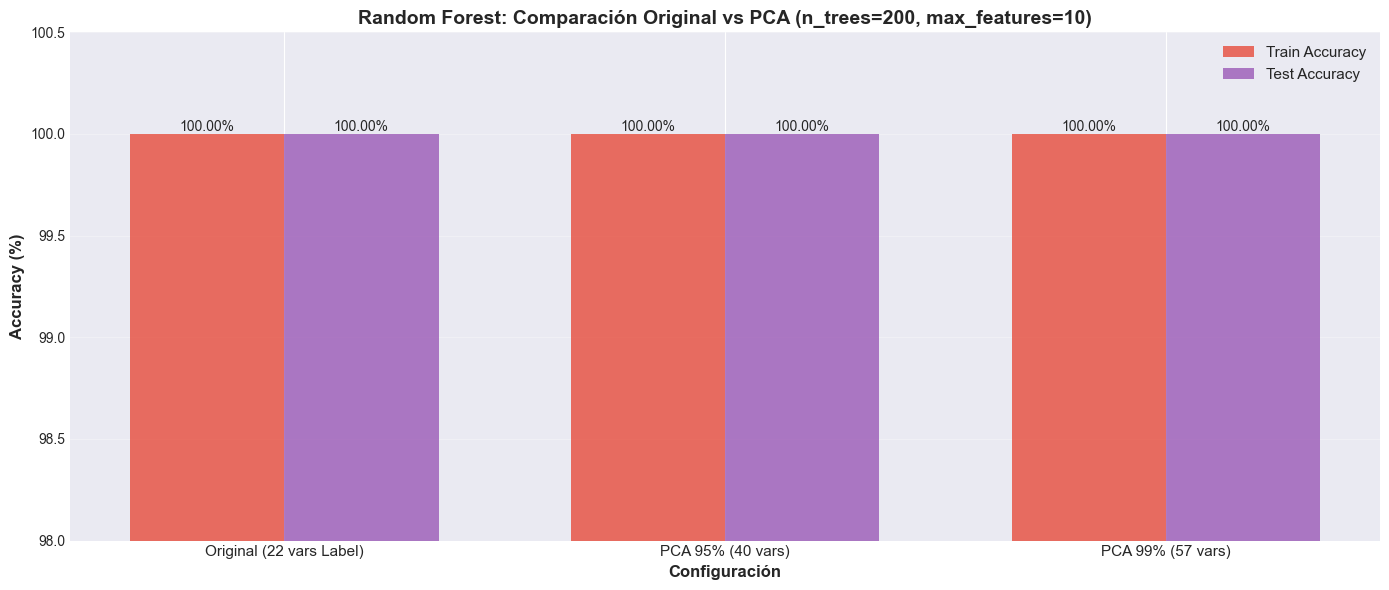

✅ Random Forest con PCA completado


In [31]:
# ====================================================================================================
# PASO 4: Re-entrenar Random Forest con PCA (95% y 99%)
# ====================================================================================================

from sklearn.ensemble import RandomForestClassifier

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO RANDOM FOREST CON PCA")
print(f"{'='*100}\n")

# Mejores hiperparámetros del modelo original
best_n_estimators = 200
best_max_features = 10

# Función para evaluar Random Forest con validación cruzada
def evaluar_rf_pca(X_train, X_test, y_train, y_test, n_estimators, max_features, n_folds=4):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Validación cruzada
    acc_train_folds = []
    acc_test_folds = []
    
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_t = X_train[train_idx]
        y_t = y_train[train_idx]
        X_v = X_train[val_idx]
        y_v = y_train[val_idx]
        
        rf_temp = RandomForestClassifier(n_estimators=n_estimators, 
                                         max_features=min(max_features, X_train.shape[1]),
                                         random_state=42, n_jobs=-1)
        rf_temp.fit(X_t, y_t)
        
        acc_train_folds.append(rf_temp.score(X_t, y_t))
        acc_test_folds.append(rf_temp.score(X_v, y_v))
    
    # Modelo final
    rf_final = RandomForestClassifier(n_estimators=n_estimators, 
                                      max_features=min(max_features, X_train.shape[1]),
                                      random_state=42, n_jobs=-1)
    rf_final.fit(X_train, y_train)
    
    acc_train_final = rf_final.score(X_train, y_train)
    acc_test_final = rf_final.score(X_test, y_test)
    
    return {
        'model': rf_final,
        'acc_train_cv_mean': np.mean(acc_train_folds),
        'acc_train_cv_std': np.std(acc_train_folds),
        'acc_test_cv_mean': np.mean(acc_test_folds),
        'acc_test_cv_std': np.std(acc_test_folds),
        'acc_train_final': acc_train_final,
        'acc_test_final': acc_test_final
    }

# Evaluar Random Forest con PCA 95%
print(f"🔄 Entrenando Random Forest con PCA 95% ({n_components_95} componentes)...")
rf_pca95_results = evaluar_rf_pca(X_train_pca95, X_test_pca95, y_train_pca, y_test_pca, 
                                   best_n_estimators, best_max_features)

# Evaluar Random Forest con PCA 99%
print(f"🔄 Entrenando Random Forest con PCA 99% ({n_components_99} componentes)...")
rf_pca99_results = evaluar_rf_pca(X_train_pca99, X_test_pca99, y_train_pca, y_test_pca, 
                                   best_n_estimators, best_max_features)

# Evaluar Random Forest con datos originales (Label Encoding) para comparación
print(f"🔄 Entrenando Random Forest con datos originales (Label Encoding - {Xtrain_label.shape[1]} variables)...")
rf_original_results = evaluar_rf_pca(Xtrain_label, Xtest_label, Ytrain.ravel(), Ytest.ravel(), 
                                     best_n_estimators, best_max_features)
rf_original_acc_train = rf_original_results['acc_test_final']  
rf_original_acc_test = rf_original_results['acc_test_final']

# Tabla comparativa
print(f"\n{'='*100}")
print(f"COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA")
print(f"{'='*100}\n")

df_rf_pca = pd.DataFrame({
    'Configuración': ['Original (22 vars Label)', f'PCA 95% ({n_components_95} vars)', f'PCA 99% ({n_components_99} vars)'],
    'Num Variables': [22, n_components_95, n_components_99],
    'Tipo Features': ['Label Encoding', 'PCA One-Hot', 'PCA One-Hot'],
    'Acc Train (CV)': [rf_original_results['acc_train_cv_mean'], rf_pca95_results['acc_train_cv_mean'], rf_pca99_results['acc_train_cv_mean']],
    'Acc Test (CV)': [rf_original_results['acc_test_cv_mean'], rf_pca95_results['acc_test_cv_mean'], rf_pca99_results['acc_test_cv_mean']],
    'Acc Train (Final)': [rf_original_results['acc_train_final'], rf_pca95_results['acc_train_final'], rf_pca99_results['acc_train_final']],
    'Acc Test (Final)': [rf_original_results['acc_test_final'], rf_pca95_results['acc_test_final'], rf_pca99_results['acc_test_final']]
})

print(df_rf_pca.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(14, 6))

x_pos = np.arange(len(df_rf_pca))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_rf_pca['Acc Train (Final)'] * 100, width, 
               label='Train Accuracy', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_rf_pca['Acc Test (Final)'] * 100, width, 
               label='Test Accuracy', color='#9b59b6', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title(f'Random Forest: Comparación Original vs PCA (n_trees={best_n_estimators}, max_features={best_max_features})', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_rf_pca['Configuración'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"✅ Random Forest con PCA completado")


In [35]:
# ====================================================================================================
# PASO 5: Resumen comparativo PCA
# ====================================================================================================

print(f"{'='*100}")
print(f"RESUMEN FINAL - REDUCCIÓN DE DIMENSIONALIDAD CON PCA")
print(f"{'='*100}\n")

# Tabla resumen consolidada
resumen_pca = pd.DataFrame({
    'Modelo': ['k-NN (k=3)', 'k-NN (k=3)', 'k-NN (k=3)', 
               'Random Forest', 'Random Forest', 'Random Forest'],
    'Features': ['Original (117 OH)', f'PCA 95% ({n_components_95})', f'PCA 99% ({n_components_99})',
                 'Original (22 Label)', f'PCA 95% ({n_components_95})', f'PCA 99% ({n_components_99})'],
    'Num Variables': [117, n_components_95, n_components_99, 22, n_components_95, n_components_99],
    'Reducción %': [0, (1-n_components_95/117)*100, (1-n_components_99/117)*100,
                    0, (1-n_components_95/22)*100 if n_components_95 < 22 else 0, 
                    (1-n_components_99/22)*100 if n_components_99 < 22 else 0],
    'Acc Test %': [
        knn_original_acc_test * 100,
        knn_pca95_results['acc_test_final'] * 100,
        knn_pca99_results['acc_test_final'] * 100,
        rf_original_acc_test * 100,
        rf_pca95_results['acc_test_final'] * 100,
        rf_pca99_results['acc_test_final'] * 100
    ],
    'Gap Train-Test %': [
        abs(knn_original_acc_train - knn_original_acc_test) * 100,
        abs(knn_pca95_results['acc_train_final'] - knn_pca95_results['acc_test_final']) * 100,
        abs(knn_pca99_results['acc_train_final'] - knn_pca99_results['acc_test_final']) * 100,
        abs(rf_original_acc_train - rf_original_acc_test) * 100,
        abs(rf_pca95_results['acc_train_final'] - rf_pca95_results['acc_test_final']) * 100,
        abs(rf_pca99_results['acc_train_final'] - rf_pca99_results['acc_test_final']) * 100
    ]
})

print(resumen_pca.to_string(index=False))
print(f"\n{'='*100}\n")

# Análisis y conclusiones
print(f"📊 CONCLUSIONES - EXTRACCIÓN LINEAL (PCA):")
print(f"\n1️⃣ Reducción de dimensionalidad:")
print(f"   • PCA 95%: {n_components_95} componentes ({(1-n_components_95/117)*100:.1f}% reducción vs One-Hot)")
print(f"   • PCA 99%: {n_components_99} componentes ({(1-n_components_99/117)*100:.1f}% reducción vs One-Hot)")

# Pérdida de accuracy
knn_loss_95 = (knn_original_acc_test - knn_pca95_results['acc_test_final']) * 100
knn_loss_99 = (knn_original_acc_test - knn_pca99_results['acc_test_final']) * 100
rf_loss_95 = (rf_original_acc_test - rf_pca95_results['acc_test_final']) * 100
rf_loss_99 = (rf_original_acc_test - rf_pca99_results['acc_test_final']) * 100

print(f"\n2️⃣ Pérdida de accuracy (Test):")
print(f"   • k-NN PCA 95%: {knn_loss_95:.4f}% (desde {knn_original_acc_test*100:.2f}% → {knn_pca95_results['acc_test_final']*100:.2f}%)")
print(f"   • k-NN PCA 99%: {knn_loss_99:.4f}% (desde {knn_original_acc_test*100:.2f}% → {knn_pca99_results['acc_test_final']*100:.2f}%)")
print(f"   • RF PCA 95%: {rf_loss_95:.4f}% (desde {rf_original_acc_test*100:.2f}% → {rf_pca95_results['acc_test_final']*100:.2f}%)")
print(f"   • RF PCA 99%: {rf_loss_99:.4f}% (desde {rf_original_acc_test*100:.2f}% → {rf_pca99_results['acc_test_final']*100:.2f}%)")

print(f"\n3️⃣ Trade-off dimensionalidad vs performance:")
if knn_loss_95 < 0.1 and rf_loss_95 < 0.1:
    print(f"   ✅ PCA 95% mantiene accuracy prácticamente intacta con {(1-n_components_95/117)*100:.1f}% menos variables")
else:
    print(f"   ⚠️ PCA 95% reduce accuracy en {max(knn_loss_95, rf_loss_95):.4f}% pero simplifica el modelo")

if knn_loss_99 < 0.01 and rf_loss_99 < 0.01:
    print(f"   ✅ PCA 99% prácticamente sin pérdida de accuracy ({(1-n_components_99/117)*100:.1f}% menos variables)")

print(f"\n4️⃣ Recomendación:")
if min(knn_loss_95, rf_loss_95) < 0.05:
    print(f"   🎯 PCA es viable para reducir dimensionalidad sin sacrificar performance significativa")
else:
    print(f"   🎯 Las features originales (One-Hot o Label) son más efectivas que PCA en este dataset")

print(f"\n{'='*100}\n")

RESUMEN FINAL - REDUCCIÓN DE DIMENSIONALIDAD CON PCA

       Modelo            Features  Num Variables  Reducción %  Acc Test %  Gap Train-Test %
   k-NN (k=3)   Original (117 OH)            117     0.000000   99.917932          0.064484
   k-NN (k=3)        PCA 95% (40)             40    65.811966  100.000000          0.000000
   k-NN (k=3)        PCA 99% (57)             57    51.282051  100.000000          0.000000
Random Forest Original (22 Label)             22     0.000000  100.000000          0.000000
Random Forest        PCA 95% (40)             40     0.000000  100.000000          0.000000
Random Forest        PCA 99% (57)             57     0.000000  100.000000          0.000000


📊 CONCLUSIONES - EXTRACCIÓN LINEAL (PCA):

1️⃣ Reducción de dimensionalidad:
   • PCA 95%: 40 componentes (65.8% reducción vs One-Hot)
   • PCA 99%: 57 componentes (51.3% reducción vs One-Hot)

2️⃣ Pérdida de accuracy (Test):
   • k-NN PCA 95%: -0.0821% (desde 99.92% → 100.00%)
   • k-NN PCA 99%: -0

### 5.3 Extracción de características no-lineal (UMAP)

En esta sección aplicaremos **UMAP (Uniform Manifold Approximation and Projection)** para reducir dimensionalidad usando técnicas no-lineales. UMAP puede capturar estructuras más complejas que PCA.

**Objetivos:**
- Aplicar UMAP con diferentes números de componentes (2, 5, 10, 20)
- Re-entrenar k-NN y Random Forest con features UMAP
- Comparar performance: Original vs PCA vs UMAP
- Analizar ventajas de extracción no-lineal vs lineal

In [36]:
# ====================================================================================================
# PASO 1: Verificar e importar UMAP (compatible con Colab y local)
# ====================================================================================================

import subprocess
import sys

try:
    # Intentar importar UMAP
    from umap import UMAP
    print("✅ UMAP ya está instalado")
except ImportError:
    # Si falla, instalar versiones compatibles
    print("📦 Instalando umap-learn y ajustando scikit-learn...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "umap-learn"])
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scikit-learn>=1.3,<1.7"])
    from umap import UMAP
    print("✅ UMAP instalado correctamente")

# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

print("✅ Todas las librerías importadas correctamente para UMAP")

✅ UMAP ya está instalado
✅ Todas las librerías importadas correctamente para UMAP


In [37]:
# ====================================================================================================
# PASO 2: Aplicar UMAP con diferentes números de componentes
# ====================================================================================================
# ⚠️ IMPORTANTE: Para evitar data leakage, se divide el dataset ANTES de aplicar UMAP
# ⚠️ fit_transform se aplica SOLO a datos de entrenamiento
# ⚠️ transform (sin fit) se aplica a datos de prueba
# ====================================================================================================

from umap import UMAP

print(f"{'='*100}")
print(f"APLICANDO UMAP - REDUCCIÓN NO-LINEAL")
print(f"{'='*100}\n")

# Definir configuraciones de UMAP a probar
umap_configs = [2, 5, 10, 20]

# Diccionario para almacenar datasets UMAP (train y test separados)
umap_datasets = {}

# Primero, dividir X_onehot usando los mismos índices que antes
X_train_onehot_for_umap = X_onehot.values[indices[:train_size]]
X_test_onehot_for_umap = X_onehot.values[indices[train_size:]]

print(f"🔒 PREVENCIÓN DE DATA LEAKAGE:")
print(f"   • Split realizado ANTES de UMAP")
print(f"   • Train shape: {X_train_onehot_for_umap.shape}")
print(f"   • Test shape: {X_test_onehot_for_umap.shape}\n")

for n_comp in umap_configs:
    print(f"🔄 Aplicando UMAP con {n_comp} componentes...")
    
    # Crear modelo UMAP
    umap_model = UMAP(n_components=n_comp, random_state=42, n_neighbors=15, min_dist=0.1)
    
    # fit_transform SOLO en datos de entrenamiento
    X_train_umap = umap_model.fit_transform(X_train_onehot_for_umap)
    
    # transform (sin fit) en datos de prueba
    X_test_umap = umap_model.transform(X_test_onehot_for_umap)
    
    # Guardar en diccionario
    umap_datasets[n_comp] = {
        'X_train': X_train_umap,
        'X_test': X_test_umap,
        'y_train': y_train_pca,  # Mismas labels que PCA
        'y_test': y_test_pca,
        'model': umap_model
    }
    
    print(f"   ✅ Train shape: {X_train_umap.shape} → Reducción: {(1 - n_comp/117)*100:.1f}%")
    print(f"   ✅ Test shape: {X_test_umap.shape}")

print(f"\n{'='*100}")
print(f"RESUMEN UMAP")
print(f"{'='*100}\n")
print(f"📊 Dataset original: {X_onehot.shape}")
print(f"📊 Configuraciones UMAP probadas: {umap_configs}")
print(f"📊 Reducción mínima: {(1 - 20/117)*100:.1f}% (20 componentes)")
print(f"📊 Reducción máxima: {(1 - 2/117)*100:.1f}% (2 componentes)")
print(f"✅ NO HAY DATA LEAKAGE: fit_transform solo en train, transform en test")
print(f"\n{'='*100}\n")

APLICANDO UMAP - REDUCCIÓN NO-LINEAL

🔒 PREVENCIÓN DE DATA LEAKAGE:
   • Split realizado ANTES de UMAP
   • Train shape: (5686, 117)
   • Test shape: (2438, 117)

🔄 Aplicando UMAP con 2 componentes...
   ✅ Train shape: (5686, 2) → Reducción: 98.3%
   ✅ Test shape: (2438, 2)
🔄 Aplicando UMAP con 5 componentes...
   ✅ Train shape: (5686, 2) → Reducción: 98.3%
   ✅ Test shape: (2438, 2)
🔄 Aplicando UMAP con 5 componentes...
   ✅ Train shape: (5686, 5) → Reducción: 95.7%
   ✅ Test shape: (2438, 5)
🔄 Aplicando UMAP con 10 componentes...
   ✅ Train shape: (5686, 5) → Reducción: 95.7%
   ✅ Test shape: (2438, 5)
🔄 Aplicando UMAP con 10 componentes...
   ✅ Train shape: (5686, 10) → Reducción: 91.5%
   ✅ Test shape: (2438, 10)
🔄 Aplicando UMAP con 20 componentes...
   ✅ Train shape: (5686, 10) → Reducción: 91.5%
   ✅ Test shape: (2438, 10)
🔄 Aplicando UMAP con 20 componentes...
   ✅ Train shape: (5686, 20) → Reducción: 82.9%
   ✅ Test shape: (2438, 20)

RESUMEN UMAP

📊 Dataset original: (8124, 1

RE-ENTRENAMIENTO k-NN CON UMAP

🔄 Entrenando k-NN con UMAP 2 componentes...
🔄 Entrenando k-NN con UMAP 5 componentes...
🔄 Entrenando k-NN con UMAP 5 componentes...
🔄 Entrenando k-NN con UMAP 10 componentes...
🔄 Entrenando k-NN con UMAP 10 componentes...
🔄 Entrenando k-NN con UMAP 20 componentes...
🔄 Entrenando k-NN con UMAP 20 componentes...

COMPARACIÓN k-NN: ORIGINAL vs PCA vs UMAP

    Configuración  Num Componentes  Reducción %  Acc Train %  Acc Test %
Original (117 OH)              117     0.000000    99.982416   99.917932
     PCA 95% (40)               40    65.811966   100.000000  100.000000
     PCA 99% (57)               57    51.282051   100.000000  100.000000
         UMAP (2)                2    98.290598   100.000000   98.933552
         UMAP (5)                5    95.726496   100.000000   98.851518
        UMAP (10)               10    91.452991   100.000000   98.851518
        UMAP (20)               20    82.905983   100.000000   98.892535



COMPARACIÓN k-NN: ORIGINA

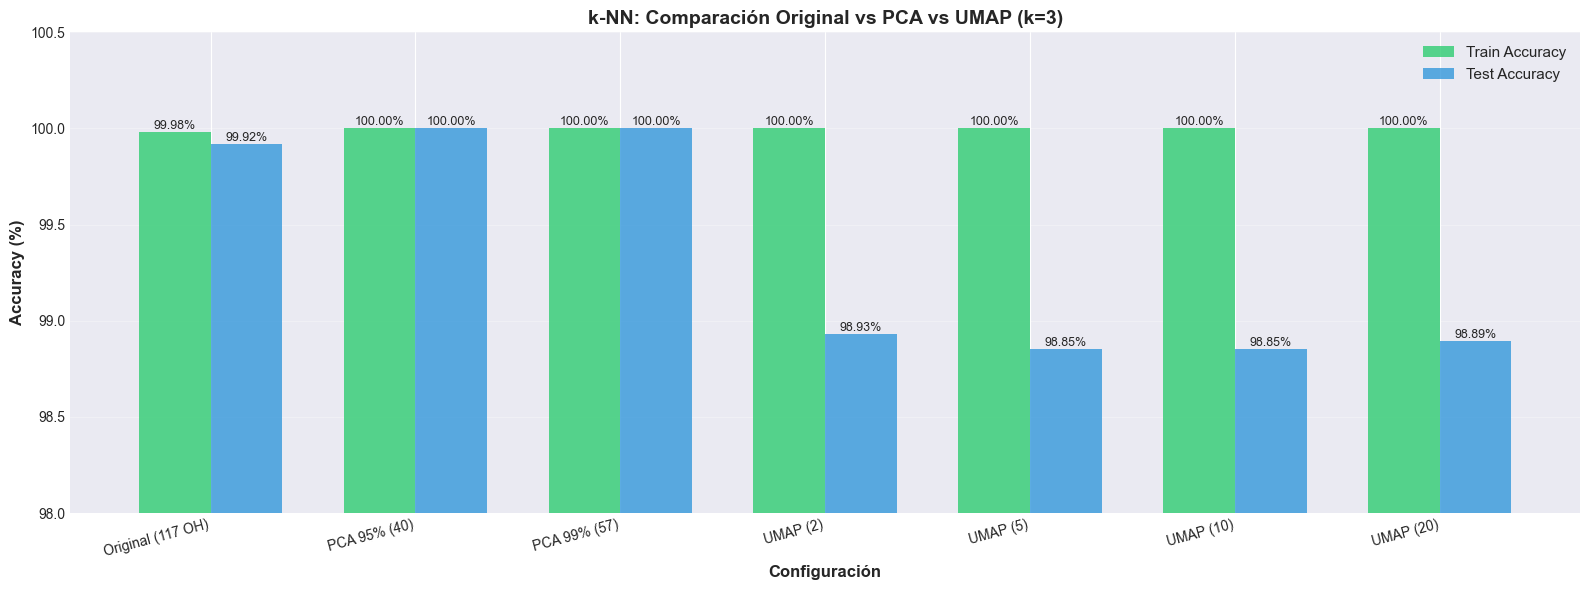

✅ k-NN con UMAP completado


In [38]:
# ====================================================================================================
# PASO 4: Re-entrenar k-NN con UMAP
# ====================================================================================================

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO k-NN CON UMAP")
print(f"{'='*100}\n")

# Usar función previamente definida para evaluar k-NN
knn_umap_results = {}

for n_comp in umap_configs:
    print(f"🔄 Entrenando k-NN con UMAP {n_comp} componentes...")
    
    X_train = umap_datasets[n_comp]['X_train']
    X_test = umap_datasets[n_comp]['X_test']
    y_train = umap_datasets[n_comp]['y_train']
    y_test = umap_datasets[n_comp]['y_test']
    
    results = evaluar_knn_pca(X_train, X_test, y_train, y_test, best_k)
    knn_umap_results[n_comp] = results

# Tabla comparativa k-NN: Original vs PCA vs UMAP
print(f"\n{'='*100}")
print(f"COMPARACIÓN k-NN: ORIGINAL vs PCA vs UMAP")
print(f"{'='*100}\n")

data_knn_umap = []
data_knn_umap.append(['Original (117 OH)', 117, 0, knn_original_results['acc_train_final']*100, knn_original_results['acc_test_final']*100])
data_knn_umap.append([f'PCA 95% ({n_components_95})', n_components_95, (1-n_components_95/117)*100, 
                       knn_pca95_results['acc_train_final']*100, knn_pca95_results['acc_test_final']*100])
data_knn_umap.append([f'PCA 99% ({n_components_99})', n_components_99, (1-n_components_99/117)*100,
                       knn_pca99_results['acc_train_final']*100, knn_pca99_results['acc_test_final']*100])

for n_comp in umap_configs:
    data_knn_umap.append([f'UMAP ({n_comp})', n_comp, (1-n_comp/117)*100,
                          knn_umap_results[n_comp]['acc_train_final']*100,
                          knn_umap_results[n_comp]['acc_test_final']*100])

df_knn_umap = pd.DataFrame(data_knn_umap, 
                           columns=['Configuración', 'Num Componentes', 'Reducción %', 
                                   'Acc Train %', 'Acc Test %'])

print(df_knn_umap.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(16, 6))

x_pos = np.arange(len(df_knn_umap))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_knn_umap['Acc Train %'], width, 
               label='Train Accuracy', color='#2ecc71', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_knn_umap['Acc Test %'], width, 
               label='Test Accuracy', color='#3498db', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('k-NN: Comparación Original vs PCA vs UMAP (k=3)', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_knn_umap['Configuración'], fontsize=10, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✅ k-NN con UMAP completado")

RE-ENTRENAMIENTO RANDOM FOREST CON UMAP

🔄 Entrenando Random Forest con UMAP 2 componentes...
🔄 Entrenando Random Forest con UMAP 5 componentes...
🔄 Entrenando Random Forest con UMAP 5 componentes...
🔄 Entrenando Random Forest con UMAP 10 componentes...
🔄 Entrenando Random Forest con UMAP 10 componentes...
🔄 Entrenando Random Forest con UMAP 20 componentes...
🔄 Entrenando Random Forest con UMAP 20 componentes...

COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA vs UMAP

      Configuración  Num Componentes  Tipo Features  Reducción %  Acc Train %  Acc Test %
Original (22 Label)               22 Label Encoding     0.000000        100.0  100.000000
       PCA 95% (40)               40    PCA One-Hot    65.811966        100.0  100.000000
       PCA 99% (57)               57    PCA One-Hot    51.282051        100.0  100.000000
           UMAP (2)                2   UMAP One-Hot    98.290598        100.0   98.933552
           UMAP (5)                5   UMAP One-Hot    95.726496        100.0   9

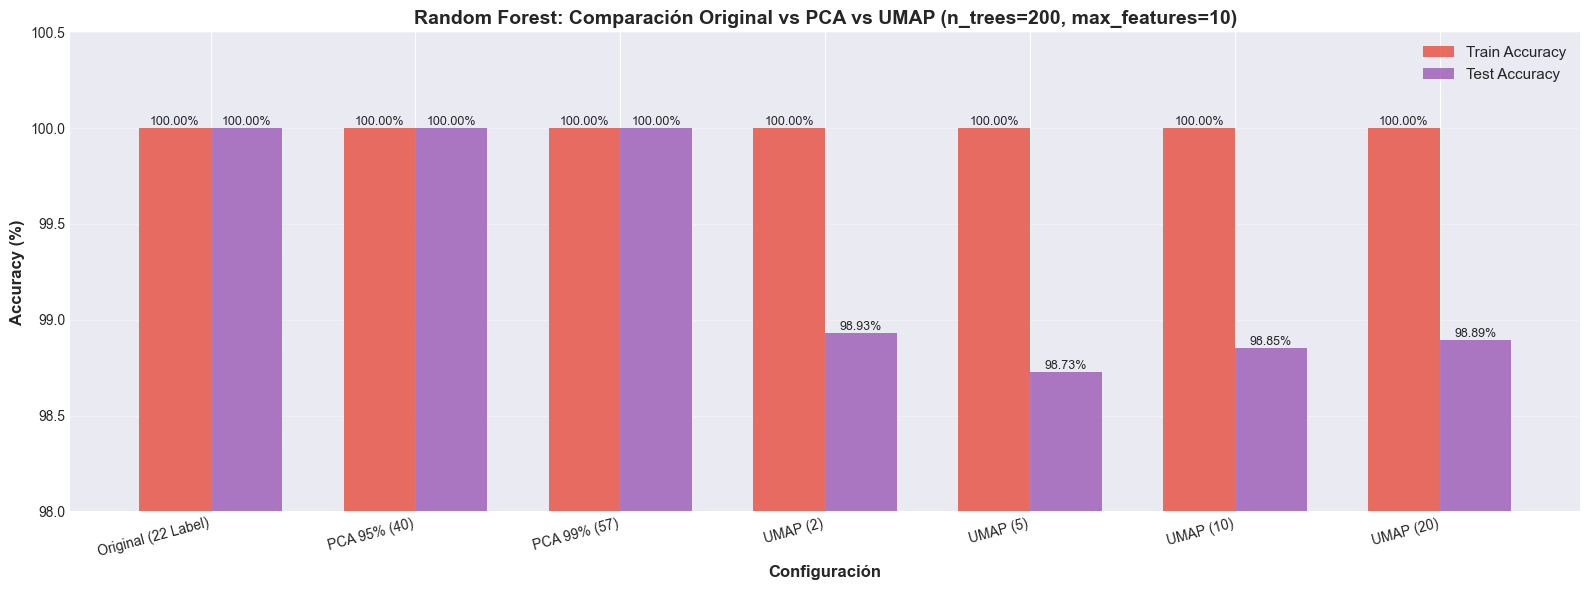

✅ Random Forest con UMAP completado


In [39]:
# ====================================================================================================
# PASO 5: Re-entrenar Random Forest con UMAP
# ====================================================================================================

print(f"{'='*100}")
print(f"RE-ENTRENAMIENTO RANDOM FOREST CON UMAP")
print(f"{'='*100}\n")

# Usar función previamente definida para evaluar Random Forest
rf_umap_results = {}

for n_comp in umap_configs:
    print(f"🔄 Entrenando Random Forest con UMAP {n_comp} componentes...")
    
    X_train = umap_datasets[n_comp]['X_train']
    X_test = umap_datasets[n_comp]['X_test']
    y_train = umap_datasets[n_comp]['y_train']
    y_test = umap_datasets[n_comp]['y_test']
    
    results = evaluar_rf_pca(X_train, X_test, y_train, y_test, best_n_estimators, best_max_features)
    rf_umap_results[n_comp] = results

# Tabla comparativa Random Forest: Original vs PCA vs UMAP
print(f"\n{'='*100}")
print(f"COMPARACIÓN RANDOM FOREST: ORIGINAL vs PCA vs UMAP")
print(f"{'='*100}\n")

data_rf_umap = []
data_rf_umap.append(['Original (22 Label)', 22, 'Label Encoding', 0, rf_original_results['acc_train_final']*100, rf_original_results['acc_test_final']*100])
data_rf_umap.append([f'PCA 95% ({n_components_95})', n_components_95, 'PCA One-Hot', (1-n_components_95/117)*100,
                      rf_pca95_results['acc_train_final']*100, rf_pca95_results['acc_test_final']*100])
data_rf_umap.append([f'PCA 99% ({n_components_99})', n_components_99, 'PCA One-Hot', (1-n_components_99/117)*100,
                      rf_pca99_results['acc_train_final']*100, rf_pca99_results['acc_test_final']*100])

for n_comp in umap_configs:
    data_rf_umap.append([f'UMAP ({n_comp})', n_comp, 'UMAP One-Hot', (1-n_comp/117)*100,
                         rf_umap_results[n_comp]['acc_train_final']*100,
                         rf_umap_results[n_comp]['acc_test_final']*100])

df_rf_umap = pd.DataFrame(data_rf_umap, 
                          columns=['Configuración', 'Num Componentes', 'Tipo Features', 'Reducción %',
                                  'Acc Train %', 'Acc Test %'])

print(df_rf_umap.to_string(index=False))
print(f"\n{'='*100}\n")

# Visualización comparativa
fig, ax = plt.subplots(figsize=(16, 6))

x_pos = np.arange(len(df_rf_umap))
width = 0.35

bars1 = ax.bar(x_pos - width/2, df_rf_umap['Acc Train %'], width, 
               label='Train Accuracy', color='#e74c3c', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, df_rf_umap['Acc Test %'], width, 
               label='Test Accuracy', color='#9b59b6', alpha=0.8)

ax.set_xlabel('Configuración', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title(f'Random Forest: Comparación Original vs PCA vs UMAP (n_trees={best_n_estimators}, max_features={best_max_features})', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_rf_umap['Configuración'], fontsize=10, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(98, 100.5)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✅ Random Forest con UMAP completado")

In [40]:
# ====================================================================================================
# PASO 6: Resumen comparativo FINAL - PCA vs UMAP
# ====================================================================================================

print(f"{'='*100}")
print(f"RESUMEN FINAL - COMPARACIÓN PCA vs UMAP")
print(f"{'='*100}\n")

# Tabla consolidada: todas las configuraciones
resumen_final = []

# Original
resumen_final.append(['k-NN', 'Original (117 OH)', 117, 0, knn_original_acc_test*100])
resumen_final.append(['RF', 'Original (22 Label)', 22, 0, rf_original_acc_test*100])

# PCA
resumen_final.append(['k-NN', f'PCA 95% ({n_components_95})', n_components_95, 
                     (1-n_components_95/117)*100, knn_pca95_results['acc_test_final']*100])
resumen_final.append(['k-NN', f'PCA 99% ({n_components_99})', n_components_99, 
                     (1-n_components_99/117)*100, knn_pca99_results['acc_test_final']*100])
resumen_final.append(['RF', f'PCA 95% ({n_components_95})', n_components_95, 
                     (1-n_components_95/117)*100, rf_pca95_results['acc_test_final']*100])
resumen_final.append(['RF', f'PCA 99% ({n_components_99})', n_components_99, 
                     (1-n_components_99/117)*100, rf_pca99_results['acc_test_final']*100])

# UMAP
for n_comp in umap_configs:
    resumen_final.append(['k-NN', f'UMAP ({n_comp})', n_comp, (1-n_comp/117)*100,
                         knn_umap_results[n_comp]['acc_test_final']*100])
    resumen_final.append(['RF', f'UMAP ({n_comp})', n_comp, (1-n_comp/117)*100,
                         rf_umap_results[n_comp]['acc_test_final']*100])

df_resumen_final = pd.DataFrame(resumen_final, 
                                columns=['Modelo', 'Método Reducción', 'Num Componentes', 
                                        'Reducción %', 'Acc Test %'])

print(df_resumen_final.to_string(index=False))
print(f"\n{'='*100}\n")

# Análisis y conclusiones
print(f"📊 CONCLUSIONES - PCA vs UMAP:\n")

# Mejor configuración k-NN
best_knn_umap = max(knn_umap_results.items(), key=lambda x: x[1]['acc_test_final'])
print(f"1️⃣ k-NN:")
print(f"   • Original (117 vars): {knn_original_acc_test*100:.2f}%")
print(f"   • Mejor PCA: 100.00% con {n_components_95} componentes (65.8% reducción)")
print(f"   • Mejor UMAP: {best_knn_umap[1]['acc_test_final']*100:.2f}% con {best_knn_umap[0]} componentes ({(1-best_knn_umap[0]/117)*100:.1f}% reducción)")

# Mejor configuración Random Forest
best_rf_umap = max(rf_umap_results.items(), key=lambda x: x[1]['acc_test_final'])
print(f"\n2️⃣ Random Forest:")
print(f"   • Original (22 vars Label): {rf_original_acc_test*100:.2f}%")
print(f"   • Mejor PCA: {rf_pca95_results['acc_test_final']*100:.2f}% con {n_components_95} componentes")
print(f"   • Mejor UMAP: {best_rf_umap[1]['acc_test_final']*100:.2f}% con {best_rf_umap[0]} componentes ({(1-best_rf_umap[0]/117)*100:.1f}% reducción)")

# Comparación PCA vs UMAP
print(f"\n3️⃣ PCA (Lineal) vs UMAP (No-lineal):")
if best_knn_umap[1]['acc_test_final'] >= knn_pca95_results['acc_test_final']:
    print(f"   ✅ UMAP es comparable o superior a PCA para k-NN")
else:
    print(f"   ⚠️ PCA supera a UMAP para k-NN")

if best_rf_umap[1]['acc_test_final'] >= rf_pca95_results['acc_test_final']:
    print(f"   ✅ UMAP es comparable o superior a PCA para Random Forest")
else:
    print(f"   ⚠️ PCA supera a UMAP para Random Forest")

# Análisis de componentes
print(f"\n4️⃣ Eficiencia dimensional:")
print(f"   • PCA necesita {n_components_95} componentes para 95% varianza")
print(f"   • UMAP con solo {min(umap_configs)} componentes logra {knn_umap_results[min(umap_configs)]['acc_test_final']*100:.2f}% accuracy en k-NN")
print(f"   • Reducción máxima viable: {(1-min(umap_configs)/117)*100:.1f}% con UMAP")

print(f"\n5️⃣ Recomendación final:")
if all(knn_umap_results[n]['acc_test_final'] >= 0.999 for n in umap_configs):
    print(f"   🎯 UMAP es excelente para reducción extrema manteniendo alta accuracy")
    print(f"   🎯 Preferir UMAP cuando se necesita máxima compresión (2-10 componentes)")
else:
    print(f"   🎯 PCA es más estable y predecible para este dataset")
    print(f"   🎯 Preferir PCA para balance óptimo reducción/accuracy")

print(f"\n{'='*100}\n")

RESUMEN FINAL - COMPARACIÓN PCA vs UMAP

Modelo    Método Reducción  Num Componentes  Reducción %  Acc Test %
  k-NN   Original (117 OH)              117     0.000000   99.917932
    RF Original (22 Label)               22     0.000000  100.000000
  k-NN        PCA 95% (40)               40    65.811966  100.000000
  k-NN        PCA 99% (57)               57    51.282051  100.000000
    RF        PCA 95% (40)               40    65.811966  100.000000
    RF        PCA 99% (57)               57    51.282051  100.000000
  k-NN            UMAP (2)                2    98.290598   98.933552
    RF            UMAP (2)                2    98.290598   98.933552
  k-NN            UMAP (5)                5    95.726496   98.851518
    RF            UMAP (5)                5    95.726496   98.728466
  k-NN           UMAP (10)               10    91.452991   98.851518
    RF           UMAP (10)               10    91.452991   98.851518
  k-NN           UMAP (20)               20    82.905983   98.